In [1]:
import json
import re
import numpy as np
from os import listdir
import seaborn as sns
from os.path import isfile, join
filename = listdir("../obit_scraping/all_results/20200101-20201231")[0]
print(filename)

obits-20220423-0141.json


In [6]:
import pandas as pd

f = open(f"../obit_scraping/all_results/scheduled_scrapes/obits-20160101-20160102_20220518-1947.json")
data = json.load(f)
data = [i for i in data if i]
df = pd.DataFrame.from_dict(data)
print(len(df))
df = df.drop_duplicates()
print(len(df))
YEAR = 2020
df

54
54


,location,birthdate,deathdate,pubdate,url,para,site_published,name
0,,1921,2015,"Jan. 1, 2016",https://www.legacy.com/obituaries/washingtonpo...,"EDWARD FRANCIS BARBANO, SR. Born on June 27, ...",legacy,EDWARD FRANCIS BARBANO SR.
1,"Washington, DC",,,"Jan. 3, 2016",https://www.legacy.com/obituaries/washingtonpo...,"DR. LEWIS BATTIST On Wednesday, December 30, ...",legacy,DR. LEWIS BATTIST
2,,,,"Jan. 1, 2016",https://www.legacy.com/obituaries/washingtonpo...,MARGARET LOUISE BUCHANAN (Yacura) Of Kenned...,legacy,MARGARET LOUISE BUCHANAN
3,,,,"Jan. 1, 2016",https://www.legacy.com/obituaries/washingtonpo...,"FELICITAS ARCENO CADISAL On Saturday, Decembe...",legacy,FELICITAS ARCENO CADISAL
4,,,,"Jan. 4, 2016",https://www.legacy.com/obituaries/washingtonpo...,MADELINE D. CALABRESE (Age 80) Madeline Cal...,legacy,MADELINE D. CALABRESE
5,,,,"Dec. 31, 2015",https://www.legacy.com/obituaries/washingtonpo...,"CALLAHAN DANIEL J. CALLAHAN, III Prominent Was...",legacy,DANIEL J. CALLAHAN III
6,"\n Washington, District Of ...",1920-04-29,2015-12-17,,http://hosting-17924.tributes.com/obituary/sho...,"James was born on April 29, 1920 and passed aw...",tributes,James F. Carey
7,,,,"Jan. 1, 2016",https://www.legacy.com/obituaries/washingtonpo...,"EVELETH PEARL CAVALIERE Born January 14, 19...",legacy,EVELETH PEARL CAVALIERE
8,"Washington, DC",,,"Jan. 2, 2016",https://www.legacy.com/obituaries/washingtonpo...,"JEROME BENJAMIN CHASE On December 20, 2015....",legacy,JEROME BENJAMIN CHASE
9,"Silver Spring, MD",,,"Jan. 1, 2016",https://www.legacy.com/obituaries/washingtonpo...,"EDWARD C. CONINE, SR. On Sunday, December 27,...",legacy,EDWARD C. CONINE SR.


In [8]:
df = pd.read_csv('../TESTSPACY-run_dates-2020.csv')
df

,index,location,birthdate,deathdate,pubdate,url,para,site_published,name,all_dates_re,...,age,age_nlp,all_dates_sp,all_dates,birthday,bday_string,bday_method,deathday,dday_string,dday_method
0,0,NaN,1921,2015,"Jan. 1, 2016",https://www.legacy.com/obituaries/washingtonpo...,"EDWARD FRANCIS BARBANO, SR. Born on June 27, ...",legacy,EDWARD FRANCIS BARBANO SR.,"[('June', '27', '1921'), ('December', '29', '2...",...,94.0,94.0,"['94-year-old', '1988', 'June 27, 1921', '1947...","['94-year-old', '1988', 'June 27, 1921', '1947...",1921-06-27,"June 27, 1921",spacy,2015-01-01 00:00:00,2015,scraped
1,1,"Washington, DC",NaN,NaN,"Jan. 3, 2016",https://www.legacy.com/obituaries/washingtonpo...,"DR. LEWIS BATTIST On Wednesday, December 30, ...",legacy,DR. LEWIS BATTIST,"[('December', '30', '2015'), ('January', '3', ...",...,30.0,30.0,"['Thursday', 'Monday', 'Wednesday, December 30...","['Thursday', 'Monday', 'Wednesday, December 30...",1929-01-01,1929,spacy,NaN,NaN,NaN
2,2,NaN,NaN,NaN,"Jan. 1, 2016",https://www.legacy.com/obituaries/washingtonpo...,MARGARET LOUISE BUCHANAN (Yacura) Of Kenned...,legacy,MARGARET LOUISE BUCHANAN,"[('December', '29', '2015')]",...,63.0,63.0,"['Saturday', 'the past several years', '63 ½ y...","['Saturday', 'the past several years', '63 ½ y...",NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,"Jan. 1, 2016",https://www.legacy.com/obituaries/washingtonpo...,"FELICITAS ARCENO CADISAL On Saturday, Decembe...",legacy,FELICITAS ARCENO CADISAL,"[('December', '26', '2015'), ('January', '3', ...",...,26.0,26.0,"['Sunday, January 3, 2016', 'Monday, January 4...","['Sunday, January 3, 2016', 'Monday, January 4...",NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,"Jan. 4, 2016",https://www.legacy.com/obituaries/washingtonpo...,MADELINE D. CALABRESE (Age 80) Madeline Cal...,legacy,MADELINE D. CALABRESE,"[('December', '22', '2015'), ('January', '9', ...",...,80.0,80.0,"['the last 18 years', '1975', '1967', '1427', ...","['the last 18 years', '1975', '1967', '1427', ...",1959-01-01,1959,spacy,NaN,NaN,NaN
5,5,NaN,NaN,NaN,"Dec. 31, 2015",https://www.legacy.com/obituaries/washingtonpo...,"CALLAHAN DANIEL J. CALLAHAN, III Prominent Was...",legacy,DANIEL J. CALLAHAN III,"[('December', '30', '2015'), ('January', '4', ...",...,83.0,83.0,"['1950', 'four years', '83', '20036', '59 year...","['1950', 'four years', '83', '20036', '59 year...",1950-01-01,1950,spacy,NaN,NaN,NaN
6,6,"\n Washington, District Of ...",1920-04-29,2015-12-17,NaN,http://hosting-17924.tributes.com/obituary/sho...,"James was born on April 29, 1920 and passed aw...",tributes,James F. Carey,"[('April', '29', '1920'), ('December', '17', '...",...,29.0,29.0,"['April 29, 1920', 'Thursday, December 17, 2015']","['April 29, 1920', 'Thursday, December 17, 201...",1920-04-29,"April 29, 1920",spacy,2015-12-17 00:00:00,2015-12-17,scraped
7,7,NaN,NaN,NaN,"Jan. 1, 2016",https://www.legacy.com/obituaries/washingtonpo...,"EVELETH PEARL CAVALIERE Born January 14, 19...",legacy,EVELETH PEARL CAVALIERE,"[('January', '14', '1921'), ('November', '28',...",...,94.0,94.0,"['2012', 'her last year', '1963', '1940-53', '...","['2012', 'her last year', '1963', '1940-53', '...",1921-01-14,"January 14, 1921",spacy,NaN,NaN,NaN
8,8,"Washington, DC",NaN,NaN,"Jan. 2, 2016",https://www.legacy.com/obituaries/washingtonpo...,"JEROME BENJAMIN CHASE On December 20, 2015....",legacy,JEROME BENJAMIN CHASE,"[('December', '20', '2015'), ('January', '4', ...",...,20.0,20.0,"['December 20, 2015', 'Monday, January 4', '21...","['December 20, 2015', 'Monday, January 4', '21...",NaN,NaN,NaN,NaN,NaN,NaN
9,9,"Silver Spring, MD",NaN,NaN,"Jan. 1, 2016",https://www.legacy.com/obituaries/washingtonpo...,"EDWARD C. CONINE, SR. On Sunday, December 27,...",legacy,EDWARD C. CONINE SR.,"[('December', '27', '2015'), ('January', '3', ...",...,27.0,27.0,"['Sunday, December 27, 2015', 'Sunday, January...","['Sunday, December 27, 2015', 'Sunday, January...",NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import spacy
from spacy import displacy 
#nlp = spacy.load('xx_ent_wiki_sm')
nlp = spacy.load('en_core_web_sm')

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [4]:
location_finder = re.compile(r'((?:[A-Z][a-z]{2,}\s)?[A-Z][a-z]+,\s[A-Z]{2})')
def get_loc(p):
    poss_locs = location_finder.findall(p)
    if poss_locs:
        # If the paragraph even mentions 'Washington, DC', throw em in the DC pile!
        if "Washington, DC" in poss_locs or ("DC" in p) or ("Columbia" in p) or ("D.C" in p):
            return "Washington, DC"
        # If the paragraph doesn't mention 'Washington, DC', find the most common location mentioned
        else:
            return max(set(poss_locs), key=poss_locs.count)
    elif ("DC" in p) or ("Columbia" in p) or ("D.C" in p):
        return "Washington, DC"
df["funeral_home"] = df["location"].apply(lambda x: bool(x))
df["location"] = df.apply(lambda row: "Washington, DC" if row["location"] == "Washington, DC" else get_loc(row["para"]), axis=1)
missing_locs = df[df["location"].isnull()].sample(100)
wash_obits = df[df["location"] == "Washington, DC"]
display(len(wash_obits))
display(wash_obits.sample(100))
non_wash_obits = df[df["location"] != "Washington, DC"]
display(non_wash_obits[non_wash_obits["location"].isnull()].sample(10))
#display(list(wash_obits[wash_obits["para"].str.len() < 100]["para"]))

4169

,location,birthdate,deathdate,pubdate,url,para,site_published,name,funeral_home
2346,"Washington, DC",1938,2020,"Mar. 25, 2020",,"SUSAN KENTOFF SUSAN LIPP KENTOFF of Jupiter, ...",legacy,SUSAN KENTOFF,True
5205,"Washington, DC",1968,2020,"Jun. 19, 2020",,SOURYAL Michael Rafat Souryal (Age 51) Of Arli...,legacy,MICHAEL SOURYAL,False
3388,"Washington, DC",,,"May 14, 2020",,"THEOTRICE GAMBLE, JR. ""Buddy"" (Age 85) On W...",legacy,"THEOTRICE ""Buddy"" GAMBLE Jr.",True
5724,"Washington, DC",1943,2020,"Jul. 23, 2020",,"SHAW Dennis F. Shaw ""Denny"" Died Tuesday, July...",legacy,"DENNIS ""Denny"" SHAW",False
6692,"Washington, DC",1932,2020,"Aug. 21, 2020",,BARBARA H. McHALE 1932 ~ 2020 Barbara Higgin...,legacy,BARBARA McHALE,False
...,...,...,...,...,...,...,...,...,...
8550,"Washington, DC",,,"Nov. 5, 2020",,"ALAN B. SOSCHIN Attorney Alan B. Soschin, JD,...",legacy,ALAN B. SOSCHIN,True
4499,"Washington, DC",1931,2020,"May 31, 2020",,ROLLINS Thomas Walsh Rollins Originally of Mis...,legacy,THOMAS ROLLINS,True
507,"Washington, DC",1951,2020,"Jan. 16, 2020",,"Robert Bryce Parry, Ph.D. (Age 68) Passed awa...",legacy,ROBERT PARRY,False
5428,"Washington, DC",,,"Jul. 15, 2020",,Nora Willette Clark Davis (Age 89) Of Wash...,legacy,Nora Davis,True


,location,birthdate,deathdate,pubdate,url,para,site_published,name,funeral_home
1559,None,,,"Mar. 7, 2020",,"DOLORES COOPER CRAIG June 16, 1927 - March 7,...",legacy,DOLORES CRAIG,False
9414,None,1947,2020,"Dec. 31, 2020",,EILEEN FRANCES FRIGANZA Passed away peacefull...,legacy,EILEEN FRIGANZA,True
3033,None,1923,2020,"Apr. 12, 2020",,Evelyn Timmons Santmyer Evelyn Santmyer passe...,legacy,Evelyn Timmons Santmyer,False
2122,None,1946,2020,"Mar. 29, 2020",,"FRANKLIN S. ALLEN, III Frank Allen, aged 73, ...",legacy,FRANKLIN ALLEN III,True
2744,None,,,"Apr. 12, 2020",,"LINDA SHARLENE DOMAN Linda Doman, the devote...",legacy,LINDA DOMAN,False
9584,None,1946,2020,"Dec. 19, 2020",,Patricia Bernadette SCOTT Mason She fell asle...,legacy,PATRICIA MASON,True
3602,None,,,"May 10, 2020",,"Clifton Carlton Matthews, Sr. Clifton Carlt...",legacy,"CLIFTON ""CLIFF/CC"" MATTHEWS SR.",False
9387,None,,,"Dec. 12, 2020",,CHRISTINE ELLEN EARLY 12/12/1964 ~ 12/14/1980,legacy,CHRISTINE EARLY,False
2506,None,1919,2020,"Mar. 31, 2020",,Gerda Schoenfeld Gerda Schoenfeld's 101 years...,legacy,GERDA SCHOENFELD,False
4845,None,1925,2020,"Jun. 10, 2020",,"ELISE PATRICIA FITZGERALD March 18, 1925 - May...",legacy,ELISE FITZGERALD,False


In [5]:
import dateparser
from datetime import datetime
from datetime import date
counter = 0
dh = display('0',display_id=True)
def get_dates(text):
    global counter, dh
    if counter%20 == 0:
        dh.update(f'{round(counter*10000/len(wash_obits))/100}% done')
    dates = set()
    d = nlp(text).ents
    for e in d:
        if e.label_ in ['DATE']:
            poss_date = dateparser.parse(e.text, settings={'PREFER_DAY_OF_MONTH': 'first', 'PREFER_DATES_FROM': 'past', 'RELATIVE_BASE': datetime(YEAR, 1, 1)})
            if poss_date:
                poss_date = poss_date.replace(tzinfo=None)
            if poss_date and poss_date > datetime.fromisoformat('1900-01-01') and poss_date < datetime.fromisoformat('2021-01-01'):
                dates.add(poss_date)
    counter += 1
    return list(dates)
display(get_dates(df.loc[9082]['para']))
wash_obits["all_dates"] = wash_obits['para'].apply(get_dates)
display(wash_obits)

'99.78% done'

/usr/local/lib/python3.8/dist-packages/dateparser/freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
/usr/local/lib/python3.8/dist-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)


[datetime.datetime(1982, 1, 1, 0, 0),
 datetime.datetime(2020, 11, 27, 0, 0),
 datetime.datetime(1956, 1, 1, 0, 0),
 datetime.datetime(1933, 1, 1, 0, 0)]

/tmp/ipykernel_496630/3755995690.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wash_obits["all_dates"] = wash_obits['para'].apply(get_dates)


,location,birthdate,deathdate,pubdate,url,para,site_published,name,funeral_home,all_dates
1,"Washington, DC",1921,2019,"Jan. 11, 2020",,ACKERMAN Helen Johnson Ackerman Helen Ackerman...,legacy,HELEN ACKERMAN,False,"[2019-01-12 00:00:00, 1974-01-01 00:00:00, 198..."
4,"Washington, DC",1930,2020,"Jan. 10, 2020",,"Aguanno, Edwin Sept. 8 1930- Jan 1 2020 Edwin ...",legacy,Edwin Aguanno,True,"[1987-12-01 00:00:00, 2019-12-28 00:00:00, 195..."
5,"Washington, DC",1973,2019,"Jan. 7, 2020",,"Jeffrey Michael Aitken Longtime DC resident, ...",legacy,JEFFREY AITKEN,False,"[2019-12-18 00:00:00, 2014-01-01 00:00:00, 199..."
8,"Washington, DC",1931,2019,"Jan. 12, 2020",,Dr. JUDITH HEINZ AMBRUSDr. Judith H. Ambrus pa...,legacy,Dr. JUDITH HEINZ AMBRUS,True,"[1985-01-01 00:00:00, 1960-01-01 00:00:00, 195..."
9,"Washington, DC",,,"Jan. 19, 2020",,"AMOLE Roger Lee Amole, Jr. Of Alexandria, Virg...",legacy,ROGER AMOLE Jr.,True,"[1939-09-15 00:00:00, 2019-01-24 00:00:00, 197..."
...,...,...,...,...,...,...,...,...,...,...
9835,"Washington, DC",,,"Dec. 13, 2020",,"JOHN WALTER WOFFORD, JR. Entered into eternal...",legacy,JOHN WOFFORD Jr.,True,[2020-12-02 00:00:00]
9841,"Washington, DC",,,"Dec. 14, 2020",,"JOSEPH PHILIP WOODFORD CDR, USN (Ret.) Of Fair...",legacy,JOSEPH WOODFORD,True,"[1996-01-01 00:00:00, 1973-01-01 00:00:00, 202..."
9843,"Washington, DC",1944,2020,"Dec. 10, 2020",,"James Bryson Worsham James Bryson Worsham, 76...",legacy,JAMES WORSHAM,False,"[2017-01-01 00:00:00, 1999-01-01 00:00:00, 198..."
9845,"Washington, DC",1920,2020,"Dec. 26, 2020",,YOUNG CREDELLA DERRICOTTE YOUNG Credella Derri...,legacy,Credella Young,True,"[2020-03-01 00:00:00, 2018-01-01 00:00:00, 202..."


In [6]:
wash_obits.loc[1]["all_dates"]

[datetime.datetime(1921, 2, 1, 0, 0),
 datetime.datetime(1949, 1, 1, 0, 0),
 datetime.datetime(1974, 1, 1, 0, 0),
 datetime.datetime(1942, 1, 1, 0, 0),
 datetime.datetime(2019, 2, 1, 0, 0),
 datetime.datetime(2019, 12, 31, 0, 0),
 datetime.datetime(1950, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 12, 0, 0),
 datetime.datetime(2003, 1, 1, 0, 0),
 datetime.datetime(2004, 1, 1, 0, 0),
 datetime.datetime(1985, 1, 1, 0, 0)]

In [7]:
missing_locs = non_wash_obits
missing_loc_paras = missing_locs['para']
counter = 0
dh = display('0',display_id=True)
def location_set(text):
    global counter, dh
    if counter%20 == 0:
        dh.update(f'{round(counter*10000/len(missing_loc_paras))/100}% done')
    locs = set()
    d = nlp(text).ents
    for e in d:
        if e.label_ in ['LOC'] or e.label_ in ["GPE"]:
            locs.add(e.text)
    counter += 1
    return locs
filled_locs = missing_loc_paras.apply(location_set)
displacy.render(nlp(df.loc[7064]["para"]), style="ent", jupyter=True)

'99.75% done'

In [8]:
filled_locs.iloc[10:20]
len(filled_locs)

5233

In [ ]:
import geopy
from geopy.extra.rate_limiter import RateLimiter
from geopy import distance
locator = geopy.geocoders.Nominatim(user_agent='mygeocoder')
geocode = RateLimiter(locator.geocode, min_delay_seconds=1, swallow_exceptions=True)
# sample_addr = list(map(lambda p: geocode(p, addressdetails=True), filled_locs.iloc[12]))
counter = 0
dh = display('0',display_id=True)
def get_dc(p):
    global counter, dh
    if counter%20 == 0:
        dh.update(f'{round(counter*10000/len(filled_locs))/100}% done')
    print(p)
    counter += 1
    try:
        geo = [geocode(i,addressdetails=True) for i in p]
    except:
        return None
    if geo and len(geo) > 0:
        return [i.raw["address"].get("state", None) for i in geo if i]
    else:
        return None

sample_addrs = filled_locs.apply(lambda p: get_dc(p) if len(p) != 0 and p else None)
display(sample_addrs)
# for i in sample_addr:
#     if i:
#         print(distance.distance(wash_dc, i.point))
#         print(i)
# for i in sample_addr:
#     if i:
#         print(i.raw["address"]["state"])

'2.29% done'

{'Silver Spring', 'MD', 'New Hampshire', 'Rockville', 'Burtonsville'}
{'Ohio', 'Garrett Park', 'Mount Healthy', 'San Jose', 'College Park', 'B.A.', 'Toledo', 'Boyds'}
{'Maryland'}
{'Australia', 'Rosalie', 'Queensland'}
{'VA'}
{'Conway', 'Virginia', 'Franconia', 'Hume'}
{'VA', 'Melbourne', 'Arlington Blvd', 'Fairfax', 'Annandale', 'Arlington'}
{'Esq', 'Virginia', 'Virginia Beach', 'Arlington', 'McLean Virginia'}
{'VA', 'Virginia', 'Belgrade', 'MD', 'Vienna', 'Bethesda', 'Yugoslavia', 'Olivia'}
{'VA', 'Fairfax', 'Virginia Tech', 'Earl', 'New Hampshire', 'Christina'}
{'St.', 'SE'}
{'Sr.', 'Virginia', 'Hawthorne', 'Granby', 'Rockville', 'Florida', 'Maryland', 'Gaithersburg', 'Kentucky', 'MD', 'Texas', 'Bethesda', 'Burtonsville'}
{'VA', 'Katherine', 'Mary', 'Sterling'}
{'Huntingtown', 'North Beach'}
{'PA', 'Arleigh', 'Sugar', 'Steffi', 'Myrtle Beach', 'MD', 'Philadelphia', 'Rockville'}
{'Gainesville', 'Virginia', 'Arthur', 'Northern Virginia', 'MD', 'New Jersey', 'Morristown', 'Newark'}
{'O

In [ ]:
#display(sample_addrs.where(sample_addrs.contains("District of Columbia")))
#display(sample_addrs[sample_addrs.isnull()])
#display(df.loc[5217]["para"])
display(sample_addrs[sample_addrs.apply(lambda s: bool(s) and not "District of Columbia" in s)])
missing_locs["filled_locs"] = sample_addrs
display(missing_locs)
missing_locs.to_csv("./non_dc_entries_sample.csv")

In [21]:
dc_locs_sample = pd.read_csv("./dc_entries_sample.csv", index_col=0)
missing_locs_sample = pd.read_csv("./non_dc_entries_sample.csv", index_col=0)
false_negatives = missing_locs_sample[missing_locs_sample["filled_locs"].apply(lambda x: "District of Columbia" in x if isinstance(x, str) else False)]
false_positives = dc_locs_sample[dc_locs_sample["filled_locs"].apply(lambda x:not "District of Columbia" in x if isinstance(x, str) else False)]
display(len(false_negatives))
display(len(false_positives))
sfp = false_positives.sample()
display(list(sfp['para']))
display(list(sfp['filled_locs']))
display(sfp["funeral_home"])

10

28

['Peter Espenschied  \xa0Passed away at his home on Monday, September 7,2020 at 83. An astronomer and bookseller, he was deeply involved in DC politics and community issues for more than 50 years. His life had taken him all over the world, from the deserts of Mauritania to the nunataks of Antarctica, and many places between. He is survived by his sons, Jonathan and Jared, his grandsons, Tobias and Samson, his sister, Joan and extended family. A memorial service will be held at a later date. ']

['[None, None]']

7064    False
Name: funeral_home, dtype: bool

In [6]:
date_finder = re.compile(r'(Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May?|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|(?:Nov|Dec)(?:ember)?) (?:([0-9]{1,2})(?:rd|st|th)?)(?:, ([0-9]{4}))?')
age_finder = re.compile(r'[Aa]ge ([0-9]{1,3})')
#wash_obits["all_dates"] = wash_obits["para"].str.findall(date_finder)
wash_obits["para_ages"] = wash_obits["para"].str.findall(age_finder)
wash_obits["age"] = wash_obits["para_ages"].apply(lambda x: int(max(x)) if len(x)>0 else None)
wash_obits

/tmp/ipykernel_315531/1369968417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wash_obits["para_ages"] = wash_obits["para"].str.findall(age_finder)
/tmp/ipykernel_315531/1369968417.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wash_obits["age"] = wash_obits["para_ages"].apply(lambda x: int(max(x)) if len(x)>0 else None)


,location,date,para,site_published,funeral_home,all_dates,para_ages,age
1,"Washington, DC","Jan. 11, 2020",ACKERMAN Helen Johnson Ackerman Helen Ackerman...,legacy,False,"[1985-01-01 00:00:00, 2003-01-01 00:00:00, 192...",[82],82.0
4,"Washington, DC","Jan. 10, 2020","Aguanno, Edwin Sept. 8 1930- Jan 1 2020 Edwin ...",legacy,True,"[1930-09-08 00:00:00, 1987-12-01 00:00:00, 195...",[],NaN
5,"Washington, DC","Jan. 7, 2020","Jeffrey Michael Aitken Longtime DC resident, ...",legacy,False,"[2014-01-01 00:00:00, 2020-01-17 00:00:00, 201...",[],NaN
8,"Washington, DC","Jan. 12, 2020",Dr. JUDITH HEINZ AMBRUSDr. Judith H. Ambrus pa...,legacy,True,"[1996-01-01 00:00:00, 2019-12-27 00:00:00, 198...",[34],34.0
9,"Washington, DC","Jan. 19, 2020","AMOLE Roger Lee Amole, Jr. Of Alexandria, Virg...",legacy,True,"[1974-01-01 00:00:00, 2007-01-01 00:00:00, 194...",[],NaN
...,...,...,...,...,...,...,...,...
9832,"Washington, DC","Dec. 13, 2020","JOHN WALTER WOFFORD, JR. Entered into eternal...",legacy,True,[2020-12-02 00:00:00],[],NaN
9838,"Washington, DC","Dec. 14, 2020","JOSEPH PHILIP WOODFORD CDR, USN (Ret.) Of Fair...",legacy,True,"[1973-01-01 00:00:00, 2020-12-06 00:00:00, 199...",[],NaN
9840,"Washington, DC","Dec. 10, 2020","James Bryson Worsham James Bryson Worsham, 76...",legacy,False,"[2020-12-04 00:00:00, 2017-01-01 00:00:00, 199...",[],NaN
9842,"Washington, DC","Dec. 26, 2020",YOUNG CREDELLA DERRICOTTE YOUNG Credella Derri...,legacy,True,"[1920-07-27 00:00:00, 2020-12-28 00:00:00, 202...",[],NaN


In [22]:
from datetime import datetime

latest = datetime.today()
def parse_datestrings(dates, obit_date):
    global latest
    birthday = None
    deathday = None
    date_objs = dates
    obit_date_obj = latest
    # try:
    #     obit_date_obj = datetime.strptime(obit_date, '%b. %d, %Y')
    # except:
    #     pass
    # for i in dates:
    #     curr_year = i[2]
    #     if curr_year == '':
    #         curr_year = str(YEAR)
    #     date_objs.append(datetime(int(curr_year), datetime.strptime(i[0][:3], '%b').month, int(i[1])))
    for i in date_objs:
        obit_date_obj = obit_date_obj.replace(tzinfo=None)
        i = i.replace(tzinfo=None)
        if YEAR - i.year < 2 and i < obit_date_obj:
            deathday = i
    if len(date_objs) > 1:
        birthday = min(date_objs)
    latest = obit_date_obj
    return [birthday, deathday]
    #wash_obits["parsed_dates"] = wash_obits["all_dates"].apply()
#wash_obits[["birthday", "deathday"]]
x = pd.DataFrame(wash_obits.apply(lambda r: parse_datestrings(r["all_dates"], r["date"]), axis=1))
wash_obits[["birthday","deathday"]] = pd.DataFrame(x.iloc[:,0].tolist(), index=x.index)
samp = wash_obits.sample()
print((samp["deathday"]-samp['birthday']).days/356)
wash_obits["age"] = wash_obits.apply(lambda r: (r["deathday"]-r['birthday']).days/356 if (np.isnan(r["age"])) and r["deathday"] and r['birthday'] else r["age"], axis=1)
wash_obits

KeyError: 'all_dates'

In [12]:
display(len(wash_obits[wash_obits["birthday"].notnull() | wash_obits["age"].notnull()]))
display(len(wash_obits))
display(wash_obits[wash_obits["birthday"].isnull()])
for i in wash_obits[wash_obits["birthday"].isnull()]["para"]:
    display(i)

4138

4168

,location,date,para,site_published,funeral_home,all_dates,para_ages,age,birthday,deathday
27,"Washington, DC","Jan. 5, 2020","BETTY CATHERINE BAKER (Age 75) On Thursday, D...",legacy,True,[2019-12-26 00:00:00],[75],75.0,NaT,2019-12-26
47,"Washington, DC",-,Carol passed away in January 2020. Carol was a...,tributes,False,[2020-01-01 00:00:00],[],0.0,NaT,2020-01-01
56,"Washington, DC",-,Hollie passed away in January 2020. Hollie was...,tributes,False,[2020-01-01 00:00:00],[],0.0,NaT,2020-01-01
101,"Washington, DC",-,Cassandra passed away in January 2020. Cassand...,tributes,False,[2020-01-01 00:00:00],[],0.0,NaT,2020-01-01
121,"Washington, DC","Jan. 16, 2020","Paula Y. Chase (Age 60) Died on January 7, 20...",legacy,True,[2020-01-07 00:00:00],[60],60.0,NaT,2020-01-07
...,...,...,...,...,...,...,...,...,...,...
9722,"Washington, DC","Dec. 31, 2020","Nezhat ol-Molouk Safi Shahi March 21, 1923 - ...",legacy,False,[1923-03-21 00:00:00],[],NaN,NaT,NaT
9739,"Washington, DC","Dec. 28, 2020","Vibeke Smeltzer Passed away on November 23, 2...",legacy,True,[2020-11-23 00:00:00],[],0.0,NaT,2020-11-23
9817,"Washington, DC","Dec. 27, 2020","Sherry M. Weiss Former Parsippany resident, lo...",legacy,True,[2020-12-25 00:00:00],[],0.0,NaT,2020-12-25
9818,"Washington, DC","Dec. 27, 2020","SHERRY M. WEISS On Friday, December 25, 2020,...",legacy,True,[2020-12-25 00:00:00],[],0.0,NaT,2020-12-25


"BETTY CATHERINE BAKER (Age 75) \xa0On Thursday, December 26, 2019 of Washington, DC. She was the daughter of Grayson Baker and Nannie Lou Roth, and she was the sister of Diana Baker Lavik. All predeceased her. She is survived by a niece. She received her Bachelor's degree in English from the University of Tennessee and a Master's from Catholic University. She was in the Peace Corps in Ghana and taught English as a second language. She traveled the World and loved new adventures. She was reading The Great Railway Bazaar by Paul Theroux when she died. Services and interment private. Memorial contributions may be made to the Mid-Atlantic Innocence Project at https://www.exonerate.org.www.COLLINSFUNERALHOME.com \xa0"

'Carol passed away in January 2020. Carol was a resident of District Of Columbia. '

'Hollie passed away in January 2020. Hollie was a resident of District Of Columbia. '

'Cassandra passed away in January 2020. Cassandra was a resident of District Of Columbia. '

'Paula Y. Chase (Age 60) \xa0Died on January 7, 2020. Survived by her stepfather, Sliva; two sons, Troy and Tayron; three brothers, Raymond, Michael and Alton; two aunts, Winifred and Karen; one uncle Gregory; her love, Marvin. Services will be held at St. John CME Church, 2801 Stanton Road, SE, Washington, DC, 10 a.m. wake and 11 a.m. funeral.'

'Gloria passed away in January 2020. Gloria was a resident of District Of Columbia. '

'LUTHER W. ELLIOTT, JR.  \xa0The Brothers of Montgomery County Chapter of Alpha Phi Alpha Fraternity, Inc. will conduct an Omega Service for Brother Luther W. Elliott, Jr., at 11:40 a.m., Saturday, January 18, 2020 at Mt. Calvary Baptist Church, 608 N. Horners Lane, Rockville, MD 20852. Brothers are asked to assemble at 11:20 a.m. '

'LUTHER WILBURN ELLIOTT, JR. \xa0On the morning of January 9, 2020, Luther Wilburn Elliott, Jr. at the age of 79, passed away quietly at his home in Silver Spring, MD. He is survived by his wife Gloria Yvonne Johnson Elliott; children, Lisa Elliott Daniels, Julie, Mary, Tollie, and David Elliott from a previous marriage and nine grandchildren. Services will be held on January 18, 2020 at Mt. Calvary Baptist Church, 608 North Horners Lane, Rockville, MD 20850, Visitation at 10:30 a.m. Alpha Phi Alpha Fraternity Inc., Omega Service 11:40 a.m. and Service at 12 noon. Interment Parklawn Memorial Cemetery. Arrangements by McGuirewww.mcguire-services.com \xa0'

'SAMUEL L. GRAVES \xa0Members of Prince Hall Chapter #5 OES-PHA are notified of the passing of our beloved PP Samuel L. Graves. On Friday, January 10, 2020 at New Bethel Baptist Church, 1739 9th Street NW, Washington, DC 20001. No OES service.Yolanda Edwards-Brown, W.M. \xa0Makajah Brown, W.P. \xa0Dorothy D. Kittrell, Secy. \xa0'

'ROBERT F. HASPEL \xa0Officers and members of Local 26 IBEW are hereby notified of the death of retired Brother Robert Haspel. Friends may call at Witzke Funeral Home, 5555 Twin Knoll Rd, Columbia, MD (410) 992-9090, where A viewng will be held on Friday, January 3, 2020 from 11 a.m. to 12 noon. J.F. Dabbs, F.S. \xa0'

'Julian passed away in January 2020. Julian was a resident of District Of Columbia. '

'Thomas passed away in January 2020. Thomas was a resident of District Of Columbia. '

'WILLIAM JOHNSON "Stretch" \xa0October 12, 1946 - December 31, 2019 \xa0Memorial Service will be held at Mt. Airy Baptist Church, 1100 North Capitol Street NW, Washington, DC 20002, Wednesday, January 15, 2020 at 10 a.m.'

'Eric passed away in January 2020. Eric was a resident of District Of Columbia. '

'Ethel passed away on Saturday, January 18, 2020. Ethel was a resident of District Of Columbia. '

'Jean Boehm McBride (Age 89)  \xa0California, MO, died January 18, 2020. Married to Elvis Lowell "Harvey" McBride at St. Matthew\'s Lutheran Church in Washington, DC. Worked for Bureau of National Affairs 1951-1984, retiring as chief of communications. \xa0Funeral services and interment will be in California, MO. Memorials to Good Samaritan Fund at St. Paul Lutheran Church, California, MO.\xa0Arrangements by HOUSER-MILLARD Funeral Directors, 2613 W Main St., Jefferson City, MO 65109 (573) 636-3838. Condolences online for the family at www.millardfamilychapels.com \xa0'

'ROBERT F. MELVIN \xa0Members of Naomi Chapter No. 9, OES, PHA, are notified of the death of PAP Robert F. Melvin. Viewing 10 a.m. to 11 a.m., Homegoing Service 11 a.m., Friday, January 24, 2020 at Contee A.M.E. Zion Church, 903 Division Avenue NE, Washington, DC. No OES Service.Rev. Rosemarie Jones, WM \xa0James K. Saunders, III, WP \xa0Dorothy J. Reese, Secretary \xa0'

'Elaine L. Nolton \xa0An amazing pillar and lifelong resident of Washington, DC. Peacefully passed away early Sunday, December 22, 2019 surrounded by family and loved ones. Memorial services will be held on January 18, 2020, at Second Baptist Church, 816 3rd Street NW, Washington, DC 20001 at 10 a.m. Repast will be immediately after the memorial service. '

'Karen passed away on Monday, January 6, 2020. Karen was a resident of District Of Columbia. '

'Edward C. Schade \xa0On January 10, 2020, in Sarasota, Florida. Born in Washington, DC, Ed lived in Dunkirk, MD prior to making Florida his permanent home. Preceded in death by his beloved wife, Rose Mary. He was the loving father of Dennis (Sophia), Cathy Fleming (Carl Richardson), Tricia LaValle (David), Susan Densford (Steve), Regina Buchen (Chris) and Rose Anne Tripathy (Raman); devoted grandfather of eight and great-grandfather of five. A federal government employee for over four decades, Ed retired from the United States Supreme Court. In lieu of flowers, donations may be made to National Hospice Foundation, 1731 King Street, Alexandria, VA 22314.'

"Alice June Sessions  (neé Lewis)  Passed peacefully in her Washington DC home on December 21, 2019, at the age of 88. The cause of death was lymphoma. In her last days, she was surrounded by her daughter and loving friends. Alice is survived by her husband, former FBI Director William S. Sessions; sons, William L. Sessions, former Rep. Pete Sessions (R-TX.), Mark Sessions, and daughter, Sara Sessions Naughton; siblings, George Lewis and Judith Lewis Patton; nine grandchildren and four great-grandchildren. She dedicated her energies to the welfare and education of youth in Texas and became an advocate for the Children's Heart Foundation, Planned Parenthood and the American Institute of Character Education.Later in life, she completed her undergraduate and Masters degrees in Theater history and production, with a passion for textiles and ballet tutus. In Washington, Alice was very active in cultural and educational programs as a member of the International Woman's Committee, the Interna

'Dr. Elinor DesVerney Sinnette  \xa0October 8, 1925 - January 3, 2020 \xa0Loving wife, mother and grandmother. Devoted librarian, teacher, scholar and oral historian. She traveled extensively and worked in Nigeria, Kenya, and in Washington, DC at Howard University\'s Moorland Spingarn Research Center. She was a graduate of Hunter College and shortly thereafter received her master\'s degree in Library Science from Pratt Institute. Years later, she obtained a doctoral degree in Library Science from Columbia University. She will be remembered for her important study of the life of black bibliophile Arthur Schomburg. She possessed a remarkable memory for remote and recent events that, coupled with her keen intelligence, kindness, and joyful spirit made this world a brighter place. Her contributions also include the work in progress on the oral histories of Tuskegee Airmen wives. A memorial service is scheduled for March. Please visit the Advent Funeral Home website at www.adventfuneral.com

'Joseph passed away in January 2020. Joseph was a resident of District Of Columbia. '

'David passed away in January 2020. David was a resident of District Of Columbia. '

'Catherine passed away in January 2020. Catherine was a resident of District Of Columbia. '

'Kathleen passed away in January 2020. Kathleen was a resident of District Of Columbia. '

'CYNTHIA V. WILKINS \xa0St. Augustine Sodality mourns the passing of Sodalist Cynthia Wilkins. Viewing from 10 a.m. until Mass of Christian Burial at 11 a.m. (Rosary at 9:45 a.m.) on Thursday, January 2, 2020 at St. Augustine Roman Catholic Church, 15th and V Streets, NW, Washington, DC 20009. Rev. Patrick A. Smith, Moderator  \xa0Donna G. Pasteur, Prefect \xa0'

'Rufus passed away in January 2020. Rufus was a resident of District Of Columbia. '

'Yvonne passed away in January 2020. Yvonne was a resident of District Of Columbia. '

"Dr. Herman Franssen  \xa01939-2020 \xa0\xa0Beloved husband, father, and grandfather passed away suddenly on Monday January 27, 2020 while on business in Mexico City. Dr. Franssen was a renowned and respected figure in the field of international energy economics. Known for his gentle and humble demeanor, his quick-witted humor, his zest for life, and unquenchable thirst for knowledge, Herman was not only greatly respected by his peers in the industry but by all whose lives he touched.\xa0Herman had an uncanny ability to communicate and connect with people on so many levels. He will be dearly missed by all who knew him. \xa0Herman is survived by his wife, Maureen; daughters, Michelle and Lynn; sons-in-law, Eric and Brent; and grandchildren, Griffin, Mia, Ethan and Rebekah.\xa0Herman will be laid to rest, in a private ceremony, amid the beautiful rolling hills of northern California, a region he loved dearly. A celebration of Herman's life will be held at a later date in Washington, DC. 

'Larry Andrew Frese \xa0October 19, 1942 - January 16, 2020 \xa0Larry was born and raised in Washington, DC and moved to Lakeland, FL. He is survived by his sons and grandchildren. A mass in remembrance will be held at St. Louis Catholic Church, 2907 Popkins Ln, Alexandria, VA 22306, Friday, February 7 at 1 p.m. The mass will be followed by a gravesite prayer, 2 p.m. at Mount Comfort Cemetery, 6600 S. Kings Hwy, Alexandria, VA.'

'ELEANOR GLAZER \xa0Eleanor Glazer was born in New Haven, CT, the only child of Max and Esther Glazer. At a very young age, the family relocated to the Washington, DC area. She graduated from Bethesda Chevy Chase High school and from there attended college in Virginia. After receiving her degree, she returned to the DC area. She spent several years as a civilian analyst with the US Army Map Service, and then moved on to a successful career in real estate. Fondly known to friends and family as "Ellie", she was a force of nature. Her sharp intellect, which showed itself early on, did not diminish a beat before her last breath on Thursday, January 23, 2020 at the age of 88. Ellie\'s quick mind was certainly matched by her sharp tongue, which anyone who talked politics with her surely experienced. And while she could be intensely serious, Ellie inherited her father Max\'s "twinkle in the eye" and was quick to let out a girlish giggle at the drop of a good joke. While Ellie lived alone, she

"Bodil Pedersen Goldstein \xa0 (Age 81) \xa0Of Rockville, MD, passed on February 2, 2020. She is the wife of the late Abraham Goldstein; loving mother of Lisa (Tim) O'Donnell, Nanette Goldstein and Mark (Rosa) Goldstein; dear grandmother of Rod Tabassi, Aidan and Collin O'Donnell; sister of Inger and the late Poul, Niels and Jens. Also survived by many other loving relatives and friends. A private burial will be held a Parklawn Memorial Park. In lieu of flowers, memorial contributions may be made to The Danish Club of Washington, DC. Please view and sign the family guest book at  www.pumphreyfuneralhome.com. \xa0"

'Lovey passed away on Tuesday, January 28, 2020. Lovey was a resident of District Of Columbia. '

'Benjamin passed away in January 2020. Benjamin was a resident of District Of Columbia. '

'JANE NEHF HASLEM \xa0On Monday, January 13, 2020, of Washington, DC, beloved wife of Professor John A. Haslem; mother of John A. Haslem, Jr., Jeffrey A. Haslem, and the late James R. Haslem; grandmother of Katharine, Abigail, Sophia, Sylvia, Emily, Charles, John, Andrew, and Sarah Haslem; sister of Christine Chesley and Virginia Sammann. Burial services will be held in the Haslem family section of the Roselawn Cemetery, Terre Haute, Indiana.www.COLLINSFUNERALHOME.com \xa0'

'Florence passed away in January 2020. Florence was a resident of District Of Columbia. '

'SYLVIA D. BROWN MONROE \xa0St. Augustine Sodality mourns the passing of Sodalist Sylvia D. Brown Monroe. Viewing from 10 a.m. until Mass of Christian Burial at 11 a.m. (Rosary at 10:15 a.m.) on Wednesday, February 12, 2020 at St. Augustine Roman Catholic Church, 15th and V Streets, NW, Washington, DC 20009. Rev. Patrick A. Smith, Moderator  \xa0Donna G. Pasteur, Prefect \xa0'

'Marjorie passed away in January 2020. Marjorie was a resident of District Of Columbia. '

'Garland passed away in January 2020. Garland was a resident of District Of Columbia. '

'Ethel passed away on Sunday, January 19, 2020. Ethel was a resident of District Of Columbia. '

"Ethel Patricia Stuart-Gross \xa0Entered into eternal rest on Sunday, January 19, 2020. She is survived by her husband, Richard L. Gross; five sons, Khalid F. Gross, Sean L. Gross (Dari), Shaheed K. Stuart, Najee S. Stuart and Na'eem N. Stuart; grandchild, Legen D. Gross; sister, Myrtie D. Hamilton; two brothers, Warren B. Crockett and Joseph R. Crockett (Diane); and a host of other relatives and friends. Funeral and burial services are private."

'Harold passed away on Thursday, January 30, 2020. Harold was a resident of District Of Columbia. '

"NATALIE M. WHIDDEN (Age 92)  \xa0Of Fort Washington, MD died February 11, 2020. She was predeceased by husband Glenn; and son Thomas. She is survived by sons Mark and David; grandchildren and great-grandchildren; sister Nina L'Heuruex; and nieces and nephews. She will be buried in Manchester, NH in a private family service. In lieu of flowers, memorial gifts may be made to Children's Hospital Foundation, 111 Michigan Ave. NW, Washington, DC 20010 or https://giving.childrensnational.org/site/Donation2"

'GABRIEL, Mary Martha Age 82, of Washington D.C., formerly of Dayton, passed away Feb 23, 2020. Private Services. Marker & Heller Funeral Homes, Huber Heights Chapel, Huber Heights, OH.'

"LouIS Hering  \xa0Passed away peacefully at his home in Washington, DC on February 22, 2020 among family and friends. He was 90 years old and had been preceded in death by Barbara, his loving wife for more than 50 years. Lou had a distinguished career as a lawyer at Mobil Corp. and for many years after his retirement was an active supporter with Barbara of the arts in Washington and New York. Lou is survived by his children Janet, Jim and Lou, Lou's wife Lisa Gannon, and their children Phoebe and Eliza. Family and friends will gather at a later time to remember one they loved and respected."

'James Clifton Higginbotham, Jr.  \xa0March 24, 1932 - February 14, 2020 \xa0Sergeant First Class (retired) James Clifton Higginbotham Jr. passed away peacefully at his residence in Forestville Maryland. James was the loving husband of Jeanette Brinson Higginbotham, and former husband to the late Ludella Ida Haynie Higginbotham. He is survived by his wife Jeanette, six children, Dennis, James, Janice, Monica, Karen and Tyresa, 17 grandchildren, 20 great-grandchildren, and one great-great-grandchild, plus many other relatives and friends. Preceding him in death are sons, Ronald and Darrell. Celebration to his life and legacy will be held Friday, February 28, 2020 from 10 a.m. to 12:30 p.m. at Forestville New Redeemer Baptist Church, 7808 Marlboro Pike, Forestville, MD. 20747. www.sneadfuneralhome.com \xa0'

'John Joseph Myrtle "Johnny Keno"February 13, 1950 to February 17, 2020John (70 years old) most recently from Bethany Beach DE, was born in Washington DC, the 4th of 7 children. He grew up in Green Meadows, Maryland, where he made lifelong friendships. A natural athlete, John excelled in all sports, primarily football, baseball, basketball and golf. He went to Archbishop Carroll High School and Guilford College. He continually entertained others with his extensive knowledge of history and music. A self-taught guitarist, he could play almost anything. He led a life of goodness, character and unselfishness. He loved his family and friends deeply and will be missed by his brothers Michael, Charles, James, Edward; his sisters Mary and Martha; his co-workers from the G & E; his friends from Fox\'s in Millville; and our extended Green Meadows family. The family would like to thank his many friends who made his last days on earth very happy ones, while Johnny maintained his sense of humor and

'Phillip Clayton Pfaff \xa0Of Richmond, died February 3, 2020. He was preceded in death by his parents, Polly and Sam Pfaff. Phil is survived by his son, Lucas Pfaff; and his wife, Laura Harrison; his sisters, Susan Teague and Sharon Ehrlich; his niece Jessica Cornelius and her husband, James; his nephew Drew Ehrlich, and his great-niece Claire Cornelius. Phil was a paralegal and records coordinator in the Washington, DC area. He was an avid lover of history and politics, enjoyed fine wine, and loved rides on his motorcycle. Funeral services will be private. In lieu of flowers, memorial contributions may be made to the Richmond Animal Care and Control Foundation, the Animal Welfare League of Montgomery County, or the American Heart Association.'

'HARRY I. POMERANTZ \xa0The W.M. of Samuel Gompers-Benjamin Franklin #45 herebycalls an Emergent Communicationfor our departed brother: Tuesday, February 18, 9:30 a.m. at Torchinsky Hebrew Funeral Home.Jerry P. Keilsohn, W.M. \xa0\xa0'

'MARY CATHERINE RUDDY \xa0September 24, 1926 - February 27, 2020 \xa0in Scottsdale, AZ. Survived by niece, Ann Glaser Fuller; great-niece and nephew, Clare and Marc Fuller and many cousins in Columbus and Chicago. Preceded in death by parents, Patrick and Anna Ruddy; siblings Patricia Ruddy Glaser and Patrick Ruddy. She worked at the Catholic Youth Organization. In 1962 she moved to Washington, DC and was employed at the United States Conference of Catholic Bishops. She retired after nearly 40 years as Assistant to the General Secretary. Mary Kay was active in her local church, Annunciation Catholic Church, Northwest D.C. Memorial Service this summer in Columbus to be announced at a later date. '

"Ethel Patricia Stuart-GROSS Entered into eternal rest on Sunday, January 19, 2020. She is survived by her husband, Richard L. Gross; five sons, Khalid F. Gross, Sean L. Gross (Dari), Shaheed K. Stuart, Najee S. Stuart and Na'eem N. Stuart; grandchild, Legen D. Gross; sister, Myrtie D. Hamilton; two brothers, Warren B. Crockett and Joseph R. Crockett (Diane); and a host of other relatives and friends. Funeral and burial services are private."

'MARY FRANCES ALLEN \xa0Members of Naomi Chapter No. 9, OES, PHA, are notified of the Memorial Service for PAGL Mary Frances Allen. Memorial Service 11 a.m., Saturday, March 14, 2020 at John Wesley AME Zion Church, 1615 14th Street, NW, Washington, DC 20009.Rev. Rosemarie Jones, WM \xa0James K. Saunders, III, WPDorothy J. Reese, Secretary \xa0'

"Lynn Barnett (Age 75) \xa0Passed peacefully on Friday, March 6, 2020, of Washington, DC. She is remembered by great numbers of colleagues, friends, and acquaintances, who were beneficiaries of her intelligence, kindness, humor, good cheer, and her lifelong commitment to helping others. She was a quiet champion of liberal causes, especially women's issues. Lynn was born in Sarasota, FL, to Clyde H. Barnett, now deceased, a decorated WW II fighter pilot, and Janet Williams Barnett, also deceased, a homemaker and talented crafts person. Lynn graduated from Mary Washington College, in Virginia, with a bachelor degree in liberal arts. Early in her professional career she was an abstractor/indexer for NASA. Later, she became a respected editor of books, monographs, newsletters, and magazine articles. She completed her career as Vice President for Academics, Student, and Community Development at the American Association of Community Colleges, of Washington, DC. She was the beloved wife of Ja

"Walton J. Breckenridge (Age 83) \xa0On Friday, March 20, 2020, beloved father of India and Tia Breckenridge peacefully departed with his daughter's and brother by his side.His wife, Georgia L. Breckenridge preceded him in death.He was a member of Mt. Carmel Baptist Church for 60 plus years, a member Kappa Alpha Psi Fraternity, Inc. for more than 50 years and served as an educator and administrator in the DC Public School system for more than 30 years and was an avid fisherman all of his life.A memorial celebration will be scheduled at a later date."

"Michael Clurman (Age 67) \xa0Peacefully at home in Chevy Chase, MD on March 15, 2020 after a long and courageous battle with cancer. Loving husband of Sally; father to Anthony (wife Suzanne), Michael (wife Susan), and Jason (wife Cade); grandfather to Cody, Bailey, Josephine, Ryan, Carter, and Samuel. He is also survived by many other relatives and friends. Due to the CDC and Government Regulations the CDC Graveside serve will be private. A memorial service will be held at a later date (see funeral home website for updates). In lieu of flowers please consider making a donation in Mike's memory to Habitat for Humanity Metro Maryland or the Pancreatic Cancer Research Fund at Johns Hopkins University. Please view and sign the family guestbook at www.pumphreyfuneralhome.com \xa0"

'SARAH ELSIE COLEMAN \xa0The officers and members of the Ladies First Aid Union of Churches, Inc., are notified of the passing of Nurse Sarah E. Coleman. Services Private.Yoshiko Johnson, President \xa0Bobbie Best and Emma Salters,  \xa0Condolence Chairs '

'FATHER SAAC BRUCE CROW \xa0(born BRUCE F. CROW) (Age 67) \xa0October 20, 1952 - March 26, 2020 \xa0Of Poolesville, MD, passed away peacefully in his own home, after a truggle with cancer. Father Isaac was a man of sincere faith and deep spirituality and a true theologian. His life was a life of prayer, forgiveness, and humility, marked by extraordinary service. He hoped he had "a few more years left," but accepted God\'s will and said "Thank God."He was ordained a priest in the Antiochian Orthodox Church on September 10, 1989. He served at Saint George Church, Montreal, QB; Virgin Mary Church, Yonkers, NY; Saint George Church, Lowell, MA; Saint Mary Church, Pawtucket, RI; and finally at Saints Peter and Paul Church, Potomac, MD.He is survived by his wife Dolly Crow; his son Basil Crow of San Francisco, CA; his brother Kenneth Crow and wife Margaret of Miami, FL; his brother Douglas Crow and wife Asna of Washington, D.C.; his cousin Keith Crow and family of Chicago, IL; and his aunt Co

'Floyd Stinson Dameron, Jr.,  \xa0Of Washington, DC, passed away peacefully in St. Petersburg, FL on Friday, March 27, 2020. He was a treasured son, brother, husband, father, uncle, and grandfather. He was preceded in death by his parents, Helen and Floyd Dameron, his sister, Susan Dameron, and his beloved wife Del Dameron. He is survived by his children William(Tress), Nathan, and Adrienne(Kevin); his niece Kathryn (Richard); his nephew, Bret (Karen); and his grandchildren, Morgan, Hunter, Caylin, Grace, and Will Jr. He owned and operated Dameron Realtors in Silver Spring, MD until his retirement following a successful career. He loved the University of Maryland Terrapins and the Washington Redskins with all of his heart. He was always quick with a joke and a smile, and he never met a stranger. "You may not like me, but you\'ll never forget me." Services Private'

'William Eley, Jr.  \xa0Departed this life on March 17, 2020. He is survived by his wife Jacqueline; daughter Greta, sons William, III. And Mark; grandchildren Steven, Wayne, Lisa, Akeem, Khalil, Tory and Taylor; great-grandchildren Sean and Devonte; and a host of other relatives and friends. Due to current health concerns related to the ongoing pandemic private services will be held.www.StewartFuneralHome.com \xa0'

" HARLEY FELSTEIN (Age 73)  \xa0On Wednesday evening, March 11 2020, HARLEY FELSTEIN, of Rockville, Maryland died at Georgetown University Hospital in Washington, DC. Beloved Husband of Carren (Carey) Oler; loving father of David Felstein (Erin Felstein), Benjamin Felstein and the late Michael Felstein. Cherished grandfather of Damien, Wolfe and Samantha; loving son of the late Meyer and Mary Felstein. Also survived by former wives Karen Felstein and Alexene Silver, step-children and step-grandchildren, and many cousins in the US and Canada.\xa0Graveside services were held at the historic Elesavetgrad cemetery, 3233 15th Place SE, Washington, DC, 20020 where he served on the Board of Directors. It is the family's intention to re-inter Harley in the Schara Tzedeck Cemetery in Vancouver, Canada next to his parents when conditions permit. Memorial Contributions may be made to The Jewish Funeral Practices Committee of Greater Washington, Art Hessel, 3201 Davenport Street NW, Washington, DC

'Alice Pelecanos Karangelen \xa0On March 25, 2020, Alice Pelecanos Karangelen, beloved mother of Jennifer Wassenius and her husband, Bryan and Stephanie Karangelen, loving grandmother of Alex and William Wassenius, dear sister of Jeanne Georgelakos and George Pelecanos, dear partner of Alan Margulis. Services and interment private. In lieu of flowers, contributions may be made to St. Sophia Greek Orthodox Cathedral, 2815 36th Street and Massachusetts Avenue, NW, Washington, DC. 20007 or Johns Hopkins Pancreatic Research Center www.pathology.jhu.edu/pancreas/support www.RuckFuneralHomes.com  \xa0'

'EUGENE LESSANE \xa0Eureka Lodge #5 F&AM MWPHGLDC has passed. Viewing 9 to 11 a.m. on March 13, 2020 Mount Gilead Baptist Church, 1625 13th St. NW, Washington, DC. Craft Assemble at 9:45 a.m. Interment Lincoln Cemetery, Suitland, MD.\xa0WM Darryl A. Green \xa0Sec. Royce G. Daniels  \xa0'

'Robert Tyree Manfuso \xa0On March 19, 2020, Robert Tyree Manfuso, loving partner of Katharine Voss passed away. Father of Robert Tyree Manfuso Jr., and Elizabeth Manfuso Pothier and husband, Karl. Brother of Claudia Knudsen and husband Chuck, and Ann Paras and husband, Jim. Grandfather of Alexandra, Sydney, Margaret, and Elizabeth Pothier. A Celebration of Life will be announced at a later date.In lieu of flowers, memorial contributions may be made to, Beyond the Wire, 500 Redland Ct., Suite 105, Owings Mills, MD 21117, or to Howard Hospital Foundation, 5755 Cedar Lane, Columbia, MD 21044, www.hopkinsmedicine.org'

' Michel Margosis \xa0On March 27, 2020, at his home in Springfield, VA, formerly of Arlington, VA. Beloved husband of the late Barbara P. Margosis, he is survived by his children, Aaron (Elise) and Leah (Rob), and three grandchildren. A celebration of his life to be held after social distancing is no longer necessary. In lieu of flowers, contributions may be made to the US Holocaust Memorial Museum, 100 Raoul Wallenberg Pl, S.W. Washington, DC 20024.'

'Patricia S. Mullins \xa0On Monday, March 9, 2020, of Potomac, Maryland. Beloved wife of the late Hugh J. Mullins; loving mother of John P. (and wife Ann) Mullins, Daniel H. Mullins, Kathleen (and husband Vernon) Johnson and Maureen M. Walpole; devoted grandmother and aunt of many. \xa0Services and interment at Oakwood Cemetery, Falls Church, Virginia will be private. A public Memorial Mass will be scheduled and posted at www.pumphreyfuneralhome.com at a later date. \xa0In lieu of flowers memorial contributions may be made to Catholic Charities of The Archdiocese of Washington, 1438 Rhode Island Ave. NE, Washington, DC 20018. Please view and sign family guestbook at www.pumphreyfuneralhome.com \xa0'

'Geraldine Lowell Offenbacher \xa0"Deanie" (Age 88)  \xa0Of Lancaster, PA and formerly of Garret Park, Maryland, passed away on March 18, 2020. She leaves behind her daughter, Maria O. Shumar and husband, Peter, daughter, Monica O. Hickey and husband, Kenneth, grandson, Peter Shumar, Jr. and wife, Diana, great-grand-children, Colton and Lily Shumar, grandson, Luke Morgan and wife, Ebony, and great-grandson, Logan. She also leaves behind her brother, Bernard Lowell. She is predeceased by her husband, Ernest Offenbacher, daughter Jennifer O. Morgan and parents, Gerald C. Lowell and Marie Ransing Lowell, and sister, Ann Lowell.After college Geraldine worked for the U.S. Dept. of the Interior in Washington, DC. where she met her husband, Ernest. Later in life, she worked for Holy Cross Rectory in Garret Park, Maryland where she was employed for over 30 years.Contributions in her memory can be made to: St. Jude Children\'s Research Hospital or The American Heart Association. Funeral Service

"MARJORIE L. OREM \xa0The celebration of life in memory of Marjorie L. Orem, which was to be held on April 4, 2020, at 2:30 p.m. at the Lisner-Louise-Dickson-Hurt Home in Washington, DC, has been cancelled; the service will be rescheduled at a later date. The family has chosen to take this step in order to comply with recommendations from the CDC as part of dealing with the outbreak of the COVID-19 virus. Please feel free to honor Mrs. Orem's life by making a donation to the LLDH Home. The Home is very grateful to everyone who has already donated or who has reached out to Mrs. Orem's family to express their condolences."

'JANET BOWIE PATTERSON \xa0"Gran Jan" \xa0Janet Bowie Patterson passed away at home, March 7, 2020. If you knew her, you loved her. If you knew of her, you loved her. She was fair to a fault. She rooted for the underdog. She expressed the perfect words to uplift someone and make them smile. She said, "Hi Baby!" to every child she knew. She collected thousands of recipes and never cooked one. Her favorite brownie recipe was permanently attached to the backside of her driver\'s license; neither of which she used. She wrote her funeral arrangements on the backside of a business card. She suffered from "FOMO-Fear of Missing Out"; this made visits to Rehoboth Beach (her happy place) exhausting! She cherished her sunroom at the farm, where she watched birds, admired flowers and guarded the holly tree from being trimmed. A life-long Washingtonian, she learned her favorite scriptures while attending National Cathedral School. Her tennis game was strong and perfected at Columbia Country Club. J

'Yvonne Katherine Gilmore Payne \xa0(Age 95) \xa0Yvonne entered into eternal rest on Thursday, March 12, 2020. Yvonne, the second oldest daughter of Clarence and Eudora Gilmore, is survived by her sisters, Carol Gilmore Kelsey and Vesta E. Woodson, brothers, Sterling K. Gilmore (Barbara) and Allan T. Gilmore (Louise). She was preceded in death by her husband, Elwood B. Payne, her sister, Eudora G. Brown, and brothers, Everson Gilmore and Clarence "Sonny" Gilmore. Her memory will be cherished by her loving niece, Michelle Yvonne and her godson, Irving McConnell, Jr. along with a host of family and friends. Interment at Lincoln Memorial Cemetery, Suitland, MD. www.mcguire-services.com \xa0'

'Lois G. Pearson \xa0Suddenly on Sunday March 15, 2020 Lois Garrison-Pearson passed from this life. She is survived by her sons, Alfonso (Pam) and Stephen (Tonya), three grandchildren, Alfonso III, Leah, Stephen and one brother, John (Sarah) and a host of nieces and nephews and friends In light of current gathering restrictions a private Mass of Christian Burial will be held. A public celebration of her life will be planned for a later date.www.StewartFuneralHome.com \xa0'

'Bruce Peele (Age 60) \xa0From Arlington, VA., died March 7,2020 at home of twin sister, Laurie Potteiger and brother-in-law Dick Potteiger in Harpers Ferry. Son of Wilfred and Alice Peele, Bruce brought joy and a feeling of being loved, appreciated and understood to everyone he met, until his last breath. Bruce\'s advanced education came from living in DC, New York City, and San Francisco and reading the Washington Post, New York Times and New Yorker. His favorite literature? Joan Didion, Sleepless Nights. In "95 Bruce moved to Florida. Keys where he volunteered for AIDs Help and was recognized with Volunteer of the Year and President\'s Award. Memorial donations may be made to AIDS Help. Celebration of life pending. More at tinyurl.com/BrucePeele.'

"LISA MARIE BROWN PETROVICH (Age 53)  \xa0Of Haymarket and Burke, Virginia, died peacefully at home on March 5, 2020 after a long illness. Lisa is survived by her children, Alexandra and Catherine; father David Brown (Rosemary Brown); sisters, Laura Brown (Scott Satterfield) and Amy Brown (Doug Brazy); and nieces, Ella and Jane. Lisa is preceded in death by her mother, Joanne Brown.\xa0Lisa was born in Augsburg, Germany and spent her childhood living in Washington, Colorado, California and Northern Virginia. She graduated from James W. Robinson Secondary School in Fairfax, earned a B.S. in Biochemistry from the Virginia Polytechnic Institute and State University and was a member of Kappa Delta Sorority. Lisa grew strong relationships with her sorority sisters reflecting true Kappa Delta values and those relationships continued for decades. Lisa also earned an M.B.A. from Marymount University and was a marketing executive in the Washington, D.C. metropolitan area for the entirety of her

' MARY M. QUINLAN "Bette" \xa0On Sunday, March 15, 2020, Beloved wife of the late William H. Quinlan Jr.; loving mother of Michael (Susan) Quinlan and Patricia (Roy) Oursler; proud grandmother of Joseph (Carolyn) Quinlan, Chad (Katelyn) Oursler, and Jessica (Jeff) Gardner; loving great-grandmother of Andrew and Sophia Quinlan, Isabelle Gardner, and Julian Oursler. A Private Family Mass of Christian Burial will be celebrated at Holy Cross Catholic Church, 4900 Strathmore Ave, Kensington, MD. A private burial will take place at Gate of Heaven Cemetery. In lieu of flowers, memorial contributions may be made to Little Sisters of the Poor, Jeanne Jugan Residence, 4200 Harewood Road NE, Washington DC 20017-1554www.COLLINSFUNERALHOME.com \xa0'

"CARL ANTHONY RESSA, SR. \xa0Carl Anthony Ressa Sr. passed away on March 13, 2020. Services are pending. Please go to https://www.dignitymemorial.com/obituaries/washington-dc/carl-ressa-9084272 to sign up for email notifications for updates about upcoming services, or call Joseph Gawler's Sons at 202-966-6400. \xa0\xa0"

'ARTHUR RUSH, JR. "Rico" (Age 73) \xa0Entered into eternal rest after a lengthy illness on Monday, March 23, 2020. A native Washingtonian and graduate of Eastern Senior High School. Former president of Alliance of Concerned Men and trainer for Marion Barry\'s Youth Leadership Institute. Survived by his devoted wife, Patricia Rush; daughter, Sherica White; grandchildren, Rico, Brandon, Mia, Damond and Devin; brothers, Wilmott and Vernon Rush; and a host of other relatives and friends. Rico will be sorely missed by many. A memorial service will be held at a later date. Interment Lincoln Memorial Cemetery. Arrangements by McGUIRE.www.mcguire-services.com \xa0'

'DALEY C. RUSSELL, SR. "D.C." \xa0Departed this life on March 10, 2020. Services will be held at Lee Funeral Home, Branch Ave. and Coventry Way, Clinton, MD. Viewing 11 a.m. until time of Service 1 p.m.'

'ISADORE SEEMAN "Sam" \xa0On Saturday, March 21, 2020, Isadore Seeman died peacefully at age 103. He was the beloved husband of the late Shirley Cohen Seeman; devoted father of David, Jonathan, and Philip; cherished grandfather of Laura, Anna, James, Sarah, Isabelle, and Spencer; and beloved friend of Marilyn Willner. A private family graveside service will be held. A memorial service will be conducted at a future time to be announced. Contributions may be made in his honor to the American Public Health Association, 800 I St. NW, Washington, DC 20001. Arrangements by Hines-Rinaldi Funeral Home, LLC. under Jewish Funeral Practices Committee of Greater Washington Contract.'

"EDWIN BRADFORD WASHINGTON, JR. \xa0Peacefully entered into eternal rest on March 23, 2020. He was preceded in death by his wife, Tommie Allyne England Washington. He is survived by two loving daughters, Michelle Isimbabi (Michael) and Patrice Diakité (Didier); five grandchildren, Mathieu, Michael Jr., Alexie, Morgan, and Lisa-Michelle; two sisters, Betty Thomas and Deborah Brown (Ruel); one brother, Melvin Washington (Debra); one brother-in-law, Joe A. England, a host of nieces, nephews, other relatives and friends. A small private service will be held due to social distancing. A memorial service celebrating Edwin B. Washington, Jr.'s life will be held in 2021.www.mcguire-services.com \xa0"

'ELAINE G. ZARIN \xa0On Tuesday, March 17, 2020, Elaine G. Zarin of Columbia, MD. Beloved wife of the late Irwin Zarin; devoted mother of Jeff (Cheryl) Zarin, Michael Zarin, and Bonnie (Herb) Zarin Rengnerth; loving sister of the late Barbara Goldberg, the late Linda Rose, and Nancy Weintraub; cherished grandmother of Lauren Zarin, Matthew Zarin, Amanda Zarin, and Nikoline Zarin. Services were held privately at Judean Memorial Gardens. Services entrusted to Sagel Bloomfield Danzansky Goldberg Funeral Care.www.sagelbloomfield.com \xa0'

'Daniel Gawo Bemah (Age 70)  \xa0Of Washington, DC, peacefully passed on Saturday, April 4, 2020. Mr. Bemah is survived by son, Elisha J. Bemah; grandchildren, Deandre, Maurice and Jamila; great-grandson, Dayyan; former wife, Rita Bemah; a host of other relatives and friends. Services private.'

'Harold Burke, JR (Age 80) \xa0Of Washington DC, passed away on Thursday, April 9,2020 at the ManorCare Health Services in Silver Spring, MD. He is survived by two children, three grandchildren, one great-grand- child. Services are private.'

'RUSSELL C. CAMPBELL, SR. \xa0The Brothers of Alpha Phi Alpha Fraternity, Inc., Montgomery County Chapter will conduct an Omega Service for our dear Brother Russell C. Campbell, Sr. at 3:06 p.m., Friday, April 24, 2020. The virtual service may be accessed at http://everloved.com/life-of/russell-campbell/. Use the website for Zoom information. Brothers are requested to assemble at 2:55 p.m. with microphones muted for further instructions. '

'PATRICIA A. CHASE \xa0January 18, 1942 - April 1, 2020 \xa0Patricia A. Chase leaves to mourn son, Gaddiel Chase; three sisters, Veronica B. Rodgers, Marie Neal, Juanita Waiters and several nephews, nieces, other relatives and friends. Viewing will be held on Wednesday, April 15 from 10 to 11 a.m. at Stewart Funeral Home. Interment private. www.stewartfuneralhome.com \xa0'

'SARAH COATS (Age 88) \xa0On Tuesday, March 17, 2020 at approximately 1 p.m. Mother of two beloved sons, Phillip (Shelia) Coats, Jr. and DeWayne W. Coats. Survived by her sister, Catherine V. Chase-Jones and sister-in-law, Rose Coats. Also survived by three grandchildren, numerous nieces and nephews, great-nieces and nephews and a host of other multi-generational family members. The celebration of her life will be announced at a later date.'

"Stanley M. Cohen (Age 86) \xa0Of Chevy Chase, MD, passed away on April 20, 2020 after a brave battle against COVID-19. Husband of the late Barbara (Abrams) and Sue Ducat; brother of Annie Sher (Joe); father of Rachel (Jonathan Dinman), Lissa Shorr (Andrew), Norman (Karina Gaige) and Hannah; grandfather of Robert and Brian Shorr, Bailey and Chloe Dinman, and Eli and William Cohen. Born in Saint John, New Brunswick to the late Harry and Mary Cohen, Stan lived in New York, Montreal, and, since the late 1970's, the Washington, DC area. He was proud of his three careers: as a teacher in the New York and Montreal school systems; a reporter, editorial writer and Associate Editor at the Montreal Star; and, for more than 40 years, regulations quality officer at the US Department of Education. Stan served on boards of several community organizations, including as a lifetime board member of Adas Israel Congregation. Beloved by family and friends, he touched the lives of many with his warmth, hum

'Marilyn Eleanor Davidov  \xa0(née Levin) \xa0Beloved wife of the late Leonard Davidov and companion of the late Alan Samuels, passed away on April 7, 2020 at age 89 at her home in St. Petersburg, FL. Born in Washington, DC she also lived in Maryland and Florida. The beloved mother of Robin Davidov (Christopher Lerbs), Wendy Kelman (Gary) and Carole Schechner (Richard); loving sister of Martha Miller, Martin Levin (Susan) and Charles Levin (Cindy Flowers). Eleanor was proud to be a founding docent at the Hirshhorn Museum where she served for over 30 years. Eleanor owned Courtyard Antiques in Annapolis, Maryland and served on the Board of the Chesapeake Academy. She leaves a legacy of art appreciation and adventure to her five adoring grandchildren and two great grandchildren. Private interment at King David Cemetery in Virginia due to coronavirus restrictions. Donations may be made to the Museum of Fine Arts in St. Petersburg, Florida.'

'LULA COLE DAWSON 1931-2004 \xa0We remember you on your birthday and always,HG and Family \xa0Memorial Scholarship established \xa0Howard University \xa01851 9th Street, NW \xa0Washington, DC 20001 \xa0'

"Charlotte Kennedy Ehrenhaft  \xa0Of Washington, DC, passed away on April 14, 2020. She is survived by her children, Elizabeth Rankin and James and Daniel Ehrenhaft; her grandchildren Kirk V, Henry, and Georgia Rankin, Ethan and Caleb Ehrenhaft, and Nathaniel Ehrenhaft; her son-in-law Kirk Rankin IV and his daughters-in-law Alexandra Ashbrook and Jessica Wollman. A service will be held in the fall on a date to be announced. Donations in lieu of flowers may be sent to the Alzheimer's Association."

"Rita Iorio Fair  \xa0Of Washington, DC, died on March 22, 2020. She was born in Wilkes-Barre, PA, the daughter of the late Anna Wojcik Iorio and Ernesto Iorio. She passed away at the age of 83. Ms. Fair was preceded in death by her husband, John W. Fair. She is survived by her two sons, Kenneth J. Fair of San Francisco (Anne Berkery-Fair) and Anthony M. Fair (Joy Davis Fair), and two grandchildren, Cole Anthony Fair and Reed Danielle Fair of New York City. She is also survived by nieces, Rosalie Targonski of Alexandria, VA, Ann Kruszewski (Donald) of Fairfax, VA, Mary Andaluz of Winfield Park, NJ, and many nieces and nephews in Pennsylvania. She was preceded in death by brothers, Silvio J. Iorio of Winfield Park, NJ, and Anthony E. Iorio of Luzerne, PA, and sisters, Rosalie Targonski of Alexandria, VA, and Anna M. Petitto and Mary Iorio of Wilkes-Barre, PA. Rita Fair was active in the Housing and Financial Services Industries. She was appointed during President Clinton's administratio

"John Farley \xa0Journalist and publisher, died suddenly on March 30, 2020. He was a native Washingtonian and lived in the DC metropolitan area for his entire life. He received his BS in Foreign Service at Georgetown University and his MS in Journalism at The Medill School of Journalism at Northwestern University. His career included positions at the Jacksonville Journal, Phillips Publishing Company and The Fund for American Studies. He was an active member of St. Raphael's Parish Community, served as a docent at the Shrine of the Immaculate Conception and was active in the Big Brothers of America. He is survived by his wife, Jean (Nelson) Farley, son, Daniel Farley, daughter, Lauren (Farley) Robarts, sisters, Debbie (Farley) Betts and Sandy (Farley) McGaw, stepmother, Mary Farley and several nieces and nephews. A private funeral Mass will be held, and a memorial service will be scheduled at a later date, once current circumstances allow. In lieu of flowers, donations may be made to th

'CLARENCE S. FUJIMOTO (Age 70)  \xa0Of Honolulu, Hawaii, passed away on March 11, 2020 in Honolulu. He was born in Lanai City, Hawaii. He was retired from the Department of Transportation, Washington DC. Private services were held in Hawaii.'

"SUZANNE M. GILLESPIE \xa0Suzanne Marshall Gillespie of Columbia, Maryland was born in Norfolk, Virginia and died peacefully on Easter Sunday, April 12, 2020 at Prince George's County Medical Center in Maryland from complications of Cardiac Arrhythmia. She was 77 years old. Suzanne was preceded in death by her husband, Kevin Rand Gillespie, and her parents, Walter and Dolores Marshall. She is survived by her brothers, Pete Marshall and his wife, Evy, and James Marshall and his wife, Beth. Suzanne was a devoted aunt to her nephews, Jeffrey, Justin, David, Alex and Seth Marshall and her nieces, Lindsey M. Ferrari and Brooke M. Moran. She was also a Great-Aunt to 19 nieces and nephews. Her family and friends were the great interests in her life. Suzanne was raised in Bethesda, Maryland and graduated from Ursuline Academy. After school, she developed an interest in travel and spent her career as a travel representative for United Airlines and IcelandAir. Her love of travel took her to many

'David M. Godfrey Jr. (Age 70)  \xa0Of Woodbridge, VA passed away peacefully on April 8, 2020 after injuries from a fall. Son of Isabelle and David Godfrey (deceased) of West Hartford, CT he is survived by his siblings Carol and Michael Dropick of Avon, CT, Joan and Alex Zaleski of Westhampton Beach, NY, Don and Donna Godfrey of Hillsboro, NC, and Missy and Dave Fitzpatrick of New Canaan, CT. Uncle David was a big part of the lives of his nieces and nephews and was adored by them and their families, Chris, Beth, Jaiden and Jackson Dropick, Peter Dropick and Jalynn Russell, Alexander, Tanya, Lyla, Taylor and Kane Zaleski, Caroline, Dave, Alana and Heath Parks, Andrew, Patrica and Hailey Zaleski; and Devon, Emily, Sascha and Sierra Godfrey.David graduated from Northwest Catholic High School prior to American University undergraduate and Law School. He had a thriving and exciting young career as a magistrate of the DC courts prior to going into private practice. Also known as "Captain Dav

"Pamela J. Grasty  \xa0Departed this life on March 25, 2020 at Washington Hospital Center. She is survived by her sisters, Juanita B. Prince and Ethel F. Jackson, sister-in-law, Rhodetta Grasty, as well as a host of other family and friends. In lieu of flowers, donations may be made in Pamela's name to The Special Olympics of Washington, DC. Funeral services will be held privately. Interment at Arlington National Cemetery. Arrangements by J. B. JENKINS FUNERAL HOME."

'Ian Jack Gural (Age 96)  \xa0Passed away on Saturday, April 4, 2020.\xa0Always and forever the beloved husband of the late Beverly Marion Gural (nee Rody); devoted father of Janice Wherry (the late John), Kenneth Gural (Hoa) and Karen Walant (David); loving grandfather of Anna, Catherine, Albert, William, Benjamin, Genevieve, Melissa, Carl, Jessica, Victoria and My-Ly; doting great-grandfather of eight; adored uncle to Carol Shoretz (Morris) and their children; devoted brother to the late siblings Lillian Finkelstein, Herbert Guralnick, and Mary Gross; and cherished uncle. \xa0Jack was a long time resident of Silver Spring, MD, and recently of Monroe, NJ. He was a talented and prolific artist of over 500 paintings, a skilled architect and urban planner, who worked on the US Government SW Washington DC Redevelopment Project. Both Jack and his wife were long time members of the Washington Hebrew Congregation.\xa0A memorial service will be held at a later date to be announced. \xa0In lie

'Carolyn Ann Maserick  \xa0Hammett  \xa0Passed away peacefully in her sleep on April 18, 2020 at the age of 88.\xa0Born in Washington, DC and raised in Silver Spring, Maryland. Carolyn was the older of the two children of the late Albert Maserick and Frances Harrington Maserick. She was pre-deceased by her brother Peter Maserick of State College, PA.\xa0Carolyn was also predeceased by her son Albert Frances Hammett (Sandy) and her daughter Martha Madeline Hammett Welsh. She is survived by her husband Francis Xavier Hammett and her children Thomas, (Laurie, deceased) Carolyn Hammett (Rasha) David (Rosa) Janet Kleponis (Joseph) Mark (Christy) and Joan Giavasis (Nicholas).\xa0Carolyn is also survived by her grandchildren Casey, Danny, Jason, Denise, Jennifer, Francesca, Megan, Joseph, Nicholas, Veronica, Benjamin, Beatrice, Julia, and Francis Xavier. Carolyn was also absolutely delighted by her four great grandchildren.\xa0All services are private. Please visit www.rauschfuneralhomes.com 

"Elizabeth O'Toole Harvill  \xa0Of Gaithersburg, MD, on April 17, 2020. Beloved daughter of Joseph and Beulah O'Toole of Washington, DC. Adored wife of John H. Harvill, mother of Carol Loughney and Mollie Haines, GiGi of four granddaughters and eight great-grandchildren. condolences appreciated online at www.barberfhlaytonsville.com. Services will be announced later. "

'Minnie Lee Johnson Departed this life on March 20, 2020. She is survived by her grandchildren, William Ladson and Gwendolyn L. (Terry) Coleman, great-grandchildren, Delonte` Ladson, Christopher A. Harley, Princess A. Ladson, Charde N. Ladson and Christian Ladson. In light of public health concerns surrounding the current pandemic private funeral services will be held. www.StewartFuneralHome.com  \xa0'

'DAOUD KHAIRALLAH "David" \xa0Daoud "David" Khairallah passed away on March 22, 2020, at his home in Falls Church VA. He is survived by his wife, Lois. Daoud worked with the World Bank Group for almost 25 years, where he was Deputy General Counsel to the World Bank, and prior to that Deputy General Counsel to the International Finance Corporation. After the World Bank, he joined the law firm of White & Case. He also was an adjunct professor at Georgetown University Law Center, a member of the Beirut, Virginia, and DC Bar, a member of the Fairfax County Human Rights Commission, and served on the boards of several international organizations. His legal education includes License en Droit from the Lebanese University Law School, Beirut Lebanon; S.J.D., LL.M., and M.C.L. from The University of Michigan Law School, Ann Arbor. Daoud was the embodiment of his dual upbringing. The village life of Bhamdoun (Lebanon) planted in him deep traditional values, a steadfast sense of justice and an unw

'SAMUEL KRAMER \xa0On Thursday, April 2, 2020, SAMUEL KRAMER of Potomac, MD. Beloved husband of Marie Kramer. Devoted father of Judith (Steven) Kerbel, Harriet Levine (Warren Gray) and the late Benjamin Kramer. Loving grandfather of Abby Kerbel and Michelle Kerbel (Mathew Barkan) and great-grandfather of Benjamin Barkan. Graveside funeral services will be private. Memorial contributions may be made to the charity of your choice. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'Leftwich, Eumania "Vicky" Age 76 Eumania "Vicky" Leftwich passed away from heart failure early Tuesday morning, April 14, 2020, at the age of 76. Eumania was born and lived all her life in Washington, DC. She leaves behind to cherish her memories her sons, Robert Leftwich and Marquett Lewis, her two sisters, Madeline Horton and Geraldine Murphy-Gray, one sister-in-law, Ruthann Murphy, one brother-in-law, Lewis Gray, five grandchildren, Latoya, Larita, Larry Jr, Latesha and Emmitt, five great-grandchildren, Vernita, Rose, Kimberly, Camari and Logan, and a host of relatives and friends. Services for Eumania are currently being planned at Stewart Funeral Home on Benning Road. Please sign the Guestbook at www.legacy.com/washingtontimes'

"Jane ALICE Snowden Lepscky  \xa0(Age 80) \xa0Jane Alice Snowden Lepscky, of Washington, DC departed this life on Tuesday, April 7, 2020 in the comfort of her home. Born in West Chester, Pennsylvania, she was the daughter of the late Dr. Frank M. Snowden, Jr. and Elaine Hill. Jane graduated from Georgetown University and obtained a Master's degree from Howard University. A longtime Georgetown resident and accomplished artist, she could often be found at the Jackson Art Center in Georgetown where she had a studio. Jane lived and worked in Italy for many years and her paintings were inspired by the landscapes and architecture of Venice and Rome. She also painted abstract and portraits. Jane was an avid reader, linguist, traveler and will be remembered for her wit, warmth, and curiosity, but most of all for being a great mother and amazing grandmother. \xa0Jane leaves behind two loving daughters, Ingrid Fitzgerald and Jennifer Lepscky; three cherished grandchildren, William Fitzgerald V, 

' Ronald Lindsey \xa0On Tuesday April 14, 2020 beloved husband of Jacqueline Lindsey passed away at VA Medical Center in Washington, DC. Also survived by one daughter, three grandsons and two great-grandchildren. Funeral Services and Interment private, Harmony Cemetery. Memorial Celebration of Life at a later date.'

'Delfin Lopez (Age 89) \xa0On Saturday, April 18, 2020, of Hyattsville, MD, passed away at home with his loving family by his side. Beloved Father of Ana Lopez and Carmen Lopez. He is also survived by many friends and loved ones. Memorial service to be held at a later date. Interment private. Memorial contributions may be made to the ASPCA P.O. Box 96929 Washington, DC 20090 www.COLLINSFUNERALHOME.com \xa0'

'Edwin Allen McPherson (Age 92)  \xa0Passed away peacefully on April 17, 2020. Edwin was a Korean War Veteran and a retired D.C. Firefighter. He was an active member of the Retired Police and Firefighters Association. He is survived by his son, Allen M. McPherson; grandchildren Omar, Altair and Maurice McPherson; and a host of other relatives and friends. Memorial Service will be held at a later date. Services entrusted to Snowden.www.snowdencares.com \xa0'

'BETTY RUTH OWENS \xa0Of Washington, DC passed away on Wednesday, April 8, 2020 at the age of 88. She is survived by children, Calvin, Jr. and David and Janet and a host of other relatives and friends. Services private. Arrangements by Fort Lincoln Funeral Home.'

'EVELYN QUANDER RATTLEY (Age 95) \xa0Daughter of the late John Edward Quander, Sr. and Helen Orena Stewart had her heavenly reunion on Good Friday, April 10, 2020. A retired educator, advocate for the disabled, devout Catholic, one of the founders of St. Benedict the Moor Catholic Church, and member of one of the oldest documented African American families in the city and nation. Survived by her daughter, Sandra Rattley; son, Thaddeus Rattley Jr. (Cynthia); grandson, Thaddeus Rattley, III; great-grandsons, Malakai and Micah; nieces, nephews, cousins, and a host of prayer partners and friends. Due to Covid19, services are private. In lieu of flowers, please make donations in her name to the Sanctuary Renovation Project, St. Benedict the Moor Catholic Church, 320 21st St NE, Washington, DC 20002. Services by McGUIRE.'

"Jill Roessner Raymakers \xa0Died on April 16, 2020, in Washington, DC. Beloved widow of William Raymakers and previously Donald Roessner; mother of Joel and the late Benjamin; mother-in-law of Nani; stepmother of Michaela, Garth and Holly; grandmother of Duncan and Isabel. Because of the current pandemic, a Celebration of Life will be held at a later date. Memorial donations in Jill's name may be made to So Others Might Eat or Medecins Sans Frontieres/Doctors Without Borders - USA."

'Linda Darlene Robinson \xa0August 18, 1956 - March 18, 2020  \xa0On March 18, 2020 Linda passed away peacefully surrounded by family. She is survived by her parents, John and Quinzell Robinson; four siblings, Duane Robinson (Robin), Avis Robinson, Pamela Atkinson (Kevin) and Johnetta Bratton (Lewis); two nieces, four nephews, and one great-niece, and a host of other relatives and friends. According to her wishes Linda was cremated. In lieu of a service at this time, please visit her online memorial at [email\xa0protected] '

"DAVID R. SCHOOLER \xa0David Schooler died unexpectedly at his home in Washington, DC. on April 11, 2020. He was 69 years old. David grew up in Rochester, New York, but moved to Washington after law school and spent his entire career as counsel for various committees and subcommittees of the House of Representatives. He began and ended his career working for Rep. John Dingell, first as counsel to the Energy and Power Subcommittee of the House Commerce Committee and, finally, as Minority General Counsel on the Energy and Commerce Committee. David loved and excelled at the intellectual challenge and the public service that came with his chosen profession, but he especially loved the camaraderie of the people he worked with members and staffers on both sides of the aisle, many of whom became lifelong friends. David lived steps from where he worked on Capitol Hill, and his network of dear friends, many originally from the Hill community but also friends from nursery school (Temple Emanuel)

"DOROTHY STADTLER SHEA (Age 101)  \xa0Of Arlington, VA died peacefully in her sleep on April 7, 2020. Preceded in death by her husband Capt. Robert E. Shea, USMC (Ret.) and her parents John and Margaret Stadtler. Born in Washington, DC, Dorothy attended St. Ann's School, lmmaculata Seminary, Dunbarton College, and St. Mary's College, Notre Dame, IN. She was a teacher at Blessed Sacrament and St. Cecilia's, DC; Quantico, VA; Camp Lejeune, NC and Hawaii. Mass and interment will take place later at Arlington National Cemetery. In lieu of flowers, donations in the memory of Capt. Robert E. Shea USMC (Ret.) and Dorothy Stadtler Shea may be made to: The Marine Memorial Association, 609 Sutter St., San Francisco, CA 94102. "

"GEORGE H. THOMAS (Age 76) \xa0Passed away suddenly April 6, 2020 due to a pulmonary embolism. Survived by his wife, Catherine A. Thomas; nephew/son, Aaron A. Thomas; siblings, Tawan Roberts, Michelle Caviness, Marlette Lacey, Ronald Queen, George Queen; numerous relatives and friends. He will also be deeply missed by his pet, Cleopatra. No services per George's wishes. Celebration of life planned for a later date. "

'WILLIAM D. THOMAS "Bill" \xa0Departed this life peaceafully, surrounded by his family on Monday, April 6, 2020 at his home in Washington, DC after a valiant fight against cancer. William led a full life as a husband, scholar, father, soldier, deacon, mentor, activist and member of Alpha Phi Alpha, Inc. He was preceded in death by his wife, Dr. Mercedes Lindsey. He leaves to cherish his memory, daughter, Dr. Evelyn Thomas-Rieger (Robert) of Norfolk, VA; son, William Clyde Thomas (Mary) of Washington, DC; two grandsons, William and Grant Thomas; sisters, Clara T. Williams and Suzanne Thomas-Toby of Florence, SC; brothers, Edwin (Audrey) of Lizella, GA, Charles Thomas (Onetta) of Mapleton, GA; sisters-in-law, Levonna Sheppard, Dr. Debby Lindsey Taliefero (Michael), Dr. Lydia Lindsey and a host of other relatives and friends. Memorial service at a later date. Interment Rock Creek Cemetery. www.mcguire-services.com \xa0'

'Elder Thelma H. Williams  \xa0(Age 91)  \xa0Of Bowie, MD and long-time resident of Washington, DC, transitioned on Saturday, April 11, 2020 at the Heartfields Assisted Living Facility in Bowie. She is survived by a sister, Cornelia H. Wiggins; brother Jesse Hamilton; a host of nieces and nephews; a dear friend Willie Scudder; and the beloved members of Friendship Apostolic Church of God, Hyattsville, MD. Services private, Professional services entrusted to Fort Lincoln Funeral Home and Cemetery. '

'IRMA BIERMAN \xa0On Saturday, April 25, 2020, IRMA BIERMAN of Rockville, MD. Beloved wife of the late Daniel Bierman. Loving mother of Beverley Bierman, Deborah Bienstock and the late Morris Bierman and mother in law of Patricia (Russ) Schrey. Cherished grandmother of Elisabeth Blackwell, Joshua (Jennifer) Bienstock and Eli and Sara Bienstock and great-grandmother of Isaiah, Harper and Matthew. Graveside services were private. Memorial contributions may be made to the World Health Organization, Covid-19 Solidarity Response Fund. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

"WILLIAM BLOCKER  \xa0William Blocker passed on April 2, 2020 at his residence. He was son of the late William Edward and Thelma Mabry Blocker, born in Columbia, S.C. on November 11, 1930.He served his country honorably in the armed forces during the Korean Conflict. He also worked in the Washington, DC public schools system as an elementary educator.He leaves to cherish his memory a devoted daughter Gwendolyn Blocker Ward, loving and devoted partner Beverly Johnson and a host of loving relatives and friends.Sincere gratitude is extended to the Prince George's County Police Department of Landover, Maryland for responding to the Blocker family with such kindness and compassion. The family salutes the integrity of the service demonstrated by the officers.Condolences can be forwarded to 58 Westpine Court, Columbia, SC. 29212 to his daughter.He will be buried at Fort Jackson National Cemetery in Columbia, SC. A memorial service will be held at a later date. "

'Herbert I. Bloom \xa0Herb Bloom was a self described "Boy from the Bronx", who loved riding horses and collecting Southwestern art. After graduating from Stuyvesant High and Yeshiva University, he earned a Danforth scholarship and a free trip to New Haven, Connecticut. With a diploma from Yale in hand, Herb took his eagerness for knowledge to the world of television news. After stints in Boston, Jersey and Pittsburgh, he settled into a job in Washington where he spent most of his successful career at NBC. As executive producer, he didn\'t so much cover the news, rather he choreographed the people who made it reach our living rooms. Innovative and inquisitive, to say the least, Herb did everything that he could to get the story. Which explains why even long after retiring, he eagerly conducted six-hour interviews of whoever happened to be seated in the middle seat on his biannual trips from DC to San Diego. In his final act, he changed his name to Grampy Herb, where he shined in his ne

'Esterine Brice \xa0On May 4, 2020 Daughter Esterine Brice member of I.B.P.O.E OF The World Grand Temple passed away. She is survived by her husband, Robert Brice Sr., two children, Lisa Brice and Robert Brice Jr., two grandchildren, Jasmine Brice and London Brice. Six sisters, Martha Williams, Janice Brewer, Bessie Stewart, Clarice Williams, sue Fletcher and Peggy Pool. Four brothers, Jack Williams, Jessie Stewart, Woody Brewer and Louis Brewer all of Texas. Loving mother-in-law, Lucy Price and a host of other relatives and friends.There will be a celebration of life to be held at a later date.'

'Thomas Theodore Briscoe, Sr. \xa0 (1958 - 2020) \xa0Thomas ("Tommy") Theodore Briscoe, Sr., departed this life peacefully on April 7, 2020. He is survived by his mother, Agnes Briscoe-Jarrells, his children, Thomas Briscoe Jr., and Yvette Briscoe. He was preceded in death by his son, Aaron Byrd, his father, Frederick (Rudolph) Somerville, Sr., and his brothers, Thomas (Lionel) Somerville and Frederick (Freddy) R. Somerville, Jr. He is also survived by his siblings, Sonya Johnson, Deborah Waller, Cheryl Somerville and Michael Chase, and a host of nieces, nephews, other relatives and friends. Tommy was a caring father, son, brother, uncle, godfather, cousin, and friend. Tommy had an infectious smile that will forever be missed. Funeral and burial services are private.'

'ROSE A. LANIER BROWN \xa0On April 22, 2020, Rose A. Lanier Brown of Takoma Park, Maryland passed away. Born in Savannah, Georgia, she graduated from Savannah State University and earned an MS in Computer Science from American University. She retired as an operations research analyst with the Center for Army Analysis. Rose was a deacon at First Baptist Church of Silver Spring and a lifetime member of Delta Sigma Theta Sorority, Inc. She is survived by daughters Dr. Sheila Brown, Valerie Grant and Selena Smith; sons-in-law Garry Grant Sr. and William Smith, Sr.; grandchildren William, Jasmine and Makayla Smith and Garry Grant, Jr. and a large extended family. The family will hold services at a later date.www.mcguire-services.com \xa0'

"Norman Bernard Cole Sr. (Age 77)  \xa0May 31, 1942 - April 23, 2020 \xa0Peacefully transitioned this life on Thursday, April 23, 2020 in Washington, DC. He is survived by his children, Quinn Robinson (Eric), Andre Lynch (Lorrie), Antoine Winchester, Charles Davis, Phillip; Norman Jr. (Tanya), Renee Black (Braheem), and Janay Anderson; 12 grandchildren; eight great-grandchildren; one great-great-grandchild; two sisters Corrine and Elizabeth; one brother Louis; one aunt Mary Lou; and a host of other relatives and friends. A Memorial Service will be held later this year to celebrate Norman's life. Service by McLaughlin Funeral Home."

'BRENDA DAVIS "Ms. B" \xa0The Washington DC Boxing Hall of Fame members regret the passing of inductee Brenda "Ms. B" Davis.Ken Sprouse, President \xa0Bobby Magruder, Treasurer \xa0\xa0'

'Lilton Ireland Davis \xa0Entered into eternal rest on Sunday, April 19, 2020. Funeral and burial services are private.'

"LOUANN JACOBS DECKELBAUM \xa0Louann Jacobs Deckelbaum of Chevy Chase, MD, passed away on Thursday, April 30, 2020, at the age of 89. Beloved wife of the late Nelson Deckelbaum; devoted mother of David Deckelbaum and Todd (Holly) Deckelbaum; loving grandmother of Kyle (Katelyn) Deckelbaum and Paige Deckelbaum (Steven Girson); sister-in-law of Mildred Kipperman (the late Sidney Maites and Bernard Kipperman) and the late Sylvia and Myles Kaye. A fourth generation Washingtonian, Louann was vibrant, warm, charismatic and compassionate and her family and friends were the proud center of her life. Funeral services will be held privately. In lieu of flowers, memorial contributions may be made to The Clarice Smith Performing Arts Center at the University of Maryland, 8270 Alumni Drive, College Park, Maryland 20742 or to Miriam's Kitchen, 2401 Virginia Avenue, NW, Washington, DC 20037. Services entrusted to Sagel Bloomfield Danzansky Goldberg Funeral Care.www.sagelbloomfield.com \xa0"

'ERIC LEOPOLD EDWARDS (Age 95) \xa0It is with deep sadness the family of Eric Leopold Edwards, affectionately and respectfully called Leo, announces his passing on Saturday, April 25, 2020. He was born in Kingston, Jamaica, West Indies and was a pillar of the Caribbean-American Diaspora. An alumnus of Howard University, Leo dedicated his academic and professional life to the promotion of cultural relations between the United States and the countries of the Caribbean. Leo is survived by his wife, Carmen; son, Hugh Edwards; daughter, Catherine "Kitty" Edwards; two granddaughters, Kendall Nelson (Anthony) and Danielle Ngalibika (Killian); two great-grandchildren, Jeremiah and Johanna Nelson; and a host of other relatives and friends. Due to COVID-19, a memorial service will be held at a later date.www.mcguire-services.com  \xa0'

'EPPEL--William "Bill," of New York City, died on April 29, 2020, at age 89. Survived by his sister, nephews and their spouses, great- nieces and nephews, and dear friends, Chuck Horne, Dorothy Levy, and Agnes McKeon. Burial services were held in Olney, MD.'

"JOEL R. FASSLER \xa0On May 3, 2020, JOEL R. FASSLER of Washington D.C, passed away at the age of 76. He is survived by his devoted wife, Bettifae Fassler, sister Naomi (Nick) Theisz, sister-in-law Neneng Fassler, and many nieces, a nephew and cousins. He was predeceased by his parents, Charles and Julia Fassler and his brother Larry Fassler. Funeral services will be private. In lieu of flowers, contributions in Joel's memory may be sent to East Rock Creek Village, 7701 13th Street NW, Washington, DC 20012 or www.eastrockcreekvillage.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001."

'Elizabeth Jones Frazier \xa0It is with heavy hearts we announce the passing of our beloved Elizabeth "Liz" on Tuesday, April 28, 2020, peacefully at home surrounded by family. Liz leaves to mourn her five children, grandchildren, great grandchildren and one brother. She was preceded in death by her husband Leonzo Frazier and daughter Troyee Robinson. Services will be held at a later date. '

'PORTIA J. GARRETT \xa0Portia J. Garrett peacefully entered into eternal rest on Tuesday, April 28, 2020. She was the crown jewel to her husband, Christopher T. Garrett, III; son, Arlen Christopher (Subira); grandchildren, Nasir, Arriyah, Amari and Maceo; sisters, Pamela Shaw (Leon) and Avis Fullen (Novell); brother, Lesleigh Johnson; nephews, nieces; and a host of loving relatives, cherished friends and students whose lives she touched.\xa0A celebration of her life will be held at a later date. Memorial donations may be made in her name to the Howard University Hospital Cancer Center, 2041 Georgia Avenue, NW, Washington, DC 20060 or online at https://giving.howard.edu .www.mcguire-services.com \xa0'

'Enrique A. Gittens (Age 78)  \xa0Of Bowie, MD died April 25, 2020. A graduate of Howard University, he retired from the DC Government as a bilingual probation officer. The son of the late Gladstone Gittens and Winniefred Campbell and brother to the late Norma Youngs of Panama, he loved reading, traveling, music and being with family and friends. He leaves a niece, nephews and many relatives and friend to cherish his memories. We were blessed to have him in our lives. The family can be contacted at: [email\xa0protected]. A memorial will be held at a later time.'

"NIMROD ALEXANDER GOINGS \xa0Passed away at his home in Washington D.C., on April 29, 2020. Born in Charlottesville, Virginia to the late Frederick A. Goings, Sr. and Kathleen Chapman Goings. Mr. Goings was a respected member of the community. He was an entertainer from the late 1960's to 1981, performing in New York, Culpeper, Virginia, Florida and Washington D.C. He was also a professional designer and tailor, specializing in gowns, dresses and suits. Mr. Goings sponsored numerous benefits for special needs children. Mr. Goings will be greatly missed by a host of family and friends. Private burial at Fairview Cemetery, in Culpeper, VA. "

"Grace Gorlitz  \xa0Died in her Bethesda home on May 2, 2020 following a brief illness. She was a few weeks shy of her 101st birthday. Throughout her life, Grace created the most extraordinary art with acrylics, oils, prints, sculpture, and various other media. Her art was, at moments, serious and profound, but also was marked by Grace's observant and delicious humor. It was always colorful, much like Grace herself!\xa0Grace was the beloved wife of Sam; loving mother to Paula and Gail, and their husbands Steven Zuckerman and Cris Smith; cherished grandmother to Ariel and Eric Zuckerman, Jared Prudoff-Smith, and Sara and Mike Tranum; loving great-grandmother to Samuel, Jacob and Aiden; cherished sister to Gloria and Miles Kitzler.\xa0Grace gifted us with her warmth and nurturance, her mischievous play, and her sharp wit. Life with her always presented delightful surprises. We will miss her presence dearly. A memorial will be held when it is safe to travel and to gather together."

"Donald Haines \xa0May 5, 1950 - April 24, 2020 \xa0Don died suddenly of natural causes at his home in Washington, DC. He grew up in northern Minnesota, where he formed lifelong friendships and a love of snowy weather. He was a graduate of East Grand Forks Senior High School, Harvard College, and the University of Virginia School of Law. Don had a brilliant mind, a childlike capacity for delight, and was a dedicated and imaginative mentor to young people. He had a knack for turning mundane events into epic adventures, and the word 'moderation' never quite made it into his extensive vocabulary. He enjoyed music, books, movies, every holiday, and he especially loved sharing these enthusiasms with his friends. He cared deeply about the causes that mattered to him - free speech, equality, human rights, and workers rights - and he pursued these goals in his work with labor unions and the ACLU. He was preceded in death by his mother, Helen Haines and four brothers and one sister. He is survi

'Bertha Mae Hammett (Age 82) \xa0Bertha M. Hammett, of Washington, DC, passed away on Thursday, April 30, 2020. She was born to the late Paul Etheridge and Mary Portee in Columbia, South Carolina. Her mother and sister, Willie M. Etheridge, moved to Washington, DC as young children. Bertha was a long time and active member of Plymouth Congregational United Church of Christ. She is survived by her children, Deborah A. Ford and Clarence O. Hammett, Jr., a host of other relatives and many friends. Due to COVID-19, services are private. Arrangements by McGuire.www.mcguire-services.com  \xa0'

'RUTH JACOBS \xa0On Friday, May 1, 2020. RUTH JACOBS of Silver Spring, MD. beloved wife of the late Jerome Jacobs, loving mother of Barbara Jacobs, Ilene (Ronald) Catzva and Marlene (Al) Cousen, dear sister of Henrietta Asen, cherished grandmother of Ty and Caitlin Gibson, Emily Putney, Daniel Catzva, Erica Flowers, Jessica Daniels and Douglas Cousen, great-grandmother Jonah and Henry Flowers , Cohen and Beckett Daniels, Jerome and Jacobie Putney. Services and interment private at Elsavetgrad Cemetery. Memorial contributions may be made to the charity of your choice. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001'

'SYLVESTER JENKINS, JR. (Age 63) \xa0Sylvester Jenkins, Jr, of Washington, DC, peacefully passed away on Sunday, April 19, 2020 at Washington Hospital Center, Washington, DC. He is survived by his devoted wife, Julie; adoring daughter, Valerie; loving brother, Joseph; and a host of other relatives and friends. Sylvester will be greatly missed. Due to COVID-19, services will be private. www.mcguire-services.com  \xa0'

'Barbara Copeland Jennings \xa0 (1926 - 2020) \xa0On Monday, April 13, 2020 of Chevy Chase, MD, passed peacefully. Beloved wife of the late R. Floyd Jennings, Jr., mother of Barbara J. Bevington and her husband, Kent of Missoula, Montana and Robert F. "Chip" Jennings and his wife, Paula of Chevy Chase, Maryland. Grandmother of Gale A. Stanley, Robyn A. Edington, Kyle R. Jennings and Eric H. Jennings. Mrs. Jennings is also survived by her two great-grandsons, Andrew and Samuel Edington. Services and interment will be private. In lieu of flowers, memorial contributions may be made to the All Hallows Guild, Washington National Cathedral Gardens at 3101 Wisconsin Ave., NW, Washington, DC 20016 or at [email\xa0protected]'

'EDWARDA R. JOHNSON  \xa0On Thursday, April 23, 2020. Loving mother of Lucien, Kimberly, Yewande and William (LaTonya) Johnson; sister of B. Bernetiae Reed. Also surviving are six grandchildren; other relatives and friends. Memorial service at a later date. Arrangements by McGUIRE.'

'ELIZABETH JOAN CORNISH KENNEY \xa0Elizabeth Joan Cornish Kenney, "Betty Jo", died peacefully of natural causes on May 2, 2020 at age 96. Born and raised in the small, rural town of Standish, Michigan, she was the first in her family to attend college. She obtained her degree in education at her beloved Michigan State University, where she was an editor on the University Newspaper. She met and later married a fellow editor on the same newspaper, the late Jeremiah "Jerry" Kenney. After graduation, she taught English literature in Michigan public high schools until her new husband, Jerry, took a position as a staff member for a U.S. Senator in Washington DC. The newlyweds then moved to the Washington DC area. For the next 70 plus years, she called the Maryland suburbs of Washington DC home as she raised her children and supported her husband\'s career as a senior staff member for the U.S. Senate and then as an executive with the Union Carbide Corporation. Betty Jo never lost her love of 

' Alan Pavis Kurland \xa0Alan Pavis Kurland, of Glenwood, MD, passed away on April 24, 2020 at the age of 76. Alan was a man of many talents, from acting to directing to writing. He was an excellent athlete. He will be remembered as someone who was always looking for the next project to tackle. Alan was proud to have served his country but, more than anything, he loved his wife and sons.He is survived by his beloved wife, Abigail Kurland (nee Ritt); son, Daniel Ritt Kurland; and brother- and sister-in-law, Phoebe and William Stevens. He was predeceased by his cherished son, Joshua David Kurland; sister, Shirley Kurland (Calvin) Berger; and parents, Lillian and Milton Kurland.Funeral services are private. Please omit flowers. Contributions in his memory may be sent to Veterans Of Foreign Wars, 406 W. 34th Street, Kansas City, MO 64111 or Wounded Warrior Project, 1120 G Street NW, Suite 700, Washington, DC 20005 or Jewish National Fund, 78 Randall Avenue, Rockville Centre, NY 11570. www.

'LENORA R. LASSEN \xa0Lenora Rita Lassen of Boca Raton, FL, passed away on Thursday, April 23, 2020 at the age of 84. Born and raised in the Washington, DC area, beloved wife of the late Raymond Lassen; devoted mother of Mitchell, Lori Albert (Leonard Dack), and Terri Gober; loving "Ooma" of Jaclyn (Ari Schwartz), Melanie, Brian, Brett, and Madison; great grandmother of Adrian. A woman of great strength, perseverance, courage and a fierce love of family. She exuded class and dignity at all times despite her physical handicap. We will miss her dearly. Funeral services will be held privately. Donations in her honor can be made to National Multiple Sclerosis Society. Services entrusted to Sagel Bloomfield Danzansky Goldberg Funeral Care.www.sagelbloomfield.com \xa0'

'GLORIA IRENE LUBIN \xa0On Thursday, May 14, 2020, GLORIA IRENE LUBIN of Silver Spring, MD. Beloved wife of Myer Lubin. Dear daughter of the late Abraham and Rebecca "Babe" Jaffe Goldwater. Devoted mother of Cheryl (Howard) Udoff and Brian (Melanie) Lubin. Loving grandmother of Eric (Jennifer), Marc (Marisa) and Jason (Danielle) Udoff and Russell Lubin. Cherished great-grandmother of Olivia Udoff. She was predeceased by her brothers, Donald and Leonard Goldwater. Due to the COVID-19 pandemic, services and shiva are private. Memorial contributions may be made to B\'nai Shalom of Olney, Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'VICTOR GREGORY LYON (Age 74) \xa0On Thursday, April 16, 2020. Beloved husband of Sydelle Lyon; brother of Michael (Adrienne), Gary (Beverly) and Gail Lyon. Also survived by a host of nieces, nephews, other relatives and friends. Due to COVID-19, services are private. www.mcguire-services.com  \xa0'

'Eulonda Pohl Murino "Lonnie" \xa0On April 30, 2020 at the age of 93. She grew up in Dayton, Ohio where she was a proud graduate of Chaminade-Julienne High School Class of \'44. She completed her degree in Physical Therapy at Saint Louis University. She moved to the DC area with her husband, Vincent Murino, a meteorologist for NOAA/NWS. She began her career at the VA Hospital caring for our war veterans. She would later work in rehab centers and home health care where she was devoted to improving the lives of patients suffering from muscular impairments and diseases. She is survived by her daughter Jana and her grandchildren Lauren and Sam. A private ceremony will take place at a later date.'

' John Thomas Noga, MD "Tom" \xa0On Thursday, April 23, 2020, age 68, of New Castle, VA. Beloved husband of Marguerite Mondor Noga; father of Ahren and Sinead (Dinkel) Noga, Carianne Noga and Damien Noga. Tom was preceded in death by his father, Charles E. Noga, his mother, Katherine E. Noga, and his sister, Christina A. Noga. At the time of his death he was eagerly awaiting the birth of his first granddaughter. In addition to his wife and children, he is survived by mother-in-law Beneva Mondor, brothers- and sisters-in-law Christine (Mondor) and Steve Feher, Raymond Mondor, Michele (Mondor) Hayes, Paul and Marion Mondor, Mark Mondor and Joyce McNemar, Karen (Mondor) Schlueter, and numerous close relatives and friends. Growing up in Northern Virginia, Tom enjoyed family gatherings with his many cousins and aunts and uncles. He formed lifelong friendships at an early age, and added many close friends throughout his life. His three children remember him as a strong, loving father who enc

'Catherine Lee Oliphant \xa0Of Waldorf, MD was peacefully called home on April 22, 2020. She was a devoted wife, mother, grandmother, sister, aunt and friend. "Cat" was the beloved widow of Bennie Oliphant. She is survived by her son, John Ward, Sr. (Rochelle); daughter, Leslie Ward; grandson, Tony Ward; sisters, Annie Lee, Florain King; brother, Charles Lee; a host of nieces, nephews, family, and friends. Her interment will be at Ft. Lincoln Cemetery in Brentwood, MD. Due to the current pandemic, a celebration of her life will be held at a later date. Arrangements entrusted to B.K. Henry Funeral Chapel. '

"C. CARTER PERRY (Age 92) \xa0Peacefully departed this life on May 11, 2020 at her home in Bethesda, MD. Beloved wife of the late Thomas W Perry Jr., she is survived by sons, Thomas III, William, and daughter, Lynn. In addition, she had five grandchildren and six great-grandchildren - all of whom gave her great joy and happiness in her latter years. Born in Washington, DC, she was a lifelong resident of Chevy Chase. Graduate of National Cathedral School and University of Maryland. She and Tom were avid world travelers. She touched many people's lives with kindness, humor, and grace. Services private. Condolences may be expressed at:SAGELBLOOMFIELD.COM \xa0"

'Ada Louise Posey (Age 62)  \xa0Succumbed to a cerebral hemorrhage on April 5, 2020 at Holy Cross Hospital in Silver Spring, Maryland. A native Minnesotan, Ada matriculated at 16 and was a graduate of Carlton college. Ada became State Chairperson of the successful Clinton/Gore campaign and was appointed Director of Administration of the Clinton White House, a position she held from 1993 to 2001. Ada went on to serve as a human resource management executive for the Raytheon Corporation in Sterling, Virginia, and later held that same position for the Washington Metropolitan Area Transit Authority in Washington, DC. A former member of the Links of Minneapolis, and the Links of Washington, DC. Ada was a committed political activist, a human rights advocate, an entrepreneur, and a dedicated humanitarian. A virtual memorial service is planned for a future date.'

' ROBERT PROCTOR \xa0Entered into eternal rest on Thursday, April 30, 2020. Funeral and burial services are private. www.stewartfuneralhome.com \xa0'

'LENDORIA E. ROBERSON \xa0 On Sunday, May 3, 2020, Lendoria E. Roberson transitioned from this life. She leaves to celebrate her memory, one brother; E. Ray (Audrey) Sullivan, sisters; Peggy A. Warrick, LaShawn R.(Fred) Briggs, Dorothy Moore, Barbara Murray, many other relatives, and friends. A memorial service will be held at a later date at Carron Baptist Church, South West Washington, DC.www.wisemanfuneralhome.com \xa0'

"PHYLLIS SCHULMAN \xa0On Tuesday, April 21, 2020, PHYLLIS SCHULMAN of Washington, DC. Beloved wife of the late Herbert J. Schulman. Devoted mother of Andrew Schulman (Margaret O'Brien) and Ted (Sandra) Schulman. Loving grandmother of Anne, Emma, Benjamin, Dora and Kayla Schulman. Services were held privately. Memorial contributions may be made to the charity of your choice. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001."

"Max Sheiman  \xa0On May 4, 2020. Husband of the late Shirley. Father of Sarah (Fred) Hoffman, formerly of Washington, DC and Stephen (late Joanne) Sheiman; grandfather of Brett (Lisa) Hoffman and Kelly (Chris) Handrahan; great grandfather of Emma, Jacob, Marley and Cora. Mr. Sheiman was a co-founder and past president of the Philadelphia Association of Jewish Holocaust Survivors. Private graveside services to be held in Philadelphia. Contributions in his memory may be made to philaholocaustmemorial.org. Arrangements by Goldsteins' Rosenberg's Raphael Sacks, Philadelphia, PA.www.goldsteinsfuneral.com \xa0"

"LESLYE SIEGEL \xa0On Friday, April 24, 2020, LESLYE ELAINE SIEGEL of Rockville, MD, age 83. Loving sister of Daniel Siegel and the late Dr. Stanley (surviving, Bena) Siegel. Also survived by loving family members and friends. Graveside funeral services will be private. Contributions in memory of Leslye may be made to Rabbi Joel Soffin's Mitzvah work: by check-Jewish Helping Hands, c/o Soffin, 90 Riverside Dr., #4C, New York, NY 20014, electronically - through jewishhelpinghands.org, donate. Arrangements entrusted to Torchinsky Hebrew Funeral Home 202-541-1001. "

"BARBARA BERNICE SPENCE \xa0Peacefully passed away on April 21, 2020. She is survived by her husband, Melvin Spence; two daughters, Michelle Isimbabi (Michael) and Patrice Diakite (Didier); one son, Melvin Spence, Jr. (Jacqueline); five grandchildren, Mathieu, Michael Jr., Alexie, Morgan, and Lisa-Michelle; one sister, Laura Mercer; and several nieces, nephews, other relatives and dear friends. A small private service will be held due to social distancing requirements. A memorial service celebrating Barbara B. Spence's extraordinary life will be held in 2021.www.mcguire-services.com \xa0"

'JOYCE STICHMAN \xa0May 5, 2020. Beloved aunt of Suzanne (William) and Bennett (Shannon); sister of the late Eugene; great aunt of six. Services private. Memorial donations may be made to Memorial Sloane Kettering Cancer Center.\xa0\xa0'

"Kevin James Tennyson \xa0On Saturday, April 11, 2020, Kevin James Tennyson passed away after suffering a battle with cancer. He is survived by his mother Shirley Tennyson; sister-in-law Tina Tennyson; and nieces Christine Tennyson and Sara Tennyson. Kevin graduated from West Carolina University and pursued an extensive career with the Department of Interior. This included him often traveling throughout the west to advocate for the rights of the Native American Peoples, a cause he was passionate about. He will always be remembered for his love for fishing, music and the Outer Banks, North Carolina. Kevin's kind, passionate and caring heart will be forever remembered. A memorial service will be held at a later date. Please sign family guest book at:www.DeVolFuneralHome.com \xa0"

'BLAKE THOMAS March 28, 1934 - April 23, 2020  Blake Thomas, a long time resident of Washington, DC, was born in Hayneville, GA. He was the son of the late Henry and Mary Thomas and devoted husband to the late Viola Thomas. He was a deacon at Grace Memorial Baptist Church. Mr. Thomas love his family, enjoyed boating, fishing, working with his hands, and never met a stranger. He retired from the District of Columbia Government after more than 35 years of service. Mr. Thomas is survived by his children, Steven, Stan, Angela (George), Audrey and Brenda (Anthony), grandchildren, Maria, Jacinta, Stephanie, Carmelita, Valencia, Racquel, Avery, great grandchildren, Gary, Antonio, Robert and Viera, Sister, Vera Felder and Sister-in-laws Sara and Naomi and a host of nieces and nephews. With care and concern for all during this pandemic, the viewing and funeral services will be private. A Celebration of Life Ceremony will be held at a later date when it is safe for friends and family to gather. 

'Bennie Justice Vincent \xa0September 13, 1939 - April 26, 2020  \xa0\xa0Bennie Justice Vincent, 80, of Washington, DC passed away April 26, 2020 in Brown Summit NC. Left to mourn his passing are his life partner, Lonnie Cabbagestalk, his children, Deborah A Taylor, Toni M Vincent-Barnes (Richard), Tiffany L Vincent-Inniss (Fitzroy); sister, Andoria Williams; grandchildren; Bryan D Lewis, Robert L Warren and Rosa M Warren and a host of devoted relatives and friends. Memorial Service will be held at a later date.'

'Marilyn Mobley Ward (Age 82) \xa0On Friday, May 8, 2020, of Potomac, MD. Beloved wife of the late James Dudley Ward; mother of J. Richard Ward (Laura) and Steven D. Ward (Kristen); grandmother of Joey, Colin, Lilli, Lindsey and Lucy Ward; sister of Elizabeth Feiler and the late Carolyn Lansdale. The family will be having a private graveside service and interment at Parklawn Memorial Park, Rockville, MD. Memorial contributions may be made to Holy Cross Home Care and Hospice, 10720 Columbia Pike, Silver Spring, MD 20901, or online at https://donate.trinityhealthathome.org.www.COLLINSFUNERALHOME.com \xa0'

'Lewis Herndon Werth (Age 85) \xa0Passed away peacefully in New Rochelle, NY on April 14, 2020 having been hospitalized for kidney failure and pneumonia. Herndon was a son of Pauline Bogardus Werth and James Robert Werth; born in Norfolk, VA on 5/5/1934. Raised in Alexandria and Lexington, VA, he graduated from St. Andrew\'s School in Middletown, Delaware; later graduated from Princeton University. After college graduation, he was employed for a number of years in the trust department of one of New York City\'s major banks. Following his resignation, Herndon then worked for a period of time in an administrative governing office of New York City. While there, he attended night school at New York University, majoring in Business Administration. Upon completion of his studies, he resigned his New York City post and became a Self Employed Fiduciary. Evidently, he was quite successful for he vacationed often, traveling to England and Spain on various occasions. Herndon is survived by his tw

'LUCILLE R. WILLIAMS \xa0On Wednesday, April 29, 2020. Beloved mother of Deborah W. Robinson; loving grandmother of Crystal N. and Sterling Robinson, Jr. Also survived by her sister, Ruth Williams; and a host of nieces, nephews, other relatives and friends. Services are private.www.mcguire-services.com \xa0'

'THELMA BERNICE WILLIAMS  \xa0(Age 101) \xa0Passed away peacefully on Friday, May 1, 2020 in Gaithersburg, MD. Bernice was born in Hyattstown, MD and was the wife of the late Louis A. Williams. Bernice resided in Washington, DC for many years and was a life-long member of St. Augustine Catholic Church. Bernice is survived by a sister, Ianthia Gray; and a host of nieces, and nephews. There will be a private celebration of her life, preceded by an interment at Mt. Olivet Cemetery. Arrangements by McGUIRE. The full obituary may viewed at www.mcguire-services.com \xa0'

' GARY KEITH WILSON (Age 58) \xa0Gary Keith Wilson of Washington, D.C. departed this earthly life on Sunday, April 26, 2020. Preceding him in death his parents, George and Katherine Wilson, two brothers, Alvin Wilson and Jerome "Butch" Wilson. Gary leaves to cherish his memory, niece LaKeisha Wilson; nephew Michael Wilson; one aunt Januve Phillips; many cousins; and special cousin Rita Wilson who expressed much love, support and guidance throughout his life. A celebration will be held in Gary\'s memory at a later date.'

"SUSETTE MABRY WINDSOR (Age 73) \xa0On Saturday, May 9, 2020, of Easton, MD, formerly of Potomac, MD; beloved wife of the late Michael Bruce Windsor; devoted mother of Michele Windsor Costa, Ashley Windsor Mathis, and John Michael Windsor; grandmother of John Michael Costa, Mae Mathis, Lily Mathis, and Ava Windsor; mother-in-law of Jorge Costa, Whit Mathis and Kathryn Windsor; sister of Toni Gaines, Jean Smith, and Julian Mabry, Jr. Funeral Services to be announced at a later date. Interment Private. In lieu of flowers, memorial donations may be made to The Brain Tumor Institute at Children's National Medical Center, 111 Michigan Avenue, NW, Washington, DC 20010.www.COLLINSFUNERALHOME.com \xa0"

'CARMEN CAMPBELL WOINGUST \xa0(Age 89) \xa0Beloved wife, sister, aunt and friends, passed away on Sunday, May 3, 2020 in Wheaton, MD. She had a distinguished career as a demonstration Teacher and Assistant Principal in DC Public Schools. She will be greatly missed by many including her stepson, Norman S. Woingust; son-in-law, Aaron Barnes; sisters, Paulina Weinstein and Fabia Smith; nieces, Sylvia and Yvonne Branchcomb. She was predeceased by her beloved husband, Norman E, Woingust; daughter, Carmen "Candy" and brother, Ignacio Smith. Interment Gate Of Heaven Cemetery Silver Spring, MD . Arrangements by McGuire.www.mcguire-services.com \xa0'

"Mary Susan Yankee (Age 77)  \xa0Passed away peacefully at home in South Pasadena, FL on April 22, 2020. Born in Washington, DC, she grew up in Alexandria, VA and raised the Beach family in Falls Church, VA. For full obituary and to visit the family's online guestbook, please visit www.beachmemorial.com Beach Memorial Chapel - St. Pete Beach, FL"

'Elaine Feder Alford "Elly" \xa0On Saturday, May 23, 2020, Elaine "Elly" Feder Alford, of Columbia, Maryland. Beloved wife of Charles Frederick Alford; devoted mother of Lisa Landy Ehrlich and Robert Todd Landy; loving sister of Bernice Simon Wolfson and Milly Beer; cherished grandmother of Jeremy Herschel Ehrlich and Brandon Frank Ehrlich. A private graveside service will be held at Judean Memorial Gardens with a memorial service to be held at a later date. Memorial contributions may be made to the Maryland Food Bank (mdfoodbank.org). Services entrusted to Sagel Bloomfield Danzansky Goldberg Funeral Care.www.sagelbloomfield.com \xa0'

'JUDITH BERNHARDT \xa0On Friday, May 15, 2020, JUDITH BERNHARDT of Silver Spring,MD. Beloved wife of the late Max G. Bernhardt; devoted mother of David (Debbie), Rachel and Benjamin (Angela) Bernhardt; dear sister of Ira Platt; loving grandmother of Brooke, Celia and Catrina Bernhardt. Services are private. Memorial contributions may be made to the Hebrew Home of Greater Washington, Habonim-Dror Camp Moshava or Planned Parenthood. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

"FRANCES LOUISE BORSH \xa0On Saturday, May 30, 2020. FRANCES LOUISE BORSH of Lusby, MD entered into eternal life. Beloved wife of Stephen Borsh. Cherished mother of Paul (Janice), Stephen (Amy) and Joseph (Julie) Borsh. Dear sister of Paula (Stephan) Dicao Cousin of Helen Curreri (the late Charles). Loving grandmother of Samuel. Jacob, Josephine, Katherine, Peter, Stephen Charles, Jr., Lillian, Cecilia, Giovanna, Anna, Francesca, Edward and David. Private mass was celebrated at the Church of the Ascension in Halethorpe, MD followed by a private interment in Elkridge, MD. Memorial contributions may be made to Alzheimer's Association."

'Janice R. Bragg (Age 81)  \xa0Departed this life on May 16, 2020 after a short stay in a hospital in Elkridge, MD. She was residing in a healthcare facility in Elkridge before she became ill and was hospitalized. Janice was a retired educator who worked in the Washington, DC and Baltimore City Public School Systems.Janice leaves behind a daughter Deidre Davis (Dexter) of Windsor Mill, MD; five grandchildren, four great grandchildren, one great greatgrandchild, one sister Cordelia R. Williams of Chantilly, VA; one aunt Joyce Broadus of McLean, VA; one nephew Clifford Wiggins of Chantilly, VA; and a host of other relatives and friends.Memorial Service is being planned for a later date.'

'LULA M. CAMPBELL \xa0\xa0PAGL LULA M. CAMPBELL \xa0 Queen Esther Chapter #1,  OES, PHA Mary H. Beckett, WM Warren A. Crummer, WP PGWM Dianne M. Streat, Secy.\xa0HPC LULA M. CAMPBELL \xa0Mecca Court #2, DOIBrenda E.Makins, ICPatricia A. Irving, Recordress\xa0Members of the above organizations are notified of the passing of our member. Private service June 1, 2020, 11 a.m., Hunt Funeral Home, 908 Kennedy St., NW, Washington, DC. Interment Lincoln Memorial Cemetery, Suitland, MD. '

'ANN COFFEE \xa0On Sunday, May 31, 2020, ANN COFFEE of Rockville, MD. Beloved wife of Jerold Coffee; loving mother of Norman Coffee; dear grandmother of Jacob Coffee. Graveside services private at Mt. Lebanon Cemetery, Adelphi, MD. Memorial contributions may be made to Hadassah or the charity of your choice. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001'

'GEOFFREY COHEN \xa0On Tuesday, June 2, 2020, GEOFFREY COHEN of Silver Spring, MD. Beloved son of the late Sidney and Selma Cohen. Loving brother of Valerie (Brian) Ulbrich. Cherished uncle of Mark and John Ulbrich. Funeral services will be held privately. Memorial contributions may be made to the American Diabetes Association. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

"Aileen Lois Craig (nee' Johns) \xa0On Friday, May 22, 2020, of Silver Spring, MD. Beloved wife of the late James C. Craig; mother of Carolyn Craig, Allyson Peeler, and Meredith Craig; grandmother of Shelby Peeler, Devin Craig, James Peeler, Madison Craig and sister of the late Mary Lou Batdorf of Martins Ferry, OH. She was born and raised in Pittsburgh, PA where she earned a Bachelor of Arts degree from Duquesne University and a Master's in Education from the University of Pittsburgh. She was a teacher with the Montgomery County Public Schools, became a supervisor of education, and an elementary school principal. Family will receive friends at Riderwood Village at a later date. Inurnment will be at Arlington National Cemetery Columbarium. In lieu of flowers, memorial contributions may be made to the Rappahannock Animal Welfare League (RAWL), P.O. Box 396, Amissville, VA 20106 or to So Others Might Eat (SOME), 71 O St., NW, Washington, DC 20001.www.COLLINSFUNERALHOME.com \xa0"

"KATHERINE SALTUS TUCKER DEAN \xa0Katherine Saltus Tucker Dean, age 96, peacefully passed away Wednesday, May 20, 2020 at her home in Washington, DC. Predeceased by her husband, Douglas and son, Hammond, she was a loving mother of Michael and Fred Tucker; and grandmother to Marlo, Nicole, Kiesha, Michael, Jr., Peretha, Lenee, Ashley, Alicia, Angelique, and Alexis. Katherine will be deeply missed by many other family members including Bermudian family, neighbors, and friends.There will be no service at this time, but In lieu of flowers or gifts to the family, celebrate Katherine's life by donating to DMV Athletes in Action, Kingman Boys Club or feed the homeless. Arrangements by Horton's Funeral Home."

'CARL F. DEES  \xa0Carl F. Dees of Silver Spring, Maryland, retired Chemical Patent Examiner, passed away on May 9, 2020. Beloved husband of the late Billie E. Dees; father of Carla F. (Brian) Dees-Daves and Valerie A. Dees; brother of José G. (Barbara) Dees. Interment will be held at The New York Avenue Presbyterian Church in Washington, DC at a later date. Memorial contributions in memory of Carl may be made to The New York Avenue Presbyterian Church or the New Dominion Chorale.www.COLLINSFUNERALHOME.com  \xa0'

'ESTA FRIEDMAN \xa0On Thursday, May 21, 2020, ESTA FRIEDMAN of Chevy Chase, MD. Beloved wife of Frank B. Friedman. Devoted mother of Amy (Marc) Friedman-Bender and Emily (Charles) Kiedman. Loving grandmother of Noah and Elana Bender and Dylan and Jordan Kiedman. A memorial service will be held at a later date. Memorial contributions may be made to The Miracle Project.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'ROBERT MILTON FULLER \xa0Robert Milton Fuller also known as "Blue", age 67, of Hyattsville,MD, entered eternal rest on May 12, 2020. Dearly beloved son of the late Henrietta Fuller and Harrison Fuller. Total of four brothers and sisters. He is survived by his daughter, Jazmyn Fuller; son, Danta Wilson, and a host of relatives and friends. " He will be laid to rest at Hillcrest Burial Park Cemetery thereafter. He will be missed by everyone who knew and loved him, and continue be the light of our hearts. We know he\'s "speeding in heaven in a 69 Camaro!" Until we meet again'

'Brian L. Harl \xa0On Friday, May 29, 2020, Brian L. Harl of Olney, MD. Loving brother of Dawne K. Harl and the late Mark Harl. Also survived by his cousin, Jacqueline Eig Sickles. In lieu of flowers contributions may be made in his name to the Kidney Foundation or JSSA Hospice. Services private. Please sign family guest book at:www.DeVolFuneralHome.com \xa0'

"Scott Emerson Hess (Age 32)  \xa0Passed away Thursday, May 28, 2020 in a fatal car accident. Scott grew up in Darnestown, Maryland. He was a graduate of St. Johns College High School, in Washington, DC and Garrett College, in McHenry, Maryland. After college Scott lived in Missoula, Montana. Returning to Maryland, he became a manager of the Bethesda Co-Op where he worked on the front line during the Corona Virus pandemic.Scott's passion was the outdoors. He was an avid rock climber, biker and runner. He was deeply loved by his family and friends for his subtle humor and adventurous spirit. Scott is survived by his son, Canyon Emerson Hess; his mother, Karen Ingoldsby Hess; his father, Charles Hess; his sisters, Katherine Medina (Richard), Nicole Iadarola, (Joseph), and Joanna Pim, (David). Scott will also be greatly missed by his two nieces, Sammy and Julia; his three nephews, Luke, Doug and Charlie and his loving extended family and many friends.Due to the pandemic, there will be a p

'TINA L. RAMSEY HOLT \xa01953 - 2020 \xa0Departed this life peacefully on May 28, 2020 in Raleigh, NC. The beloved daughter of the late Oscar L. Ramsey, Sr. and Alice K. Ramey. Tina attended DC Public Schools and retired from DC Federal Government. She is survived by her husband Silas Holt; her son, David Ramsey; and six siblings, Jessie, Melvin, Oscar Jr., Ava, Anthony and Judy; grandchildren; and a host nieces and nephews who loved her dearly, Tina will be truly missed. Private services will be held in North Carolina. '

'PETER SCOTT JOINER (Age 52) \xa0Passed away peacefully May 10, 2020 at his home in Washington, DC, attended by his partner, Craig Peters. Scott, the son of Gordon Joiner and the late Aristy Vardas Joiner, graduated from the Landon School and the University of North Carolina. A lifelong resident of the District, Scott was active in local real estate. Funeral arrangements are private.'

"DR. THOMAS DAVID JOYCE \xa0March 5, 1937 - May 11, 2020 \xa0Dr. Joyce passed away in Washington, DC, the dear son of the late Thomas M. and Angela (nee Girard) Joyce. Brother of Barbara Terrill and the late Mary (Tom) Cull. Uncle to six nieces and nephews. He was also preceded in death by his brother-in-law, David Terrill. Dr. Thomas earned his doctorate from Cornell University. He was a professor at George Washington University and worked at the Department of Labor. Memorial contributions may be made in his name to the Alzheimer's Association, 225 N. Michigan, Floor 17, Chicago, IL. Services are private. www.fort-lincoln.com \xa0"

'LOU KAIRYS \xa0LOU KAIRYS, age 87, of Potomac, MD, died on Sunday, May 24, 2020, following a lengthy battle with cancer. Lou was the beloved husband of Arlene Kairys, and devoted father of Craig Kairys, Dean (Julie), Gary (Esther), Brian (Joell) and the late Chad Raab. He was the loving grandfather of 12. Beloved brother of the late Marvin (Linda) Kairys and Sheila Brilliant. Lou was born in Philadelphia, PA, and following service in the US Coast Guard, settled in Washington, DC. Lou was a respected businessman who enjoyed a fulfilling career in the automotive industry. Graveside services for immediate family were held privately. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'BRIAN GERARD KAVANAGH (Age 73) \xa0On Wednesday, May 6, 2020, of Washington, DC. Beloved husband of Rosemary Macchiavelli De Rosa; father of Etta Kavanagh (Brian Ferdinand); grandfather of Keiran Ferdinand; brother of Margaret Kavanagh; brother-in-law of Maureen Macchiavelli Wheeler; uncle of Anthony R. Wheeler and Melissa Macchiavelli. Graveside service will take place at Arlington National Cemetery at a later date. In lieu of flowers, memorial contributions may be made to the Nature Conservancy, Toys for Tots, and the Marine Corps Heritage Foundation.www.COLLINSFUNERALHOME.com \xa0'

'RINAH KORENMAN \xa0On Monday, May 18, 2020, RINAH KORENMAN of Silver Spring, MD. Beloved mother of Julia Korenman (Howard Tracer), Linda Korenman (Robert Lindsey) and Sanders Korenman (Beth Tremallo). Loving sister-in-law of Victor and Joan Korenman. Cherished grandmother of Zachary Tracer (Marlana Radcliffe), Andrew Tracer, Vera Korenman, Gabriella Lindsey and the late Louis Korenman. Funeral services will be held privately. Memorial contributions may be made to The Jewish Social Service Agency. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'August 19, 1935 - May 18, 2020 On Monday, May 18, 2020, RINAH KORENMAN of Silver Spring, MD. Beloved mother of Julia Korenman (Howard Tracer), Linda Korenman (Robert Lindsey) and Sanders Korenman (Beth Tremallo). Loving sister in law of Victor and Joan Korenman. Cherished grandmother of Zachary Tracer (Marlana Radcliffe), Andrew Tracer, Vera Korenman, Gabriella Lindsey and the late Louis Korenman. Funeral services will be held privately. Memorial contributions may be made to The Jewish Social Service Agency. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'SHIRLEY KOWLER \xa0On Sunday, May 17, 2020, SHIRLEY KOWLER of Silver Spring, MD. Beloved wife of the late Arthur Henry Kowler. Loving mother of Eileen Kowler and Michael (Fran) Kowler. Cherished grandmother of Lea Steinman (Alex Rotolo), Anna Steinman, Ira Kowler (Kimi Lillig) and Alex Kowler. Dear great-grandmother of Nora Rotolo. Funeral service will be private. Memorial contributions may be made to Hadassah or the Friends of Greenbelt Theatre. Arrangments entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'Nancy Purnell Lackey (Age 79)  \xa0Of Brookeville, MD, died peacefully on May 4, 2020. Born in Northampton and raised in Western Massachusetts, she moved to Washington DC following her graduation from the Springfield Hospital School of Nursing. After working at George Washington Hospital and her marriage to Hal Lackey, she raised two daughters in Silver Spring, MD. Along with being a grandmother, her greatest joy was nurturing children and youth at both the Montgomery School of Ballet and Casa de Montessori. Friends and family remember Nancy\'s spirit and spunk, agreeing there aren\'t many like her! Off-the-charts funny, irreverent, jokester, tear-wiper, nurturer, organizer, believer-in-dreams, and hijinks partner all come to mind. Her daughter, Susan, thanks her mom for all the laughter. For loving books and passing it on. Her granddaughters appreciate "Giggy\'s" boundless love and support. Nancy is survived by cherished friends and caregivers, to whom her family extends lasting grat

'SONJA WEISS MARYN \xa0On Friday, May 8, 2020. SONJA W. MARYN of Rockville, MD., formerly of Boynton Beach, FL. Beloved wife of the late David Maryn. Loving mother of Michael (Rachel), Gregory (Dianna) and Steven Maryn. Dear sister of Richard (Sandy) Weiss, Susie (the late Mel) Cohen and Esther (Seymour) Kotchek. Cherished grandmother of Eve, Sarah, Alissa (David Aponte) and Nina. Service and interment are private. Memorial contributions may be the charity of your choice. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001'

' Michael MAX \xa0On May 31, 2020 of Washington, DC. His loss is deeply regretted by his wife, Eleanor, daughter, Rachel, sister, Debbie, brother-in-law, Joel and many relatives and friends. Funeral and interment private.'

'SHIRLEY ANN WILLIAMS McALLISTER \xa0(Age 70) \xa0Passed quietly at home on May 4, 2020. She may have been physically alone on her last day but she had the love and warmth of her family and friends. She is survived by granddaughter, Nykia Tibbs; four great-grandchildren, Derrika, Michael, Mikhail, and Tyrone; two sisters, G. Delores Ellerbe (Richard) of Upper Marlboro, MD, and Bettie J. Williams of Washington, DC; two nieces; three nephews, many grand nieces, grand nephews, cousins; and a host of other relatives and friends. Husband, John McAllister; son Vincent M. Williams; parents, Elaine and Josh Williams; sister, Yvonne M. Davis; and brother, Sidney M. Williams all preceded her in death. Shirley will have a private homegoing with a memorial celebration to be held at a later date.'

'Robert Joseph McNichol, age 85, of Chambersburg, PA passed away peacefully on April 18, 2020. Robert exemplified public service and embodied the U.S. Marine Corp credo, "Semper Fi" (always faithful), through his 30 years of military and federal service and through devoted service to his church.  Robert worked as an Intelligence Operations Specialist in the U.S. Air Force Reserve, attended Georgetown University\'s School of Foreign Service, and was awarded a full scholarship to Georgetown University\'s Law Center. He held a Bachelor of Science degree from John Carroll University in Social Science, History and Economics, graduating Cum Laude. Robert was a Sergeant in the U.S. Marine Corp, serving in areas of Personnel and Intelligence in Korea.  Robert\'s federal service included work for the Department of the Navy, the Department of the Air Force, the Department of Labor, and the Defense Communications Agency.  He was active in his church, serving as a catechist and was a Professed Mem

'Sgt. Robert Joseph McNichol \xa0 July 31, 1934 - April 18, 2020  \xa0 Robert exemplified public service and embodied the U.S. Marine Corp credo, "Semper Fi" (always faithful), through his 30 years of military and federal service and through devoted service to his church.  Robert worked as an Intelligence Operations Specialist in the U.S. Air Force Reserve, attended Georgetown University\'s School of Foreign Service, and was awarded a full scholarship to Georgetown University\'s Law Center. He held a Bachelor of Science degree from John Carroll University in Social Science, History and Economics, graduating Cum Laude. Robert was a Sergeant in the U.S. Marine Corp, serving in areas of Personnel and Intelligence in Korea.  Robert\'s federal service included work for the Department of the Navy, the Department of the Air Force, the Department of Labor, and the Defense Communications Agency.  He was active in his church, serving as a catechist and was a Professed Member Secular Franciscan O

'LORETTA A. NORTON, R.N. \xa0On May 11, 2020, Loretta A. Norton, R.N., beloved daughter of the late William and Anna Norton, loving sister of Anne Grason and Arlene Indelicato, devoted aunt of Richard and Clare Grason and Tara Digangi, loving great aunt of Lucy, Ceci, Diana, Emma, and Joey.Miss Norton was a graduate of the Somerville Hospital, Class of 1963.Burial at Mt. Auburn Cemetery, Cambridge, Massachusetts at a later date.In lieu of flowers, contributions may be sent to: Lupus Foundation of America, 2121 K Street, NW, Suite 200, Washington, D.C. 20037.'

'HARVEY PERITT \xa0On Sunday, May 17, 2020, HARVEY PERITT of Silver Spring, MD. Beloved husband of Judith Peritt. Loving father of David (Paige) Peritt and Jonathan (Monica) Peritt. Dear brother of Helen Abrams. Cherished grandfather of Ariel, Ilana, Addie and Rachel. Harvey was an alumnus of Rensselaer Polytech and enjoyed a successful career at NSWC as a plastics engineer. In retirement, he relished volunteering at the physics tutoring center at Univ of MD. Funeral services will be private. Memorial contributions may be made to Shaare Tefila Congregation or Hadassah. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

"LYNETTE M. PODOLSKY \xa0Died on May 14, 2020. Born in Washington, DC, she grew up in Silver Spring, Maryland, and went to Montgomery Blair High School. Lynette graduated from the University of Maryland, where she met her future husband. She spent most of her career as an officer with the U.S. State Department's International Organizations Bureau. She is survived by her adoring husband, David Podolsky, daughters SaraPage Podolsky (Guy Faibis), Rachel Podolsky and Lisa Podolsky, son Michael (Thecla) Podolsky, sister Bonnie Malkin (Rob Vogel), brother Steven (Debbie) Malkin, numerous nieces, nephews, grand-nieces, grand-nephews, cousins and friends. Lynette was known as a down-to-earth, kind, giving person and a loving wife and mother. Interment will be private. In lieu of flowers, memorial donations may be made to the American Cancer Society, Montgomery Hospice Casey House or the charity of your choice. "

'ALAN MYRON ROCHLIN \xa0Dr. Alan M. Rochlin of Bethesda, Maryland, passed away on May 17, 2020 shortly before his 92nd birthday. Originally from Glen Ridge, New Jersey and a Rutgers University alum, Dr. Rochlin served during the Korean War before receiving his PhD. in psychology from Duke University. With his colleague and friend Dr. Sidney Shankman, he co-founded and directed the non-profit Second Genesis, Inc., a widely respected drug rehabilitation program that offered treatment throughout DC, Maryland and Virginia. Dr. Rochlin is survived by his beloved wife, Doris (Erman) Rochlin; daughters, Karen Rochlin of Miami, Lisa Novick of Bethesda; son, Steven Rochlin and spouse Christina Sevilla of Arlington; and by his adored granddaughter, Kylee Novick. Private service only. In lieu of flowers, donations can be made to Partnership for Drug-Free Kids, https://drugfree.org/. Services entrusted to Sagel Bloomfield Funeral Care.www.sagelbloomfield.com \xa0'

'MARVIN ROTH \xa0On Thursday, May 21, 2020, Judge MARVIN ROTH of Silver Spring, MD. Beloved husband of the late Harriet Steinhorn-Roth and the late Eleanor Gochman Roth. Loving father of Linda Roth and Steven (Pam) Roth and stepfather of Pauline, Allan and Mark Steinhorn. Cherished grandfather of Eric and Kathryn Roth. Funeral services and shiva will be private. Memorial contributions may be made to the charity of your choice. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'Lloyd Scaife (Age 89)  \xa0Our beloved grandfather, father and friend passed away on April 3, 2020 in Washington, DC. His services will be held at Holy Christian Missionary Baptist Church, 5110 Nannie Helen Burroughs Ave. NE, Washington, DC 2001, Viewing at 10 a.m. with Service to follow.'

'MOLLY G. SCHUCHAT \xa0On Tuesday, May 19, 2020, MOLLY G. SCHUCHAT of Washington, DC. Beloved wife of the late Michael A. Schuchat. Devoted mother of Simon (Christine) Schuchat, Betty (Jim) McDonald, Anne (Fariborz Paydar) and Charles and the late Frank Schuchat. Loving grandmother of Sara McDonald, Jessie (Erik) Anderson, Jimmy McDonald, Nora (Noah Weiss) Schuchat, Rose (Seth) Wanta. Dear great-grandmother of Maya Walter, Macden Anderson, and Frankie Wanta. Services and interment private. Memorial contributions may be made to Planned Parenthood of Metropolitan Washington D.C. or to So Others May Eat, SOME.org Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'RUTH STEIN \xa0On Friday, May 22, 2020, RUTH STEIN of Gaithersburg, MD. Beloved wife of the late David Stein. Dear sister of the late Lillian Mendelson. Loving aunt of Helene (Ira) Fleisher, Beth (Henry) Eskin and the late Nadine (surviving, Donald) Fox. Due to the COVID-19 pandemic, services are private. Memorial contributions may be made to the Metropolitan Opera, www.metopera.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'Anne Edelman Stephansky  \xa0Anne Edelman Stephansky, of Washington DC, died on Friday, May 8, 2020. She was 93 years old. No services are planned. The family invites anyone who is interested to visit her memorial website at https://www.mykeeper.com/profile/AnneStephansky/ '

'Virginia Carol Truitt \xa0Of Bethesda, Maryland, passed away on Saturday, May 16, 2020, from complications of COVID-19. She was the daughter of Mr. and Mrs. William Bradish Truitt (Clarese Jean Krusel). Ms. Truitt was a graduate of the Holton Arms School and the University of Maryland. She retired from the U.S. Department of Health and Human Services where she had been a senior program analyst. Virginia, known to her friends and family as Ginny, was vivacious, adventurous, and enjoyed people, travel, music, and reading. She is survived by her brother, William Scott Truitt of Washington, DC. Interment in Oak Hill Cemetery, Washington, DC, will be private. A memorial service is planned for a future date. The family suggests expressions of sympathy be made to Oak Hill Cemetery. '

'LARRY T. WEISS \xa0On Tuesday, June 2, 2020, LAWRENCE T. "Larry" WEISS of Silver Spring, MD. Beloved husband of Toby Banner Weiss. Devoted father of Cindy (Irwin) Minsky and Morris (Stacey) Weiss. Dear grandfather of Elise (Tim) Carter, Sarah (Ben) Cobleigh, Esther and Shane Weiss, Shelby (Ryan) Gutowski, Samantha (Fiance, Joel Cunningham) Cohen and Samantha and Madeline Schaefer. Cherished great grandfather of Hudson, Ella, Mila and Addison. Due to the COVID-19 pandemic, service, interment and shiva are private. Memorial contributions may be made to Montgomery Hospice, www.montgomeryhospice.org or to the American Cancer Society, www.cancer.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'LISA CLAIRE ALEXIS, M.D. \xa0It is with great sadness that the Alexis family announces the passing of Lisa C. Alexis, M.D. on June 13, 2020. The cause of death was cancer. Lisa leaves to mourn her loss her parents Carlton and Bonnie Alexis; her siblings Carla and Anthony Alexis (Julia); her nephews Anthony Alexis, Jr., Brenden Alexis-Robinson, A. Matthew Alexis; her niece Jessica Alexis; her cousins the Alexis Family of Ontario and her cousins the Sylvesters of Trinidad and Tobago. She will be mourned by her close friends in the D.C. area, across the country and throughout the world. In lieu of flowers, the family suggests that contributions be made in her name to the scholarship fund in the College of Medicine, Howard University. As a reflection of the times, a private grave side funeral will be held with a memorial service to be scheduled for a later date.www.mcguire-services.com \xa0'

"Dr. Carl David Brandt (Age 92) \xa0On, Wednesday, June 17, 2020 of Silver Spring, MD. Beloved husband of the late Elsa Lund Brandt; father of Karen L. and Erik L. Brandt. Interment Parklawn Memorial Park. Memorial contributions may be made to Children's Hospital Foundation, 111 Michigan Avenue, NW, Washington, DC 20010. www.COLLINSFUNERALHOME.com \xa0"

"DR. EWAN A. BROWN \xa0Dr. Ewan A. Brown peacefully transitioned on Sunday May 31, 2020. He is predeceased by his parents Frederick and Iris Brown and his sister Marylyn Amiel. Dr. Brown is survived by his siblings Lorna Corniffe, Jean Tomlinson, Joyce Woodson, Annette Carter, Maureen Hyatt, Richard Brown and Grace Brown and extended family and countless friends. He was loved by many nieces and nephews with honorable mention to David Mitchell, who was the son of his heart. A caring friend and respected colleague. Ewan was a world traveler, a beloved educator and a philanthropist. A lover of music, arts and culture. Quietly, caring and optimistic, he delighted in seeing the best in people and their successes. Farewell to him who left a legacy larger than life itself. A Celebration of Dr. Brown's life will be held at a future date. "

"MARGARET V. CORBIN (Age 95) \xa0Beloved Mother and Grandmother passed away on June 11, 2020. Visitation 10:30 a.m., Service 11 a.m., at Mary's Missionary Baptist Church, 2811 14th St., NE, Washington, DC. Arrangements and link for streaming service at Johnsonandjenkinsfh.com"

'Thomas Herbert Essex \xa0On Saturday June 6, 2020, Thomas H. Essex affectionately known as Herb peacefully passed away at MedStar Harbor Hospital in Baltimore, MD. He was cremated at Johnson-Jenkins Funeral home in Washington, DC. A memorial service will be planned at a later date. He was preceded in death by both parents (Scofield and Elisha); four brothers and two sisters. He is survived by four children: Better, Daphne, Thomas Jr., and Deonne; two sons-in-law (Russell and Derrick); two grandsons (Bruce and Daud); two great-grandchildren; one brother, Peter Essex; and his longtime companion, Edith; and a host of other relatives and friends.'

'Sandra Brown Everist \xa0(Age 79) \xa0\xa0Sandra Brown Everist of Alexandria, Virginia, died on June 1, 2020.She was born in Clearfield, Pennsylvania, the daughter of Geneva (Wetzel) Brown and Clifford Allshouse Brown. She is survived by her husband, Donald G. Everist, sister-in-law, Norma Jean Maslowski (Stanley) and nieces, Susan Jean Maslowski and Diane Marie Maslowski (deceased). Also surviving are two nephews, Michael and Steven (Jody), a brother, Robert Earl Brown (Barbara) and second cousins, etc.Sandra loved music, drama and polities and was active in these endeavors at varied periods in her life. After college, she went to Washington, DC and worked for several years in the Pentagon during the Vietnam War. She traveled with her husband and accompanied him to Geneva, Switzerland, as he represented our country at two ITU Conferences.At her request, there will be no formal funeral and interment will be private.To family and friends . . . . have fun and always remember the "Good T

'On Wednesday, June 23, 2020, LAWRENCE H. GOODMAN of Rockville, MD. Beloved husband of Kathy Feltrin Goodman. Cherished son of Elizabeth and the late Robert Goodman. Devoted father of Jennifer (Scott) Brody and Robert Goodman. Dear brother of Harry (Sheree) Goodman and Lisa Lockwood. Loving grandfather of Zachary and Lindsay Brody and Robert "RJ" Goodman, Jr. Funeral service and shiva will be private. Memorial contributions may be made to the Esophageal Cancer Awareness Association, www.ecaware.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'LAWRENCE H. GOODMAN \xa0On Wednesday, June 23, 2020, LAWRENCE H. GOODMAN of Rockville, MD. Beloved husband of Kathy Feltrin Goodman. Cherished son of Elizabeth and the late Robert Goodman. Devoted father of Jennifer (Scott) Brody and Robert Goodman. Dear brother of Harry (Sheree) Goodman and Lisa Lockwood. Loving grandfather of Zachary and Lindsay Brody and Robert "RJ" Goodman, Jr. Funeral service and shiva will be private. Memorial contributions may be made to the Esophageal Cancer Awareness Association, www.ecaware.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'Isaiah Green "Ike" \xa0Passed away peacefully on June 11, 2020 leaving behind a host of loving family and friends. Ike was an Army veteran who later earned his Bachelors at Minor Teachers College and Masters at George Washington University. He was a spiritual man, member of Kappa Alpha Psi, fine arts enthusiast, and retiree from the DC Public School System. Services private. In lieu of a traditional memorial service and gifts of sympathy, the family asks that you please join the fight against Alzheimer\'s at alz.org. We entrust our loved one to Snowden Funeral Home.  www.snowdencares.com. \xa0'

"SHARON D. GREEN \xa0Entered into eternal rest on Sunday, June 14, 2020. She is survived by her father, James Green; mother, Annie Armstrong; daughter, Kimberly Bellinger; two sons, La'Velle Green and Lonnel Green; seven grandchildren, Raedyn Holt, Raesean Bellinger, James McCrae, Jr., Kaiden Green, Noah Green, Nathan Green and Nicholas Green; sister, Denise Green; two brothers, Mark Green and Terrance Nelson; a host of other relatives and friends.Service and burial is private.www.stewartfuneralhome.com \xa0"

"Perry Rutherford Handy, Jr., Ed.D. \xa0September 20, 1930 - June 13, 2020 \xa0Perry R. Handy, Jr. of Washington, DC departed this world on Saturday, June 13, 2020. He is the loving husband of Saundra Wright Handy. Perry was predeceased in death by his parents, Perry and Joezell Belcher Handy; his daughter, Patricia Renee Handy; and sister, Willie Henrietta Handy.\xa0A retired educator from the D.C. Public Schools, he also is survived by a sister-in-law, Margaret Dobbins (Glenwood); two brothers-in-law, Jackson Wright, Jr. (Molly) and Rodner Wright (Clarise), as well as four nieces, one nephew, other relatives and a host of friends.\xa0A private burial will be held, and at a later date, a memorial service will be held to celebrate Perry's life and memory. In lieu of flowers, please consider memorial contributions in Perry's name to the Patricia Handy Home for Women in Washington, DC. www.fort-lincoln.com \xa0"

"Lucille Frasca Harrigan \xa0On June 1, 2020, Lucille Frasca Harrigan, age 89, died at home in Boyds, MD, surrounded by her family and friends. Having lived a long and rewarding life she faced death the same way she faced life: with courage and determination. \xa0The only child of Italian immigrants, she graduated from Barnard College with straight A's and moved to Washington, DC, where she met the man of her dreams, Robert Evans Harrigan. Both formed a bond around children, the outdoors, and a love for adventure. Along with many other accomplishments, Lucille had a doctorate in political science, was an accomplished horsewoman, a national champion in whitewater boating with her husband, and a stellar mother to her two children, introducing them to her many passions.\xa0She is survived by her son Reed Vincent Harrigan, his wife Jennifer Grigson Harrigan, and their two children Aliza Anne Harrigan and Tessa Rose Harrigan, as well as her adoring daughter Eautha Emily Harrigan. In additio

'JAMES HENRY HARRIS, Jr. (Age 60) Of Falls Church, VA. departed this life on June 3, 2020 at INOVA Fairfax Hospital. He leaves to cherish his memory and to celebrate his homegoing, his loving mother, Nettie D. Harris; one daughter, Jayme E. Harris; one sister, Joni Harris Jones; one brother, Jeffery L. Harris (Vandhana); special sister Kathy M. Barnett; two nephews, Michael E. and Taylor A. Jones; two nieces, Kavinetta J. and Vedika M. Harris; three aunts, Alma D. Amaker, Jean D. Minor and Lula H. Thomas and a large circle of extended family members and friends. He was preceded in death by his father, James H. Harris, Sr., and sister Joyce E. Harris. Graveside Services and interment for the family will be privately held at Solon Cemetery, Middleburg, VA. Arrangements by Lyles Funeral Service, serving No.Va. Eric S. Lyles, Director. Lic. VA/MD/DC. 1-800-388-1913.'

"Sarah McKenzie Hartman \xa0Sarah McKenzie Hartman, 64 of Arnold, MD, died suddenly on June 7, 2020. She was born in Washington, DC, but spent the majority of her life in the Maryland suburbs. She was a graduate of Parkdale High School and University College in College Park, MD. She had a successful career as a paralegal. Sarah is preceded in death by her father, Jerry Thomas McKenzie, and her mother, Veronica Patricia McKenzie (Molyneux). She is survived by her husband, Jon Hartman; stepfather, Anthony Kowalewski; daughter, Michele Young; granddaughters; Madison McDaniel, Josephine and Helena Young; brother, Michael Mckenzie (MaryEllen); sisters Donna O'Kane (Tom) and Ann Fitzgerald (Tim); one niece, three nephews, and one great nephew. In lieu of flowers, expressions of sympathy may be made to The Maryland Food Bank or any charity of your choice. Due to Covid-19 there will be a private funeral, and a celebration of life to follow. More information will be forthcoming. "

' Margie K. Jensen  \xa0Of Alexandria, Virginia died June 8, 2020. She was the daughter of Mary Lou Jensen who survives her and the late Wayne N. Jensen. Margie enjoyed a fulfilling career at WilmerHale in Washington, DC, enjoyed ballroom dancing, was a lover of animals, especially her two special companions, "Samantha" and "Bailey" and was a member of First Presbyterian Church of Arlington. Memorial contributions may be made to the Animal Welfare League of Alexandria. Services at a later date.Remembrances may be offered at   everlywheatley.com \xa0'

'HAROLD JONES "Hari" \xa0"Hari" was a brilliant renowned charismatic "primary source" Civil War historian, scholar, writer, lecturer, motivational speaker, curator, and a gentleman. He curated the permanent exhibit at the African American Civil War Museum in Washington, DC, "The Glorious March to Liberty," sat on numerous boards and served as curator at several other key historical sites. Anyone who heard his lectures on African Americans in military history left with a sense of pride and new found appreciation for the topic. The ladies of FREED--Female RE-Enactors of Distinction--of the African American Civil War Museum of Washington, DC. truly miss his presence and mentoring. Mr. Jones was a special person whom we loved and he was one of God\'s jewels that made a difference in the lives of many across the United States. The Ladies of FREED '

'Richard Keels, Jr.  \xa0(Age 74)  \xa0Passed away peacefully on Friday, June 5, 2020. He is survived by his loving and devoted daughter, Ritrina, grandsons, Montre, Makaio and Michael and precious granddaughter, Zoe. Also survived by his sisters, Arlene Washington, Alice Pearson, Shirley DeVille, and Margaret Keels-Webster and many special nieces and nephews, other relatives and friends. Services private.'

"Suzanne H. Kim (Age 60) \xa0Of Potomac, MD, died at her home on June 13, 2020 surrounded by her family and friends. She was born in Pittsburgh, PA and attended high schools in Warren, NJ and Winston Churchill High School. She graduated from Vassar College and the Columbia University School of Dentistry. She operated a general dentistry practice for over 20 years in Bethesda, MD. She was active in her church, Fourth Presbyterian Church, where she served as a deacon and was a member of the Martha's Circle Bible study and fellowship group, and the Bethesda-Chevy Chase Rotary Club, in which she was on the board of directors. She was also active with the BCC Chamber of Commerce and the Maryland State Dental Association. She went on volunteer dental missions to post-Hurricane Katrina New Orleans, Vietnam, Cuba and Ecuador. She enjoyed traveling, playing bridge, shopping and was a food connoisseur. Suzanne loved spending time with her family and friends especially with her nephew and niece, 

'James Lauder \xa0\xa0The officers and members of Plumbers Local No. 5 are regretfully notified of the death of Brother James Lauder who passed away on May 23, 2020, in Washington, D.C. Services will be private and by invitation only due to the pandemic and social distancing.\xa0James E. Killeen, III \xa0Business Manager \xa0#1272 \xa0'

'LORRAINE ANN LEVAN \xa0On Wednesday, June 10, 2020, LORRAINE ANN LEVAN of Silver Spring, MD of cancer. Eshet Chayil. A woman who brought light and love wherever she passed. Beloved wife of Robert H. Levan. Devoted mother of Elissa Levan (Richard Bardos), Naomi (David) Halpern, Daniel Levan (Ann Masse) and Rebecca (Derrick) Burton. Cherished grandmother of Shai Bardos, Tova Bardos-Levan, Asher, Sam and Miriam Halpern, Carl and Aaron Levan and Kaela and Maya Burton. Loving sister of Marvin (Barbara) Kaufman and Sharon Kaufman (Irving Rothbart). Due to the Covid-19 pandemic, the interment will be held private. Memorial and shiva services will be held remotely (see www.Caringbridge.com/visit/LorraineLevan). Memorial contributions may be made to Hadassah. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

"Charles D. Mahaffie, Jr. \xa0Charles D. Mahaffie Jr., age 89, died on June 18, 2020. A memorial service will be held at a later date. In lieu of flowers, please consider donations to the Parkinson's Foundation of the National Capital Area. Arrangements under the care of Joseph Gawler's Sons. Friends are invited to leave words of comfort for the family at www.josephgawler.com \xa0\xa0"

'On May 31, 2020, of Washington, DC. His loss is deeply regretted by his wife, Eleanor; daughter, Rachel; sister, Debbie; brother-in-law, Joel and many relatives and friends. Funeral and interment private.'

'GORDON WALDMAN MUIR (Age 84)  \xa0Died June 20, 2020, from complications of Covid-19. He was the son of the late Henry K. and Maybelle W. Muir, life-long Washingtonians.\xa0Gordon grew up in Chevy Chase, Kensington, and Washington, DC, graduating from Roosevelt High School in the mid-1950s. He was an educator, earning Bachelors and Masters degrees from the University of Maryland with expertise in auto mechanics. After several years teaching in Montgomery County Public Schools, he became a service representative for Ford, and later an instructor for General Motors.\xa0A bachelor who lived in Silver Spring, he is survived by his brother Ken; sister-in-law Jean Muir; and nephews David (Patti), Mark (Tracie); five grand-nieces and nephews, and long-time friends Rex and Susan Sheldon. A memorial service will be planned for the future. Contributions in his memory can be made to a charity of your choice.'

'HENRY HARLIN NACHLAS \xa0On Sunday, June 7, 2020, HENRY HARLIN NACHLAS of Silver Spring, MD. Beloved husband of the late Barbara Ann Rossler Nachlas. Devoted father of Adam (Deana) Nachlas and Allison (Jeff) Doris. Loving brother of Edwin (the late Celia) Nachlas, Edward, Nelson and Leonore Max, the late Eleanor Kamerow and the late Laurence Nachlas. Cherished grandfather of Madeline and David Faunce, Samantha, Haley and Lanie Nachlas and Joseph and Katherine Doris. Funeral services will be held privately. Memorial contributions may be made to the American Stroke Association, www.stroke.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'DIANE M. SHAPLIN \xa0On Wednesday, June 10, 2020, DIANE M. SHAPLIN of Silver Spring, MD. Beloved wife of Bruce A. Shaplin. Devoted mother of Kevin and Keith Shaplin. Dear sister of Dr. Stephen (Rosemary) Sachs. Funeral service and interment private. Memorial contributions may be made to the ASPCA, www.aspca.org or to Lab Rescue, www.lab-rescue.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'Gregory Don Smith  \xa0"Greg" (Age 62)  \xa0Of Capital Heights, MD and Washington, DC, passed suddenly on May 22, 2020 at Sibley Memorial Hospital. He is survived by his parents, Zed Roger and Jannie (Johnson) Smith, and sister Bridgette Smith of Capital Heights, MD and brother, Zed Anthony Smith, Baltimore, MD. Funeral services were private.'

'LAUREN SOKOLSKI \xa0LAUREN SOKOLSKI, at 58 owing to breast cancer, on Saturday, June 6, 2020; beloved life-partner of Kevin Tucker, of Rockville, MD; wonderful daughter of Alan Sokolski, devoted sister of Lynn Sokolski (Bentley R. Noland) and loving aunt of Samantha Noland, Silver Spring, MD. Interment occurred at Mt. Lebanon Cemetery, Adelphi, MD., this past Wednesday. Memorial contributions may be made to the National Breast Cancer Coalition. This remarkable woman was very special to many and her beautiful spirit will be greatly missed.'

"Dr. Florence Parrish St. John  \xa0Passed away peacefully on May 28, 2020 with help from zoom surrounded by family. She was an American writer, a federal agency administrator, and the proud widow of two US generals. Yearly, she presented the Brigadier General Noel F. Parrish Award, the most prestigious award given by the Tuskegee Airmen Inc., an award established in honor of her husband Noel F. Parrish's efforts to desegregate his troops and improve community relations.Born and raised in Greenville, Mississippi, Dr. Parrish was the daughter of the late Victor Amos and Martha Buchannan Denslow and sister to the late Victor A. Denslow. She worked as a much-loved music teacher in Gulfport MS before moving to Washington, DC. where she earned a doctor of education in human resources from George Washington University and began a career as a leader in the Department of Interior. As a result of the global nature of her work she traveled abroad extensively and lived in Okinawa and Kunsan, Repu

' Nondas G. Stratakos \xa0On Wednesday, June 24, 2020 of Silver Spring, MD. Beloved husband of Diane Stratakos; cherished son of Maria and the late Georgios Stratakos; Loving father of Georgios, Maria, Dimitri, and Christina; adored grandfather of Nicole; and devoted brother of Filitsa Stratakos. Funeral services will be held at Saint Sophia Greek Orthodox Cathedral, Washington, DC with private interment at Parklawn Memorial Park, Rockville, MD. In lieu of flowers, donations may be made to Saint Sophia Greek Orthodox Cathedral. Please sign family guestbook at  www.hinesrinaldifuneralhome.com \xa0'

'Pamela Wilhoite Stroman \xa0 Centenarian \xa0Peacefully on Saturday June 13, 2020 in her home. Loving mother to Tayloria Pamela Stroman (J. Purnell Pinkney), India Stroman Luckett (the late Daryl Luckett), grandson, Azani David Pinkney, very special goddaughter, Carolyn (Penny) Landry. Viewing only Monday, June 22, 10 a.m. to 12 Noon, Pilgrim Baptist Church, 700 I Street NE, Washington, DC. Interment Ft. Lincoln Cemetery, Brentwood, MD. In lieu of flowers, donations can be sent in Memory of Pamela W. Stroman to Home Care Partners, Attn: Marla Lahat, 1234 Massachusetts Ave. NW, Suite C-1002, Washington, DC 20005. '

'JAMES O. THOMAS, JR.  Mr. James O. Thomas, Jr. peacefully passed away from natural causes on Sunday, June 7, 2020.  Mr. Thomas was preceded in death by his wife, Jacqueline S. Thomas; his mother and father, James O. Thomas, Sr. and Lurine G. Thomas; his sisters, Ruby L. Young and Gladystene Pearley and his brother, Desi Thomas. He leaves behind his children, Willie L. (Marcia) Thomas, James O. Thomas, III., and Toniae M. Thomas, and his grandson, Javon Thomas, all of Darien, GA; his brothers, Joe L. Thomas, Sr. of Eulonia, GA and Reuben (Alice) Taylor of Plymouth, VA, and his adopted brother James Grovner of Crescent, GA; his niece, Roslyn Pearley of Jonesboro, GA; his closest cousins, William (Carolyn) German of Compton, CA and Ernest L. (Jean) Bryant of Darien, GA; his sisters-in- law, Lynette King of Graham, GA, Ella (Robert) Studevent of Washington, DC, Rozella Hayes of Graham, GA, Etta (Dwayne) Kemp of Clinton, MD, Shirley (Lennis) Johnson of Hazlehurst, GA; his brothers-in-law, 

' Linda Ann Thompson (Age 67) \xa0Passed peacefully on June 21, 2020. Born in Washington, DC to Louis J. and Eleanor R (Young) Gant, attended Holy Redeemer, Immaculate Conception and Spingarn. An extraordinary singer with the striking beauty of a model. She worked many years for the federal government. She married Roger L. Thompson, Jr. (deceased) and they had one son, Dana Jamal. She leaves to cherish her memory her only child, Dana and his wife Shera; two grandchildren, Chace and Viktoria; siblings, Joseph L. Gant of Los Angeles, Theresa Lorraine Talley (Rochelle) of North Carolina, Sharon E. Gant, Deborah C. Gant, Denise Brooking, James Gant, Calvin Gant, Wanda V. Gold and her husband Dr. Benjamin Gold of Atlanta, Rita Renee Swain, Bonita C. Gant and Shari Gant; and a host of other relatives and friends. Interment Mount Olivet Cemetery. Arrangements by McGuire   www.mcguire-services.com  \xa0'

'BENJAMIN R. TURNER "Benny" \xa0Benjamin Randolph Turner of Washington, DC peacefully passed away surrounded by his family on Wednesday, June 24, 2020. He leaves to cherish his memory loving wife Hattie G. Turner, devoted daughter Christine Turner Jackson (Timothy); two grandchildren Timothy II and Monet; five sisters and a host of relatives and friends. Viewing 10 a.m. a private service at 11 a.m. at Friendship Baptist Church, 900 Delaware Avenue, SW, Washington, DC. Virtual viewing via Facebook Live: https//friendshipbaptistdc.org/; Friendship Baptist Church website; ZOOM Meeting ID: 649 811 0024 Password: 2TKss6 Arrangements by Tyrone Young Funeral Services.'

'WILLIE WALSTON, JR. \xa0On May 21, 2020 Willie Walston, Jr. peacefully passed away at his home in Bowie, MD. Beloved father of Kim, Tyari, Teoki, and Tafari, and stepfather to Tendaji. He was predeceasedby his elder son Willie Arlanda. He is survived by sister, Bettie Lowe and brothers Curtis, Frank, and John Robert, and predeceased by brother, James Henry. He had 10 grandchildren and a host of family and friends. A memorial service will be held at a time to be determined after interment at Maryland Veterans Cemetery, Cheltenham, Maryland.'

'LEONARD WERBER \xa0On Wednesday, June 24, 2020, LEONARD WERBER of Silver Spring, MD. Beloved husband of Maxine Seaton Werber. Devoted father of Randy (Marla) Werber, Lisa (George) Martinis, David Springer and the late Steve Springer. Dear brother of the late Dennis Werber. Cherished grandfather of Erica and Jason Werber, Bradley and Melanie Martinis and Michael, Matthew and Ryan Springer. Funeral and shiva will be private. Memorial contributions may be made to the charity of your choice. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'WILLIE WHITAKER \xa0July 4, 1935 - June 6, 2020 \xa0Willie Whitaker departed this life at George Washington University Hospital in Washington, DC. He retired from Safford Lincoln Mercury in Briggs Chaney, MD. Family and Friends will be welcomed on Friday, June 19, 2020 at Cedar Hill Funeral Home (Suitland, MD) from 10 a.m. until time of service at 11 a.m. Interment Washington National Cemetery, Suitland, MD.'

'THOMAS A. ZITVER \xa0On Thursday, June 18, 2020, Thomas Arye Zitver of Washington, DC, passed away at the age of 68. Predeceased by his parents, Leon and Saretta Zitver, and his nephew, Daniel Zitver Brown. Thomas is survived by his siblings, Eugene Zitver, Annette Green (David) and Murray Zitver (Julie Rapp); his nieces, Hannah Zitver Brown (Nate Hetzler) and Leah Green (Ben Eland), and his nephew, Adam Green (Corinne). Services will be held privately at King David Memorial Gardens in Falls Church, VA. In lieu of flowers, donations may be made to NAMI Metropolitan Baltimore, 6600 York Road, Suite 204, Baltimore, MD 21212. Services entrusted to Sagel Bloomfield Danzansky Goldberg Funeral Care.www.sagelbloomfield.com \xa0'

'Stephanie Levinson Baker \xa0Stephanie Levinson Baker, a woman of many talents, of Washington, DC, passed away on July 6, 2020. She is survived by her beloved husband, Ted Baker, Jr; children, Alexis Baker and Teddy Baker (Melissa Wilf); and granddaughter, Amalie Baker. She was predeceased by her cherished parents, Beatrice and Cecil "Bunny" Levinson.An accomplished economist, who worked at the Brookings Institution, she was the first economist to report on-air. She worked for Walter Cronkite, and reported for CBS and ABC News.Services are private. Please omit flowers. Contributions in her memory may be sent to Neve Yerushalayim at www.neve.org/donate or American Friends of Lubavitch at JewishWashington.com. The family will be in mourning at the home of Alexis Baker.Arrangements by SOL LEVINSON & BROS., INC.  www.sollevinson.com \xa0'

"VIRGINIA DOYLE BARBER \xa0(Age 86) \xa0Passed away in Waldorf, Maryland, during the early morning hours of July 11, 2020. Born in Grafton, West Virginia, she grew up in Grafton, Baltimore, MD, and the Anacostia area of Washington, DC, and then moved to Prince George's County, Maryland, where she marriedAnthony Engel and raised a family. Virginia and Anthony divorced in 1987.She later married Edwin Barber and helped raise his sons Andrew and Nevin.She worked for the Government Printing Office and enjoyed volunteering and bowling, travelling as far as Reno and Las Vegas to bowl in tournaments. She made amazing Halloween costumes and family meals, and will be greatlymissed for her creativity and her willingness to help others.Virginia is survived by her children, Gerri Engel (Peter Schoenberg), Linda Payn (Byron), Christi Engel (Bill Freimuth) and Tony Engel (Martha), as well as her six grandchildren, Eric Lemmon, Lee Lemmon, Jessica Engel, Cole Romano, Ashley Kilakis and Ginger Engel; a

'NICHOLAS R. BELTRANTE, JR.  \xa0Nicholas "Nick" R. Beltrante, Jr., of Alexandria VA, passed away on July 9, 2020, at the age of 93. He was the son of the late Nicholas R. Beltrante, Sr., and Philomena DeCarlo Beltrante, and the brother of the late Gloria Beltrante Clarida.\xa0At the age of 17, he joined the US Navy and served in WWII on the Hospital Ship US Consolation in the Pacific. \xa0He then went on to study criminology and received his law degree from LaSalle University. He later became employed with the Metropolitan Police Department in Washington DC, and after three short years became a detective. He served under three presidents; President Truman, President Eisenhower, and President Kennedy. He was instrumental in the debugging of Watergate. After retiring from the police department he went into the private sector founding Investigations Inc., Worldwide Collection Agency, and finally Beltrante & Associates. He was also the founder and president of VA Citizens Coalition for Po

'EUGENE BLACHER \xa0On Wednesday, July 8, 2020, EUGENE BLACHER of Gaithersburg, MD. Beloved husband of the late Edith Farfel Blacher. Devoted father of Eileen (Robert) Stein and Karen (Geoffrey) Bernstein. Dear grandfather of Erica and Samuel Stein and Josh and Zachary Bernstein. Due to the Coronavirus pandemic, funeral service and shiva will be private. Memorial contributions may be made to Relay For Life, https://secure.acsevents.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'Angelica Hollins Braestrup  \xa0August 22, 1940 - July 3, 2020  \xa0Died of complications of ALS at home in Cumberland, Maine. Born in New York City to Harry and Elizabeth Hollins, she graduated from Georgetown University in1979. She dedicated her life to increasing the number of medical professionals from underrepresented communities, rescuing animals both domestic and wild, and to her art no matter where she lived. Survived by her children Carl-Peter H. Braestrup of Topsham, Maine and San Francisco, Kate Braestrup (Siem van der Ven) of Lincolnville, Maine and Angelica E. Braestrup (Mark J. Spalding) of Topsham, Maine and Washington, DC, nine grandchildren, and one great grandson. No service is scheduled at this time. A more complete obituary may be found on-line at www.desmondfuneralhomes.com \xa0'

'DOMINIQUE BROUWERS (Age 59) \xa0Dominique Marie Luce Brouwers of Silver Spring, MD, passed away on Friday, July 10, 2020, due to complications from breast cancer. She is survived by her husband, Jeffrey Jackson; daughter, Leila Jackson; her mother, Annettte Otten; her sisters, Joelle and Murielle Brouwers; and several nieces and nephews. She was born in Liege, Belgium and obtained a law degree form the University of Liege. Dominique traveled widely and lived in Italy, Swaziland, South Africa and the United States. Her work in economic development was focused on African countries and included microfinance, housing and banking regulations. A memorial service will be held at a later date. Interment private. Arrangements by McGUIRE.www.mcguire-services.com \xa0'

'SWIFT BURCH, JR. \xa0September 25, 1946 - June 22, 2020 \xa0Swift Burch Jr., of Washington, DC, entered into eternal rest peacefully at home with his loved ones by his side. Leaving to mourn his loss are his three children Swift Burch III (Chantelle), Christina Burch, Brian Burch and four grandchildren. He also leaves his loving companion Judy Murray Mason her two children John Mason (Jeannine), Jill Mason and five grandchildren. Family and friends may visit the family at Fort Lincoln Cemetery Chapel, 3401 Bladensburg RD, Brentwood, MD 20722 on July 18, 2020 from 11 a.m. until noon with a Memorial Service to follow at noon. Arrangements by Marshall-March Funeral Homes'

' Julius K. Chapman  \xa0Sunrise Sunset \xa0September 5,1954 July 4, 2020 \xa0\xa0Julius K Chapman was survived by wife, Sharon L Chapman, daughter, Kofi (Chris) Smart, and granddaughter, Melanie (Quinn) Smart. He was the survivor of Oscar and Rosa Chapman. He was the eldest brother to Eric Chapman, Maurice (Kim) Chapman. He also leaves behind a special niece, Ericka Chapman and a host of nieces, nephews, family, and friends. Memorial Service will be held at later date.'

'Richard A. Conversano \xa0Passed peacefully in his home in Silver Spring, MD on June 22, 2020. Richard was born in Washington, DC and graduated from Walter Johnson High School. Richard had a gentle soul and gratefully lived a full life as the recipient of a successful heart and kidney transplant. Richard is survived by his siblings, Cynthia Conversano Bailey of Millsboro, DE; Andrew B. Conversano of Damascus, MD; John P. Conversano of Sterling, VA; and James T. Conversano of Silver Spring, MD. No public services planned.'

'CHARLES JAY DAVIDSON \xa0On Saturday, July 4, 2020, CHARLES JAY DAVIDSON of Falls Church, VA. Beloved son of the late Eugene J. and the late Blanche Sussman Davidson. Dear brother of Seth A. (Diane) Davidson. He is also survived by many loving relatives and friends. Funeral and shiva will be private. In lieu of flowers, memorial contributions may be made to Congregation Etz Hayim, www.etzhayim.net or to The Blanche Davidson Scholarship Fund, Seaboard Region USY, 2200 Baltimore Rd., Rockville, MD 20851. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'Mamie Ruth Edwards \xa0November 23, 1930 - June 26, 2020 \xa0Mamie Ruth Edwards, of Washington, DC, peacefully passed away at Carroll Manor Nursing & Rehabilitation Center. She was born to the late Roosevelt and Virginia Cates in Moriah, NC. Mamie was a faithful member of Trinity AME Zion Church in Washington, DC for many years. She was predeceased by her husband, James Franklin Edwards; two brothers, Roosevelt Cates, Jr. and William Victor Cates; and two sisters, Maggie Cates and Agnes Garrett. She leaves to mourn her loss one brother, John Cates (Lawanda) of Hayti, MO; two sisters, Willie Mae Cates of Durham, NC and Frances Wood of Washington, DC; and a host of other relatives and friends. A memorial service will be held at a later date. www.mcguire-services.com \xa0'

'Vernon George Edwards (Age 89)  \xa0Of Delmar, MD, passed away peacefully on Monday, June 22, 2020 surrounded by his family. He was the son of the late Earle T. and Marion (Beavers) Edwards and was preceded in death by his wife, Nevelyn Edwards.\xa0Vernon spent his early years in the Washington, DC area before moving to Colonial Beach, VA where he graduated from high school and gained the nickname "Froggy". He eventually moved to Maryland\'s Eastern Shore where he enjoyed boating, fishing and goose hunting.\xa0Vernon proudly served in the U.S. Marine Corps from 1948-1956. Deployed during the Korean War, his first Marine Division was instrumental in the success at Inchon Landing. His experience in Korea set the stage for his successful career in the construction industry. "Froggy" was well known for his long, entertaining stories which he loved to share with all.\xa0Vernon is survived by the mother of his children, Patricia MacCaffray of Leesburg, VA; Cynthia Bauley (Patrick) of Montcl

'PATRICK C. ELLIS \xa0Passed peacefully on July 16, 2020, of complications from the coronavirus. He was a radio show host at WHUR- FM in Washington, D.C. for more than four decades. His parents Ida Delaney Ellis and Roy Alexander Ellis, and his brother Roy M. Ellis preceded him in death. He is survived by his loving wife, Angela Green Ellis of Churchton, Md., two daughters Susan Cooper of Landover, Md. and Adina Ellis Cato (Bobby Cato, Jr.) of Washington, D.C; three grandchildren, Aaron and Lindsey Cooper and Cassius Cato; nephew Roy "Chip" Ellis; great nephew Clayton Ellis; sister-in-law Patricia Ellis; and a host of relatives, friends, colleagues, and a vast radio listening audience. A community celebration will be held at a later date. INTERMENT PRIVATE. www.mcguire-services \xa0'

' EUGENIA PATRICIA HENDERSON "Pat" December 4, 1950 - June 22, 2020 Departed this life peacefully at her home on June 22, 2020. "Pat", as she was affectionately known, was predeceased by her parents, Paul E. and Bertha T. Henderson and sister, Paula E. Fiagome. She leaves her children, Bertina Henderson, Maria Henderson, Ismail (Tanya) Gibson and Sade Ross; one niece, Rochelle Henderson (Rah), two nephews, George (Tracy) Young and Derrick Young; seven grandchildren, D\'Aundre, Darius, Alex, Lauren, Tiara, Tamara and London Ross; one brother, Paul E. Henderson, Jr.; a loving aunt, Joan Washington and three cousins. Services will be held on Thursday, July 9, 20020 from 1 to 2 p.m. at Stewart Funeral Home, 4001 Benning Rd, NE, Washington, DC 20019.'

'CHARLES HICKSON \xa0On Thursday, July 2, 2020, Charles Hickson passed away in the comfort of his home. After many years of work, Charles retired from PEPCO and later worked in the DC School System. Charles leaves behind his wife, two sons, two daughters-in-law, nine grandchildren and five great-grandchildren. We loved him in life, let us not forget him after death. Services Private.www.jbjenkinsfuneralhome.com \xa0'

'MAXINE HOOVER JACKSON \xa0Maxine Hoover Jackson, the beloved mother of Duane J. Jackson, adoring grandmother of Nicholas A. Simon and devoted wife of the late Ralph M. Jackson, departed this life on Sunday, July 5, 2020 Friends may visit with the family on Friday, July 24, 2020 at Pope Funeral Homes, Forestville Chapel, 5538 Marlboro Pike, Forestville, MD. from 9:30 a.m. until the Private funeral service at 11 a.m. (will be webcasted at www.popefh.com. To honor her lifelong commitment to helping others donations may be made to the following organizations; Shaw University, WDCAC of Delta Sigma Theta Sorority Inc., and Gethsemane Baptist Church scholarship funds. Arrangements by Pope Funeral Homes. '

'Arthur James Sr.  \xa0(Age 80)  \xa0On Monday, July 6, 2020 Arthur James Sr. of Washington. DC went home to be with the lord. He leaves to cherish his memory his children Valerie James, Alfreda Hamilton, Arthur James Jr., Reather Washington, Arlita Taylor (Gary), Stepson: Anthony Burnette II (Tobia). Sister Reather James Felton, Brothers: Henry James (Bertha), Dan James Jr. (Audrey), a host of Grandchildren, other relatives and friends. Private services entrusted to Fort Lincoln Funeral Home & Cemetery.'

'Cathy Jardim \xa0Cathy Jardim, age 66, passed away on July 2, 2020, at home in Frederick, MD from colon cancer. She is survived by her husband William Taylor, children; Carrie (McConnell), Meg, and Samuel; granddaughter Eva (McConnell); son-in-law Neil McConnell; brother Gary, and her large extended family. Cathy was born in Newark, NJ and was a free-lance court reporter in the Washington, DC area for more than 40 years, working on a great variety of depositions, trials and other proceedings including the President Clinton Senate impeachment trial, Abscam, and meetings of the International Monetary Fund and the Panama Canal Commission. She spent the majority of her career with Miller Reporting Company and later started Jardim Reporting Associates. Cathy was completely devoted to her family. With her warmth and generous spirit, she made friends wherever she went. Interment will be private and a memorial service will be held at a later date. '

'KATIE FUTROVSKY LOEWY \xa0On Tuesday, July 21, 2020, KATIE FUTROVSKY LOEWY of Oakland, MD, formerly of Silver Spring. Beloved wife of the late Arthur Loewy. Devoted mother of Harriet Sue (Ronald) Simpson, Sherrie (Barry) Frieman and Cary (Colleen) Loewy. Loving grandmother of Joseph (Jennifer) and Jason Simpson, Alyssa (Matthew) Krupinski, Jayme Prisaznick and Austin and Kaemon Loewy. Dear great-grandmother of Jacob, Joshua, Justin, Madelyn, Olivia and Dylan and the late Micah. Funeral service and shiva will be private. Memorial contributions may be made to the American Cancer Society, www.cancer.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'ISRAEL MYERS "Mickey" \xa0On Tuesday, July 21, 2020, ISRAEL "Mickey" MYERS of Silver Spring, MD. Beloved husband of Sheila Orgel Myers. Devoted father of Shelley (Todd) Engel and Beth (Terry Kleeman) Carchman. Loving grandfather of Randi (Richard) Leshin, Jayme (Justin) Boling and Maxwell (Jennifer) and Ian (Marina) Carchman. Cherished great-grandfather of Landon and Ilan Leshin, Piper and Dax Boling and Theodore Carchman. Funeral service will be private, shiva will be held in Columbia. Memorial contributions may be made to Jewish Social Service Agency Hospice, www.jssa.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'LILLIAN WARREN PHILLIPS (Age 98) \xa0Passed away peacefully at home that she shared with her niece, Velma Henderson and great nephew, Ronald Roy on June 28 2020.She was born in Charles County, MD, to Ricahrd and Selina Warren. Lillian lived the majority of her life in Washington, DC where she raised her only son, James W. Johnson Jr., who preceded her in death. Auntie-mom you will be missed by family and friends. R.I.P. Memorial service scheduled for a later date.'

"SYLVIA PLATT \xa0January 15, 1920 - July 5, 2020 \xa0Sylvia passed away on July 5, 2020 after having lived 100 full and inspirational years.By all accounts, Sylvia was ahead of her time. Having lived most of her childhood above her parents corner grocery store in Wilmington DE, at 20, a girlfriend encouraged her to take the civil service exam in the hopes of them both landing a job with the federal government. Always the perfect student, Sylvia passed the exam (while unfortunately her friend did not), and thus began the relocation of her sisters, mother, and brother from Wilmington, DE to Washington, DC. She was most proud to have worked at the Department of Agriculture with Dr. William Sebrell, director of the National Nutrition Program, managing food production during the war years. She followed Dr. Sebrell to NIH when he was appointed director. No one was more honest than Sylvia and her family joked that she was likely the only person never to have taken even a pencil from the US G

"W. Doris Poole (Age 100) \xa0On Sunday, July 12, 2020 of Silver Spring, MD. Beloved wife of the late John C. Poole, Sr.; mother of Deborah C. Rigby, John C. Poole, Jr., and the late Michael B. Poole; grandmother of Bridget, Kristin, Steven and Jason Rigby, Rachael and John C. Poole III; great-grandmother of Allison, Zachary, Emily, Madeline, John IV, Wallace, and Casey.Relatives and friends may call at St. Bernadette's Church, 72 University Blvd. East, Silver Spring, MD, on Saturday July 18 from 10 to 10:30 a.m., where Mass of Christian Burial will be celebrated at 10:30 a.m. Interment Gate of Heaven Cemetery. In lieu of flowers, memorial contributions may be made to S.O.M.E., 71 O St NW Washington DC 20001.www.COLLINSFUNERALHOME.com \xa0"

'Brian Stephen Stern \xa0Son of the late Roy and Sadie Sternstein passed away on October 11, 2019.\xa0Brian is survived by his sister Marilyn Bubbs (Roy); and his niece Rachael and nephew Josh (Amy). He also leaves behind two great-nephews, Gavin and Leo; and his brother, Alan.\xa0Brian\'s love for his family was well known along with his thoughtfullness, availability, and generosity to family and friends. His advice, spirit and quick wit is missed by all whom he held dear. He was a great supporter of many charities and deserving geoups and once Brian became your friend and supporter it continued forever.\xa0Brian was a well respected Attorney in the Washington, DC and Virginia areas for many years. He was one of the first members of his synagogue, Congregation Etz Hayim and became a regular face there. The annual picnic was one of his favorite events as he became known as the Grill Master and the picnic will now be named "Brian\' Picnic". He lived a fairly simple life, but his generos

'USWATTAGE D.W. SURIYAARACHCHI "Vivienne" \xa0Uswattage D.W. (Vivienne) Suriyaarachchi nee De Silva (aka Vivienne Suri), 79, passed away July 9, 2020. Beloved wife of Para Suriyaarachchi; loving mother of Drs. Daesman Suri (Daniel McGinn) and Pradeep Suri (Liza Zurlinden); youngest sister of Henry (Muriel), Bernard, the late Bertram and Nimal De Silva, Swarna (Ananda) Wickramaratne, Mallika (Ananda) De Lanerolle, Sudharma De Silva, the late Princess Wijeratne, Rohini (D.W.) Subasinghe and Malini Gankanda; sister-in-law of Dr. Gamini (Dr. Chandrika) Soori, Sujatha Suriyaarachchi (Amarasekara Vitharana), Sunanda Ariyaratne, the late Chandra (D.S.) Rupasinghe, Senarath (Sriya) Sooriarachchi and Swarna Amarasinghe (Jack); affectionate grandmother of Madelyn Hoden, Clementine and Camille Suri, and Maeve McGinn; cherished aunt of serveral nieces and nephews. Following a private Buddhist funeral service, her mortal remains were cremated. \xa0Anyone who wishes to make a charitable donation in 

'Jackson Tsai "Jack"  \xa0Born in China, Jack emigrated to the U.S. as a child and was raised in Washington, DC. He was a graduate of Woodrow Wilson High School and studied at American University. He served in the U.S. Army in Vietnam and earned a Purple Heart. After completing his military service, he went on to graduate from the University of Maryland. Jack passed away suddenly from cardiac arrest on June 25, 2020, his 78th birthday, after spending the day with friends. Beloved father of Jessica Leabo (Marc); cherished grandfather to Jackson and Oliver. Predeceased by his brother Mason; and parents, Sydney and Christina Tsai. He is also survived by his sister Virginia Haggerty and brother Thompson Tsai, and numerous friends. Memorial service to be held at a later date. In lieu of flowers, contributions can be made to the American Heart Association. '

'CLARA WEBER (Age 98) \xa0Of Harrisburg, PA and formerly of the Washington, DC area, passed away on Sunday, July 5, 2020 at the Jewish Home of Greater Harrisburg.She was born in Romania, the daughter of the late Peter and Bertha Chudnowsky. Clara was a member of Beth Sholom Congregation, Potomac, Maryland and Hadassah.She was the widow of Harry Weber and preceded in death by a brother Nelson Chudnowsky; and sisters Mollie Turk and Sarah Breines.Surviving are her children, Neil A. Weber (Arlynn) of Harrisburg, PA, Mark E. Weber (Debbie) of Annandale, VA, and Adrienne "Andi" L. Sacks (Louis) of Rockville, MD; sister, Frieda Skoultchi (Marty) of Barnegat, NJ; grandchildren Bruce Weber, Alicia Weber Gutkin (Jonathan), Benjamin Sacks, and Hilary Sacks (Yev); and great grandchildren Jacob Gutkin and Andrew Gutkin.Burial was at Mt Lebanon Cemetery in Adelphi, MD.Arrangements were under the care of the Hetrick-Bitner Funeral Home, 3125 Walnut Street, Harrisburg, PA 17109.To send condolences or

"DAVID A. BERENSON \xa0David A. Berenson, age 86, passed away peacefully at his home in Tequesta, Florida on August 2, 2020. \xa0His professional and personal achievements were substantial and impressive (Captain, United States Air Force; Ernst & Young's National Director of Tax Policy and Legislative Services; lead witness before the House, Senate, Treasury and Joint Congressional Committees with regard to various tax legislation; former Chairman of the Board of Wolf Trap, the U.S. National Park for the Performing Arts in Washington, D.C. and United States National Reporter for the International Fiscal Association (Cahiers du Droit Fiscal Internationale), author, professor and so on and so forth.\xa0A tax and financial genius who didn't suffer fools lightly, what's most important to remember about David is that he had a horrendous habit of telling awful jokes to his grandchildren, making breakfast shakes using foods leftover from the Cretaceous Period and creatively describing fish he

"Bettie F. Bogen (nee Frankle) \xa0 (Age 98)  \xa0Of Columbia, Maryland passed away on Thursday, August 13, 2020. She is survived by daughter, Paula Rae (William J.) Phillips; her grandson, Michael (Rachel) Phillips-Anderson and her great-granddaughter, Talia Phillips-Anderson. Bettie was predeceased by her husband, Sol Bogen, her son, Norman Edward Bogen, siblings, Joseph M. Frankle, Beatrice Rothstein and Natalie Frankle, her parents, Nathan and Mamie Frankle.Services are Private. Please omit flowers. Contributions in her memory may be sent to, Friends House Retirement Community, 17340 Quaker Lane, Sandy Spring, Maryland 20860. Arrangements By Sol Levinson & Bro's., Inc. www.sollevinson.com  \xa0"

'MARY P. BONDS \xa0On August 3, 2020 Mary Peterson Bonds, age 97, of Columbia, MD died at Wilson HealthCare Center. Beloved wife of the late Dr. Robert W. Bonds. She is survived by her loving daughters, Belinda and Mary. Services and burial are private. Online condolences may be made at  www.harrywitzkefuneralhome.com \xa0'

'ROCHELLE L. BRUNNER On Monday, July 27, 2020, ROCHELLE L. BRUNNER of Washington, DC, and Chevy Chase, MD. Beloved wife of Thomas W. Brunner. Devoted mother of Robert (Michelle), Emily and David (Yuko) Brunner. Dear grandmother of Leo, Kousei, Akio and Naoki. Funeral service and shiva will be private. A memorial service will be held at a later date. Memorial contributions may be made to the Capital Area Food Bank, www.capitalareafoodbank.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'FRANK CASTELLA  \xa0On Tuesday August 4, 2020 Frank Castella passed away at his Columbia, MD home. Beloved husband of Rosaura Castella; loving brother of Michael Castella; loving and treasured father of Gisele Castella and Craig Castella; and cherished grandfather to Isabella Iacona, Sophia Iacona and Gabriella Castella. The mass and burial will be private. In lieu of flowers memorial donations may be made to the American Cancer Society. To leave online condolences, please visit  www.harrywitzkefuneralhome.com. \xa0'

'Johnny Elijah Dicks \xa0 (Age 46) \xa0Passed away Saturday July 25, 2020 at home. He is survived by his son, Johnny G. Simmons, his mother, Priscilla Dicks, his sisters, Rosiland Harper and Tamika Neal, his brother, Dennis Harding and a host of relatives and friends. Funeral services will be held at Marshall-March Funeral Home DC this Saturday, August 1st, 2020. Viewing will be 10 a.m. with service to follow at 11 a.m. Burial arrangements will take place following service at Fort Lincoln Cemetery, 3401 Bladensburg Rd., Brentwood, MD 20722. We will miss him dearly.'

' MARGARET HAYDEN "Diane" \xa0On Wednesday, July 22, 2020 Diane passed on. She was the wife of the late Lawrence Hayden, Sr.; devoted daughter of the late Theodore Rollins, Sr. and Elizabeth Rollins; beloved mother of Shaundra Johnson and Stephanie Barnes. She is also survived by sister Luretha Rollins, brothers Carl Rollins, Sr. and Ritchie Rollins; grandchildren Kendrick Williams, Jr. and Danica Stover; great-grand sons Keith Crowder Jr., Kyle Crowder and a host of other relatives and friends. There will be a private service on Saturday, August 15, 2020 at 246 Division Avenue, NE.'

"PAUL ROBERT KLEIN \xa0Paul Robert Klein of Marriottsville, MD, passed away on Tuesday, July 28, 2020. He is survived by his beloved wife, Audrey Ellen Klein (nee Wagner); sons, Jeffrey (Melanie), David (Milana), and Anthony (Deniece) Klein; siblings, Maurice Klein and Janice (Paul) Klein; grandchildren, Gregory (Amber) Klein, Ashleigh (Jason) Bucey, Michael Klein, Sammy Klein, Trent Klein, and Sicily Klein; and great-grandchildren, Dalton, Ryleigh, Barrett, and Everett. He was predeceased by his parents, David Klein and Esther Musson; and brother, Jerry Klein.\xa0Funeral services are private. Please omit flowers. Donations in Paul's memory can be made to the American Heart Association 4217 Park Place Court, Glen Allen, VA 23060-9979 or to the USO P.O. Box 96860, Washington, DC 20077. "

'ROBERT TERRELL MOORE (Age 100) \xa0Robert Terrell Moore passed away on August 6, 2020 at the home of his daughter, Renee of Wake Forest, NC. Born and raised in Washington, DC to Smith Moore and Laura Thompson, Robert was a World War II Veteran (Sgt.). Robert, affectionately called, "PAPA" returned from the war and had seven kids. Robert enjoyed cooking, reading and spending time with his children, grandchildren, nieces and nephews. He leaves behind many descendants and loved ones, including five children, 30 grandchildren, 56 great-grandchildren, 19 great-great-grandchildren and two great-great- great-grandchildren. His infectious laugh, feisty spirit, wonderful and historic stories and jokes will be missed by all. Funeral Services will be private due to COVID related restrictions. '

'DIANNE C. PARRISH \xa0Suddenly on Thursday, July 23, 2020 at Inova Fairfax Hospital. Beloved sister of George Michael Parrish (Candice) and M. Andrea Nelson; sister-in-law, Analiza N. Parrish; nephews, Ralph, Patrick, Jr. and Sean Parrish; nieces, Michelle D. Parrish, Sarah Parrish and Aleeza Parrish; great-nephew, RJ Corbitt; great-niece, Daisylee Corbit and a host of devoted relatives and friends. There will be a private family service at Ft. Lincoln Cemetery. Mask must be worn. Due to COVID-19 a memorial service will be planned for a future date. Arrangements by McGuire Funeral Home.'

'Milton Joseph Stoutenburgh \xa0Milton Joseph Stoutenburgh died peacefully on July 30, 2020, at a lifecare community in Falls Church, VA. He was 94. Milton was a proud native of Washington, DC, graduating from Georgetown University with degrees from the School of Foreign Service and the School of Law. He served in the U.S. Army during the Korean War, after which, he served in U.S. intelligence and became an attorney in private practice, specializing in consumer law. He enjoyed live music performances, fine art and collecting antiques. On weekends for many years, he relaxed at a getaway house in the Virginia countryside. Gifted with a keen mind and a razor-sharp sense of humor, Milton was quick with a laugh and a kind word. Having lived through the Great Depression, Milton sought to ease suffering among people who could not afford proper food, housing or health services. After retiring, he did quiet works of charity by bringing frequent donations to the Father McKenna Center in Washingt

'Kim William Toufectis \xa0Of Washington, DC, age 59, passed away on August 6, 2020, after a long battle with cancer. He was born and raised in upstate New York, and earned architecture degrees from the University of Virginia and Rice University.\xa0Mr. Toufectis spent the bulk of his career at the National Aeronautics and Space Administration (NASA), both at the Goddard Space Flight Center and NASA Headquarters, where he was highly regarded for his expertise in facilities master planning. He greatly enjoyed socializing with family and friends, traveling, biking, and volunteering at the National Building Museum in DC.\xa0He is survived by his beloved wife, Theresa Maxwell, parents Bill and Gail Toufectis of Reston, VA, two sisters, Kara Rider of Herndon, VA, and Kris Toufectis of Blacksburg, VA, their families, and countless friends. \xa0A memorial service will be held at a later date. Memorial donations may be made to the National Building Museum.'

'Ralph B. Washington of Arlington, VA, age 64, passed on August 3, 2020. "Barney" worked in the construction field. Cremation services by Genesis, Washington, DC. Due to COVID, no services will be held.'

'TERRENCE A. WILSON  \xa0December 24, 1965 - July 20, 2020 \xa0Suddenly on Monday, July 20, 2020. Survived by his loving mother, Marie T. Wilson; son, John Terrohn Anderson; sister, Donna W. Long (Anthony); brothers, Earl, Kevin (Angela) and Ronald Wilson; grandmother, Agnes T. Queen; aunts, Betty Gary, Barbara Bush, Diane Wilson-Bragg, Brenda Whitaker and Yvonne Wilson; former wife, Theresa Wilson; and a host of other loving relatives and friends. Predeceased by his father, Donald H. Wilson; four siblings, David, Eric, Alesia and Donald Wilson. A private interment was held.'

'On Sunday, August 9, 2020. Beloved sister of William W. Bennett, Jr. (Dean Alfreda Robinson); loving aunt of Julia Von Turner (Rodney) and Christine Lee Bennett. Also surviving are two grand-nieces, a host of other relatives, friends, colleagues, and members of Northminster Presbyterian Church, Washington, D.C. Services are private. Arrangements by McGuire www.mcguire-services.com'

'DEBRA P. D. BENNETT \xa0On Sunday, August 9, 2020. Beloved sister of William W. Bennett, Jr. (Dean Alfreda Robinson); loving aunt of Julia Von Turner (Rodney) and Christine Lee Bennett. Also surviving are two grand-nieces, a host of relatives, friends, theatre and other colleagues, and members of Northminster Presbyterian Church, Washington, DC. Services are private. Arrangements by McGUIRE.www.mcguire-services.com \xa0'

"OBADIAH P COHEN \xa0On Monday, August 17, 2020. OBADIAH P. COHEN of Silver Spring, MD. Beloved husband of Dolores Cohen, loving father of Carmi (Martin) Kobren and the late Dr. Ami (Debbie) Cohen., dear brother of Dr. Shlomo (Doris) Cohen and the late Dr. Maimon (Barbara) Cohen, cherished grandfather of Nadva (Annie) Cohen, Shira (Jason) Wasserman, Tali Gulman, Ari (Shilpa) Kobren, also survived by seven great-grandchildren. Graveside services were keld in Ra'anana, Israel. Memorial contributions may be made to Save A Child's Heart Endowment Fund, 2 Saddlerock Ct., Silver Spring, MD 20902. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001"

'Thomas Barrett Gaines \xa0October 20, 1933 - August 19, 2020 \xa0Beloved son of Anna Barrett Gaines; husband of Mary Esther Gaines; father of John, the late George, Joe, Ann, Kathryn, and Rebecca Gaines; grandfather of Taylor Barrett Gaines, lover of poetry, music, and flowers. He worked at the Bell Telephone company, raised six kids in the Brookland neighborhood of Washington, DC and in retirement took classes at George Washington University, international bike trips, and solo beach vacations. He was vibrant, irreverent, and woke to the end, and is already deeply missed by his family. There will be no memorial service at this time.'

'Kathleen Gall  \xa0"Kathy" (Age 76) \xa0Died of natural causes at Shady Grove Center for Nursing and Rehabilitation on August 4, 2020. Kathy retired as a beloved and successful special education teacher for the District of Columbia Public Schools, teaching at Paul JHS, MacFarland MS, and Mamie D. Lee school. Some of her students went on to succeed in college despite their disabilities. All of her students felt loved, included, and safe while she also pushed them to realize their full potential. She is survived by her son, Daniel, brothers, John Reid and Andrew "Buz" Reid, and granddaughters, Eowyn and Aliera. There are no plans for a memorial service due to COVID-19. Please consider a direct donation to a special education teacher in your area.'

' Edwin Gewirz "tED" \xa0 November 27, 1927 - August 31, 2020 \xa0Died in Louisville, Colorado. Ted was born in Washington DC to Myer and Katie (Goldberg) Gewirz. He graduated from Roosevelt High School in 1944. After graduation, he served in the U.S. Army. Upon returning from the Army Ted married, the love of his life, Natalie Lidoff (1928-2015). Ted enjoyed travel, military history and spending time with family and friends. He was a founding member of the Potomac Arms Collectors Association as well as a member of the Company of Military Historians, Maryland Arms Collectors Association, and the American Society of Arms Collectors. Ted had friends all over the world and never went anywhere that he did not know someone. He is survived by his children: Diana Fonoroff (Andrew 1948 - 2020), Carly Gewirz (Dean Clamons), Bruce Gewirz, (Jody Fitterer), Robin Gewirz-Marshall (Bruce); sister, Sandra Levin; grandchildren: Alex Fonoroff (Debra Wilburn), Micah Fonoroff (Mary Pittman), Kurt Marshal

'BENJAMIN H. HONEMOND, SR. (Age 91) \xa0Of Dickerson, MD, entered into eternal rest on Tuesday, August 25, 2020 at Shady Grove Adventist Hospital, Rockville, MD. He was the beloved husband of Margaret Ella Juanita Fisher Honemond. He was the son of the late Eudora M. Honemond. He leaves to treasure his memory his devoted wife, Juanita; seven children, Hope V. Custis (Harvey) of Germantown, MD, Carole S. Johnson (Matthew) of Germantown, MD, Sheila P. Pollard (Raimund) of Abbeville, SC, Benjamin H. Honemond, Jr. of Dickerson, MD, Gary B. Honemond (Wanda) of Dover, PA, Crystal B. Pruitt of Beallsville, MD and Cheryl R. Williams (Edward) of Dickerson, MD; one sister-in-law, Ethel Honemond. He is also survived by his grandchildren, great-grandchildren; great-great-grandchildren, and a host of nieces, nephews, other relatives and friends. He was preceded in death by his son, James M. Honemond; one brother, Sherman Plummer and one son-in-law, Fredrick Pruitt. Services privately held for the f

'SALLY B. KAPLAN \xa0On Saturday, September 5, 2020, SALLY B. KAPLAN of Chevy Chase, MD. Beloved wife of the late Louis M. Kaplan. Devoted mother of Gail (Jonathan) Fishman and Julie (Dennis Auerbach) Kaplan. Loving sister of Claire (the late Robert) Smith, Michael (Sue) Boorstein and the late Arthur Boorstein. Dear grandmother of Sasha and Leah Fishman and Adam, Rachel and Benjamin Auerbach. Due to the COVID-19 pandemic, funeral service and interment will be private. Memorial contributions may be made to the John F. Kennedy Center for the Performing Arts, www.kennedy-center.org or to the Jewish Social Service Agency, www.jssa.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'STEVEN M. LEVY \xa0On Wednesday, September 2, 2020, STEVEN M. LEVY of Silver Spring, MD. Beloved brother of Michael (Rise Ain), Jonathan (Annie) and Jeffrey (Ann Marie) Levy and Robin (Daniel) Tobin. Dear uncle of seven. Due to COVID-19 restrictions, the funeral service and interment are private. Memorial contributions may be made to the New Jersey Chapter of the American Society of Interior Designers, https://nj.asid.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'ELISA G. LINOWES \xa0On Saturday, August 22, 2020, ELISA G. LINOWES of Germantown, MD. Beloved wife of Richard Linowes. Devoted mother of Selia Josephine Marie Linowes, Jeremiah Robinson Camille Linowes, Dahlia Hannah Linowes and Nathaniel Joseph "Natan" Linowes. Cherished daughter of Bernard and the late Roberta Gamble Gropper. Dear sister of Daniel Gropper. Graveside services were held at Judean Memorial Gardens, Olney, MD. Memorial contributions may be made to the Richard G. and Elisa G. Linowes Charitable Foundation, 17505 Carlson Farm Ct., Germantown, MD 20874. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'BERNADETTE A. MADDOX \xa0Bernadette A Maddox, age 73, passed away on Monday, August 17, 2020. A Verizon retiree, "Bern" loved fishing, music and dancing. She is survived by her two daughters, four grandchildren, three sisters, three brothers and a host of other relatives and friends. Funeral and burial services are private.'

"DIANE BUNCH McCREE \xa0In loving memory of Diane McCree, we are saddened to announce her passing on August 7, 2020. A life so beautifully lived deserves to be beautifully remembered. Funeral services will be provided by Snead's Funeral Home. All services will be private due to current pandemic guidelines. "

'RONALD C. SHEPPERSON, JR. (Age 63) \xa0Passed away peacefully on Thursday July 30, 2020. Ronald was born in Washington, DC to Ronald C. and Eunice P. Shepperson and moved to Prince Georges County, where. he was educated in the PG Public school system.Ron, as he was fondly called, was a lover of family, his church (Mt. Enon Missionary Baptist SE, Washington, DC) and dressing fashionably. Ron was knowledgeable of worldly affairs and had a personable persona, which made it easy to engage in deep conversations with him. Ron could hold you captive for hours with his gift of gab and in-depth intellect.He is survived by his parents; siblings, Teresa Slaughter (Terrance), Rev. Tracy Shepperson (Minister Julie), and Claude Shepperson (Renee); children: Sandra Nicole Simmons; Jeremy Shepperson; M.Sgt. Marcus Magruder; and Charon Shepperson; grandchildren, Brandon Moore; Jasmine and Amaya Simmons; Sam Ronald Shepperson and Greyson Magruder; Great grandchildren, Jahiem and Brandon Moore; godparen

"ROBERT WEBSTER STONE, Jr. \xa0 (Age 69) \xa0On Sunday, August 31, 2020, of Davidsonville, MD. Beloved son of the late Robert W. Stone, Sr. and Lucille Sorandes Stone; brother of Charles P. Stone; Uncle of Josh, Scott, Ferris, Hunter and Chandler Stone. Also survived by many loving family members and friends. Given current travel restrictions and related complications, relatives and friends will be welcomed to a memorial service to be conducted at a date to be determined. Information regarding the plans for this in-person remembrance will be posted on the website of the Joseph Gawler's Sons Funeral Home, 5130 Wisconsin Ave, NW, Washington, DC 20016. www.dignitymemorial.com Memorial contributions may be made to the Maryland Food Bank, Memorial & Tribute Gifts, 2200 Halethorpe Farms Road Baltimore, MD 21227. https://mdfoodbank.org/ways-to-give/memorial-and-tribute-gifts/ \xa0"

"Beverly Todd Towery, Jr. (Age 73) \xa0Todd Towery passed away unexpectedly on August 20, 2020, at his home in Kensington, MD. Todd was born in Boston, but spent his formative years in Louisville, KY, before moving to Connecticut and ultimately to the Washington, DC. area. He is survived by his son, Michael T. Towery (Herndon, VA), his sisters Lynn Towery Courtenay (Madison, WI) and Anne Towery (Stan) Huber (Los Gatos, CA), as well as several nieces and nephews. Todd was first and foremost a lover of all things automotive and worked in that business his entire life, particularly as service advisor for many dealerships. He was an avid photographer whose passion showed in his racing photos. Nascar, Formula 1, 24-hour, motorcycles - it didn't matter: if they went fast on two or four wheels he captured them. Todd graduated from Louisville Country Day and the University of Louisville; he completed basic training at Ft. Knox as a member of the National Guard. Anyone who knew Todd as a teenag

'Gayle Regina Vaughns \xa0On Wednesday August 26, 2020, Gayle Regina Vaughns died peacefully in Washington, DC. She was the beloved daughter of Thomas Lee Vaughns and Leolia W. Vaughns. Gayle is also survived by her sister, Janelle D. Vaughns; brother, Thomas L. H. Vaughns; and her uncle Edward E. Wright (Vernell) of Fort Washington, MD; and a host of close relatives and friends. Private funeral services will be held at Fort Lincoln Funeral Home. '

"RONALD STEPHEN BASHIAN, M.D. June 24, 1946 - September 7, 2020 Dr. Ron Bashian was the beloved husband of Kathleen Ryniker Bashian; loyal father of Mark Arthur, Kathleen Alice and George Stephen Bashian; proud grandfather of Eleanor Bashian, Sy Blake Kerns and Wolf Bashian; devoted brother of George G Bashian. Ron was a proud graduate of Amherst College and Downstate Medical School in New York. He practiced pediatrics in downtown DC and Northern Virginia for many years, a calling he greatly enjoyed. After medical challenges interrupted his own medical career, Ron became a volunteer at Covenant House and a personal coach who encouraged struggling students with ADHD and learning disabilities. Ron's Christian faith was central to his identity and his everyday life which he witnessed to whomever he met. Ron fought the good fight through 3 cancers and now he has finished the race and will be remembered as a fine mind, an optimistic spirit, and a faithful servant to the Lord he loved so dea

'GERALDINE S. BEARD On Sunday, August 30, 2020. Beloved wife of the late William R. Beard. Loving mother of Charline Butler and William Beard (Frances). Also survived are her grandchildren Charles F. Butler, III (Jean), Christopher F. Butler (Vanessa), Patrique Beard and a host of other relatives and friends. She was preceded in death by her brother Charles Sroufe. Services are private. Inurnment will be held at Arlington National Cemetery at a later date. Arrangements by McGUIRE. www.mcguire-services.com '

'Louise W. Becke \xa0January 4, 1927 - August 15, 2020 \xa0Louise passed away peacefully in her home in Frederick, MD.She was the loving, and devoted mother to Warren Shamlian (Michele), Brandon Shamlian (Cindi),Victoria Marcus (Alan). Adoring grandmother to Cindy Shamlian (Darren), PJ Shamlian (Christine), Tanner Herpst (Divya), Tai Meltzer (Max), Hunter Shamlian (Adrianna) and Peri Polis (Mateus). Blessed great-grandmother to Alissa, Emma, Jacob, Ella, Julian, Camille, Mia and Mira. Godmother to Annette Gregory and Diane Schumn and Aunt to Cheryl and Herb Becke.Louise was born in Washington, DC and lived in the Washington metro area all her life. Her happy place was Ocean City, Maryland where she spent all of her summers joined by family and many friends year after year. Some knew her as the Mayor of 143rd Street! Her larger than life outgoing personality will live on in each of us forever. She loved all of us unconditionally and was someone that we could go to with any problem, larg

'MOSES E. BREWINGTON  \xa0Of Washington, DC, suddenly transitioned on Thursday, September 10, 2020. Survived by relatives and friends. Private service and interment.mcguire-services.com \xa0'

'ROBERT CHIN \xa0Robert Chin, age 94, of Rockville, MD, passed away peacefully on Monday, September 21, 2020. He grew up in Washington, DC in a large family with seven siblings. Bob is preceded in death by his loving wife, Helen. Bob will be sadly missed by his children, Vicki Hart (Tom), Robert Chin, Jr. (Barb), and Wendy Rochelle (Paul); his grandchildren, Kimberly Ferguson (Zach), Lauren Hart (Taylor Lawch), Michael Hart, Robert Chin, Sarah Chin, Kelsey Hartmann (Dave), and Kendall Rochelle; and great-granddaughter, Kenley Ferguson. A celebration of his life will be offered at a later date with interment at Arlington National Cemetery. For full obituary, please view and sign the family guestbook at: www.pumphreyfuneralhome.com \xa0'

'Melvin T. Clark, Jr. \xa0Melvin Theodore Clark, Jr., brother of Alvin B. Clark, of Washington, DC., passed away onSeptember 16,2020. Homegoing Services will be held on Tuesday, September 29, 2020, at 11 a.m., at the Donaldson Funeral Home, 313 Talbott Avenue, Laurel, MD 20707. The service will be livestreamed at the following web address, https://www.donaldsonlaurel.com/obituary/Melvin-ClarkJrOnline condolences may be made at www.DonaldsonFuneralHomes.com \xa0'

"Clifton, Chad Age 42 The life of Chad Joseph Clifton, age 42, was cut tragically short on Wednesday, May 27, 2020 when he passed away in his home in Washington D.C. Chad continues to live in the hearts of his wife Jelena and son Bodin; parents Patricia and John; his older sister Jacqueline Schad, brother-in-law, Jason, and his beloved nephew, Jeffrey; his relatives, and loving friends, whom he considered family. Chad leaves behind the memory of his great intellect and a unique wit, which were surpassed only by the immense love and loyalty to his dear ones. He was a humble and kind man described by many as the smartest guy in the room who would never make anyone feel less smart; the best friend in the times one needs best friends the most. Behind his boyish smile, there were tremendous determination and strength proven in multiple occasions in life. Chad was born in Tannersville, PA. He graduated cum laude from the Pocono Mt High School and continued education in Washington D.C. where 

"Chad Clifton 09/10/1977 - 05/27/2020 The life of Chad Joseph Clifton, age 42, was cut tragically short on Wednesday, May 27, 2020 when he passed away in his home in Washington D.C. Chad continues to live in the hearts of his wife Jelena and son Bodin; parents Patricia and John; his older sister Jacqueline Schad, brother-in-law, Jason, and his beloved nephew, Jeffrey; his relatives, and loving friends, whom he considered family. Chad leaves behind the memory of his great intellect and a unique wit, which were surpassed only by the immense love and loyalty to his dear ones. He was a humble and kind man described by many as the smartest guy in the room who would never make anyone feel less smart; the best friend in the times one needs best friends the most. Behind his boyish smile, there were tremendous determination and strength proven in multiple occasions in life. Chad was born in Tannersville, PA. He graduated cum laude from the Pocono Mt High School. The advice imparted to his fello

'Vera Hilgert DolEZAL \xa0September 7, 1933 - February 19, 2020 \xa0\xa0Vera Dolezal passed peacefully just before the COVID 19 pandemic and her 87 birthday. Born in Chicago as an only child during the Depression to Czechoslovakian immigrants, Jan and Marie Hilgert, Vera began studying piano and violin at a young age, the foundation for launching a lifelong career in music. She juggled side jobs as a model and product spokesperson, including ads featured in Life magazine. She pursued her studies, first at University of Illinois and then Curtis Institute of Music, and finally American University, where she graduated cum laude with a Masters of Fine Arts.\xa0Later, she began an almost 40 year career teaching students music (piano, violin and viola) in her Bethesda, MD home, which she shared with her (second) husband, Emil Dolezal, a Czechoslovakian immigrant and Olympic-bound heavy weight wrestler. They met at the Czechoslovakian embassy in DC after Emil defected to the USA from communis

"JAMES PATRICK DURKIN, II \xa0Died in Atlanta on September 25, 2020 at age 77. Born and raised in Washington, DC, Jim graduated from Catholic University and received his M.D. degree from Georgetown University. He practiced adult and child psychiatry in Northern Virginia and later in the Atlanta area. He was generous, free-thinking, and gregarious; a vegetarian and a cosmetologist who cut hair at homeless shelters. He painted, played guitar, raised pigeons, spoke Spanish, did birdwatching, and was a skilled ham radio operator. He loved studying and learning, riding his elliptical bike, climbing Stone Mountain, swimming, taking long walks in his neighborhood, and discussing current events. Jim is survived by his wife, psychiatrist Constance McKee; sons, James and Craig Durkin, grandson, Sean Durkin; siblings Carol Dunne, Jerome Durkin, Brian Durkin, and Gina Balseca. A virtual memorial service will be held at 12 noon on October 17, 2020 EDT. Email [email\xa0protected] for link. Donations

'JOAN QUIGLEY ELLSWORTH \xa06/3/1930 ~ 9/22/2020 \xa0Of Washington, DC and Ft. Lauderdale, FL. Predeceased by husband, Pere W. Ellsworth. Services will be in Florida. Contact Baldwin Brothers Funeral Home, Port Orange, FL for arrangements, 366-333-9017.'

'David S. Gomez "Tex" (Age 61)  \xa0Passed away on September 8, 2020. He is survived by his partner, Ernest O. Faska, Jr., of Washington, DC; his mother, Isabel Gomez of Fort Stockton, Texas; and sister Irma G. Patton, Jeff Patton; and nieces Hannah and Holly Patton of Magnolia, Texas, a suburb of Houston, Texas. Services private.'

"Josephine Marie Dollinger Hagan  \xa0(Age 96) \xa0On Sunday, September 20, 2020, of Silver Spring, MD. Beloved wife of the late Joseph Francis Hagan; mother of Joe Hagan, Jr. (Joyce), Gregory Hagan (Leslie), Maureen Callahan (Jay), and Sean Hagan (Mimi); sister of the late Charles Dollinger; grandmother of Dan, Casey, Patrick, Conor, Maggie, Josie, Jack, MaryClare, Michael, and Nicholas; great-grandmother of Parker, Liza, Patrick, Jack, Anna, Clare, and Olivia. A private Graveside Service will be held at Old Saint Joseph Cemetery, Cordova, MD. A Mass in her memory will be held at a later date. Memorial contributions may be made to The Dominican Monastery of St. Jude, Marbury, AL or St. Bernadette's Catholic Church, Silver Spring, MD or The Christ Child Society, Washington, DC.www.collinsfuneralhome.com \xa0"

"Ora C. Hughes \xa0Died on Friday, August 28, 2020. She is survived by her two sons: Charles Hughes and Bobby Hughes and one daughter Cheryl Burgess; six grandchildren's; two sisters and one brother, and a host of other relatives and many friendsViewing: 1 p.m. until time of services 2 p.m. Thursday September 10, 2020 at Stewart Funeral Home, 4001 Benning Road NE Washington DC "

'Horace Tillard Jones, Jr. \xa0On Friday, September 18, 2020 of Silver Spring, MD. He was a lifelong resident of the Washington, DC and Montgomery County area. He graduated from Wilson High School and George Washington University with a degree in Electrical Engineering. Served in the Army during the Korean war. Had a long career as an Electronics Engineer at a number of local engineering firms. Graveside services will be held at Arlington National Cemetery at a date to be announced. Contributions may be made in his name to Montgomery Hospice 1355 Piccard Dr #100, Rockville, MD 20850. Please sign family guest book at:www.DeVolFuneralHome.com \xa0'

'JOSEPH KIRKPATRICK \xa0The members of the DC Fire Fighters Association, Local 36 and the Retired Firefighters of Washington regret to announce the death of retired brother Joseph Kirkpatrick, Brother Kirkpatrick was appointed to the department June of 1967 and retired December 29, 1990 From Engine Company 12. There will be no services. '

'Steven M. LevyMorristown - Steven M. Levy, a long-time resident of Morristown, N.J., passed away on September 2, 2020, in his current home in Silver Spring, MD. Steven is survived by his mother, Mary Levy, and his siblings Michael, Jonathan, Jeffrey and Robin (Tobin). Steven is remembered as a caring son and brother and as an enthusiastic and supportive colleague of his co-workers. Contributions in memory of Steven may be sent to the N.J. chapter of the American Society of Interior Designers, 312 West Commercial St., East Rochester, NY 14445, or to the American Parkinson Disease Association, 135 Parkinson Ave., Staten Island, NY 10305.'

"BONNIE CLEM MANWELL (Age 83) \xa0Bonnie Lee Clem Manwell passed away peacefully at her home on Sunday, September 13, 2020. She was 83 years old. She will be deeply missed by her family, Constance and Frank Costa of Silver Spring and their sons Charlie and Colin; Claire M. Danaceau of Rockville, and her sons Red and Drew; John and Sarah Manwell of Silver Spring and their daughter Mina and son Nick; her sister, Betty Guyot and Betty's husband, Henry Guyot, of Washington, DC; as well as her nephews Adam and David and their families.Bonnie was born in Western Maryland, attended St. Mary's College of Maryland, and then settled in Washington, DC after graduating from George Washington University. She and her husband, John Manwell, met at All Souls Church, Unitarian; married and raised their family in Washington and later Chevy Chase, MD until divorcing amicably. Bonnie worked as the Minister's Secretary for Reverend David Eaton and then as the Church Secretary for All Souls for many years b

'JEROME F. MARGOLIUS \xa0On Tuesday, September 8, 2020, JEROME F. MARGOLIUS of Chevy Chase, MD. Beloved husband of the late Frances Kaiser Margolius. Dear father of Alan (Angela) and the late Michael Margolius. Loving grandfather of David Chen (Michen Zou). Due to the COVID-19 pandemic, funeral services and interment will be private. Memorial contributions may be made to the Arthritis Foundation, www.arthritis.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'IRVING P. MARGULIES \xa0On Thursday, September 10, 2020, IRVING P. MARGULIES of Bethesda, MD. Beloved husband of the late Ruth Goldman Margulies. Devoted father of Joshua (partner, Sherrie Behrendt), Jeremy (Xuan Liu) and Joseph (Sandra Babcock) Margulies and Sarah (David) Cohen. Dear grandfather of Jacob, Lucas, David, Michal, Naomi, Rachel, Roi and Taliya. Due to the COVID-19 pandemic, service and interment will be private. Memorial contributions may be made to the charity of your choice. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'BARBARA BASSETT OLIVE \xa0Of Fort Wayne passed away on Friday, September 25, 2020. She was a long-time resident of the Washington, DC. area. Services scheduled for a later date. Arrangements are being handled by Fairhaven Funeral Home and Cremation Services of Fort Wayne, IN. To sign the online guestbook, go to  www.fairhavenfortwayne.com \xa0'

'James L. Skelley, Jr. "Jim" \xa0Of Crownsville and Greensboro, MD, passed away on September 24, 2020. He was a beloved brother, uncle and friend. He is survived by siblings, Marianne (Buck) Coates, Tom (Sharon) Skelley, Trish Curran, John (Lori) Skelley, and Suzanne (Susan) Skelley; five nieces, two nephews, two grandnieces and three grandnephews; and, many friends. Jim was predeceased by parents Col. James and Lillian Skelley. An avid sportsman, Jim competed in basketball, softball and golf. Jim was a long-time platelet donor at Children\'s Hospital in DC, a humble act of kindness in a lifetime of many. With the pandemic, please remember Jim with joy in your own way as no services are scheduled. The Greensboro Cemetery is Jim\'s final resting place. An online tribute page is available at www.fleegleandhelfenbein.com. Donations in Jim\'s memory are welcome at Compass Regional Hospice, 160 Coursevall Dr., Centreville, MD 21617; compassregionalhospice.org.'

"Francis Leonard Sokolove  \xa0(Age 80) \xa0Frank Sokolove, of Alexandria, VA, passed away on Tuesday, September 1, 2020 at the Trauma ICU in Inova Fairfax Hospital after he suffered a brain injury from a fall in his home. The beloved husband of Charlotte Lombardi and the beloved brother of Barbara Gyomory, Frank will also be greatly missed by his brother-in-law, Joe Gyomory, his niece, Kim Roderiques, and an abundance of family and friends whom he dearly loved. A native of the DC area, Frank worked as a freelance technical writer for government agencies and private businesses. Frank was a man with many interests and, even in the last days of his life, was a vital, active participant in numerous groups and organizations but, especially, the Warwick Village community and the Immanuel Bible Church in Springfield. Information on services and burial will be announced at a later date. Condolences may be sent to Charlotte at Frank's home address or Advent Funeral Services, 7211 Lee Highway, 

'WILLIAM H. SPIERS \xa0Officers and Brothers of Fidelity Lodge No. 20 are notified of the passing of P.M. William H. Spiers "Bill". Celebration of Life will be held on September 26, 2020 at the McGuire funeral home. Mourners may virtually view the service (1) hour prior to memorial Service at 11 a.m. via www.McGuireservices.com  Orin C. McCrae,WM  \xa0Adolphus Hawkes, Sec\'y \xa0'

'PEARL AXELROD STATLAND \xa0On Sunday, September 27, 2020 at age 87, PEARL AXELROD STATLAND of Silver Spring, MD. Daughter of the late Anna Axelrod. Devoted mother of Stuart Statland (Anne) and Carole Sala (Robert). Loving grandmother of Ryan Louis Sala. Dear sister of the late Lillian (the late Donald) Wilansky and the late Laura (the late Theodore) Mayer. Beloved aunt and great aunt to numerous nieces, nephews and cousins. Graveside funeral services will be held on Thursday, October 1, 2020, 10 a.m. at King David Memorial Garden, Falls Church, VA. Please observe COVID-19 protocols. Memorial contributions may be made to the Susan G. Komen Foundation. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'On Tuesday, September 22, 2020, of Washington, DC, formerly of Philadelphia, PA. Devoted father of Kevin (Melissa Tenholder) Trainor. Dear grandfather of Sean Trainor. Funeral Service private. Memorial contributions may be made to Congregation Beth El of Montgomery County, MD, www.bethelmc.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, Washington, DC, 202-541-1001.'

'SIDNEY TRAINOR \xa0On Tuesday, September 22, 2020, SIDNEY TRAINOR of Washington, DC. Devoted father of Kevin (Melissa Tenholder) Trainor. Dear grandfather of Sean Trainor. Funeral service private. Memorial contributions may be made to Congregation Beth El of Montgomery County, www.bethelmc.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'ANNIE VERNELL JOHNSON  \xa0WINCHESTER (Age 85) \xa0Of Capitol Heights, MD passed away peacefully on September 18, 2020. Beloved mother of John A. Winchester Sr. (deceased), Runee Y. Smith, and Benita C. Randall; nine grandchildren; 17 great-grandchildren; one great-great-grandchild; other relatives and friends. Public viewing will be held Thursday, October 1, 2020 10 a.m. to 11 a.m. at Stewart Funeral Home, 4001 Benning Road NE, Washington, DC 20019, followed by a private Homegoing Service. Interment Maryland National Memorial Park. '

'Charles Thomas Van Alen \xa0On Wednesday, August 5, 2020, "Tom", as known to his friends and loved ones, passed away peacefully, at age 83. Tom is survived by his cousins Janice Bariski, Kristin Townsend, Megan Bennett, and beloved godchildren Haven, Hadden, Blake, and Brooke. A memorial service will be held at a future date. In lieu of flowers, contributions in Tom\'s honor could be made to the Washington National Cathedral. '

'MARSHALL DOUGLAS BANKS, Ph.D \xa0(Age 80) \xa0Passed away peacefully on October 6, 2020, at his home in Northwest, DC. A native of Ashland, KY, Marshall is survived by his wife, a son and daughter, son and daughters-in-law, two grandchildren, brother, sister-in-law, nieces and nephews. A celebration of his life will be scheduled at a later date. In lieu of flowers, donations may be sent to the American Heart Association. '

"Betty Josephine Balcom Beard \xa0Betty Josephine Balcom Beard passed away September 30, 2020. She is predeceased by her husband, William Henry Beard, her parents, Loyde Nelson Balcom and Helen Francis Ball Balcom, and her brother, Richard Dale Balcom. She is survived by two sisters, Ruth Delp, and Mary Hemsley and a stepson Bryan Beard and other family members.Arrangements are being handled by Joseph Gawler's Sons in Washington, DC. A private burial will be at Edge Hill Cemetery in Charles Town, West Virginia.In lieu of flowers donations may be made to Shriners Hospitals for Children or a charity of choice.\xa0\xa0"

'Frederick Cephas "Beatsie" \xa0Washington, DC \xa0October 13, 1936 - October 7, 2018 \xa0Marine, deacon, beloved husband, father, grandfather, brother, uncle, cousin, friend. We who loved you sadly miss you As it dawns another year.In our lonely hours of thinkingThoughts of you are always near.'

'MARY T. COLLINS \xa0On Thursday, October 8, 2020, Mary T. Collins of Rockville, MD. Beloved wife of the late Denis T. "Tom" Collins; loving mother of Michael, Tim and his wife Carol, Anne Boyce and her husband Tom, Kathleen Hillstrom and her husband, Paul, Terence and his wife, Beth, Christine Ghiardi and her husband, Giancarlo, Nancy and Sharon Collins and the late Thomas Kevin Collins; adoring grandmother of Elena, Megan, Sean, Natalie, Kristen, Elizabeth, Mary Jo, Laura, Michael P., Michael T., Spencer, Katie, James and Steven; loving great-grandmother of Henry, Collin, Bree, Molly, Caleb, Addison and Julian. Many loving nieces and nephews also survive her. Mass of Christian Burial will be held privately at St. Mary\'s Catholic Church, 520 Veirs Mill Road, Rockville, MD. Interment will be private at St. Mary\'s Cemetery on Baltimore Road. In lieu of flowers memorial contributions may be made to Catholic Charities Archdiocese of Washington, DC, http://www.catholiccharitiesdc.org. Pl

'GERALDINE S. GITTLESON  \xa0"Jerrie" \xa0On Friday, October 16, 2020, GERALDINE S. "Jerrie" GITTLESON of Rockville, MD. Beloved wife of the late Bernard Gittleson. She was the matriarch of a large and loving family. Devoted mother of Richard (Nancy) Gittleson, Joanne (Frank) Crantz, Robin (Bruce) Bortnick and Michael (Lynn) Gittleson. Loving grandmother of Matthew (Laura) Gittleson, Sarah Michnick, Lisa (Patrick) Collins, Robert (Ashley) Gittleson, Michelle (David) Marquardt, David Bortnick and Adam Bortnick, Julia Crantz, Emily (David) Silberstein and Benjamin (Rachel) Gittleson, Amanda Gittleson and Becca Gittleson. Cherished great-grandmother of Shana, Theo, Sophia, Zachary, Riley, Jacob, Alexis, Jack, Harper, Olivia, Brian, Lily, Emma, Beau and Reagan. Dear sister-in-law of Phyllis Gittleson. Funeral service will be private. Memorial contributions may be made to The Hebrew Home of Greater Washington or to the charity of your choice. Arrangements entrusted to TORCHINSKY HEBREW FUNE

'EDWIN F GOLDSTEIN \xa0On Sunday, October 4, 2020, EDWIN F. GOLDSTEIN of Riderwood Village, Silver Spring, MD. Beloved husband of Grace Feldman Goldstein, loving father of Bart and David (Linda) Goldstein and Nancy (Rob) Reibman, dear grandfather of Jessica, Mark, Mason, Brittany, Lauren, Nicole and Alex. Graveside services were private. Memorial contributions may be made to the charity of your choice. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'Carl Bernard Golob  \xa0Carl was an Eagle Scout with an MA in Edu who followed his star in veterinary care. He was also a voracious reader, fervent cyclist, keen swimmer and great racquetball player. A prince of a man, he was an unwavering source of strength, wisdom, and a loving life companion. Kind and compassionate, he never sought recognition nor thanks. He earned his place with "the holy and pure in the luminous firmament" as autumn dawned in Washington, DC, September 22, 2020. \xa0A life celebration is planned. In lieu of flowers please donate in Carl\'s memory to help people and animals.'

"SUE-ELLEN HANTMAN \xa0Former Assistant State's Attorney and Judge Sue-Ellen Hantman, of Columbia, MD, passed away on Friday, October 2, 2020. Beloved daughter, mother, aunt, grandmother, sister, friend. Sue-Ellen is survived by her children, David (Jamie) Hantman, Joshua Hantman, and Deborah Hantman; sister, Caryl Leightman; and devoted granddaughter, Emma Hantman. She was predeceased by her cherished parents, Gloria and Norman Wolfson; and sister, Judy Temchine. Services are private. Please omit flowers."

"Julie Howar (née Milanick) \xa0On October 13,2020, Julie Howar (née Milanick), OTR/L, CWA, CWT, CES, of Potomac, MD passed away peacefully in her home surrounded by her loving family after a courageous battle with cancer.Born in Cleveland, OH, Julie lived a remarkable life in her 62 years. After graduating from Elizabethtown College, Julie moved to the Washington, DC area to follow her passion for helping others as an occupational therapist. A natural leader, she decided to open her own physical therapy and industrial rehabilitation business with her husband, which grew to be the largest of its kind in the D.C. metro area.Julie touched many lives as a dear friend, mentor, sponsor, public speaker, therapist, and CEO. Above all, Julie's greatest life's joy was being a devoted mother to her four children.Her service details can be found with  www.pumphreyfuneralhome.com \xa0"

'Janice L. Jordan Entered into eternal rest on Tuesday, October 13, 2020. She is survived by her son, Aaron Marshall; daughter, Nicole Jordan; two sisters, Jacklyn Lott and Deborah Staton; brother, Thomas Staton, Jr. and a host of other relatives and friends. Funeral and burial services are private.'

"JULIAN B. KLINE \xa0On Wednesday, October 21, 2020, JULIAN B. KLINE of Silver Spring, MD. Beloved husband of Doris Abelman Kline. Devoted father of Richard (Phyliss) and William (Miriam) Kline, Lori (Bill) Garnher, Karen (Doug) Porter and Robert (Beth) Abelman. Loving grandfather of Aliza Taylor, Josh (Jessica) and Annie Kline, Mitchell and Andi Garnher, Sean and Jeff Porter and Jared and Julia Abelman. Dear great-grandfather of Eliana and Eva Taylor and Charlie, Noa and Jameson Kline. Funeral services will be private. Memorial contributions may be made to Grace United Methodist Church, Women's Dept., 7001 New Hampshire Ave., Takoma Park, MD 20912. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001."

'Mary L. Mitchell \xa0June 18, 1923 - October 15, 2020 \xa0Life Celebration will be October 23, 2020 11 a.m. to 1 p.m. at Ft. Lincoln Cemetery Little Church, 3401 Bladensburg Rd., Brentwood, MD 20722 (Mask Required).'

'Rosalie Pascale  \xa0August 26, 1935 - February 14,2020 \xa0In a letter to her children, Rosalie Pascale let us know that "although it took a long time to get here, I finally learned to fully appreciate life." She put the needs of others first so much so that she felt life really began at age 52. Rosalie dabbled in meditation, writing, travel, Irish music and dance, gardening, hiking and trail maintenance, a writers group and the Academy of Lifelong Learning. Her final chapter landed her in a group of like-minded seniors who were outraged by today\'s political and environmental crises. She gave generously of her time and limited money to do her part to address the issues she cared about. She "marched for our lives" after the Stoneman Douglas shootings, and participated in the Women\'s Marches and others in DC. Her final protests led her to the Capitol to support the efforts of Jane Fonda\'s Fire Drill Fridays even while undergoing difficult chemo treatment. Survived by two sisters, Ca

'BROOKS ROBERT PLATT \xa010/16/1921 - 9/15/2020 \xa0\xa0A native of rural Georgia Passed away in Fort Washington, MDTouched many lives Loved and missed by family and friendsServices will be private\xa0www.mcguire-services.com \xa0'

'FREDERICK C. RAY \xa0Entered into eternal rest on Wednesday, October 14, 20202. He is survived by his wife, Rev. Dr. Lois A. Poag-Ray; daughter, Dr. Carol Renee Ray; son, Thomas Donnell P. Ray (Kyia); three grandchildren, Donnell, Mason and Mekhi and a host of nieces, nephews, cousins, other relatives and friends. Mr. Ray will lie in state at Reid Temple AME Church, 11400 Glendale Blvd., Glendale, MD on Wednesday, October 21 from 10 a.m. until 12 Noon Drive-by Viewing Only. Interment at Rock Creek Cemetery. www.stewartfuneralhome.com  \xa0'

'SUSAN IRENE SAMUEL \xa0On Tuesday, September 29, 2020, SUSAN IRENE SAMUEL of Silver Spring, MD. Beloved wife of Lynn Rice. Devoted mother of Ellen Lipstein (Jonathan Spaulding) and Andrea (Peter) Fristedt. Dear sister of Alan, James and Michael (Jane Martin) Samuel. Loving grandmother of Hazel, Zoe, Asher and Charlie. Graveside funeral services will be held privately. Memorial contributions may be made to the National Multiple Sclerosis Society or PJ Library.'

"Albert F. Stewart  \xa0December 23, 1949 - September 22, 2020 Albert F. Stewart, age 70 of Washington, DC. Gone, not yet forgotten, although we're apart your spirit lives forever in our heart!  His memories live on in Sheila Vaughan and Mary (Michael) Artis; grandchildren, Michael Artis, Demari Wood, Makiah Artis, Tamera Crossland and Mikayla Artis; siblings, Elizabeth Newman, Vernell Stewart, JoAnn Wood, Anthony Stewart and Roger Jenkins, Jr.; and host niece and nephews. \xa0No services planned."

'Lessie B. Thomas \xa0March 30, 1933 - October 2, 2020 \xa0Lessie B Thomas, of Washington, DC passed away peacefully on October 2, 2020 after a brief illness. She is survived by her five loving children, Steven Thomas, Stan Thomas, Angela Thomas (George Walker), Audrey Thomas Rivas and Brenda Thomas Wright (Anthony Wright), two sisters Sally Tolson and Geneva Porter, grandchildren, great grandchildren, and a host of other relatives and friends. Professional services entrusted to Fort Lincoln Funeral Home and Cemetery. With care and concern for all during this pandemic, the viewing and funeral services will be private. Please share your condolences and tributes for the family at https://www.dignitymemorial.com/obituaries/brentwood-md/lessie-thomas-9389479. '

'Mary Lillia Reaney Thompson \xa0October 27, 1922 - October 16, 2020  \xa0Of Brick, NJ. She attended Theodore Roosevelt High School in Washington, DC. Preceded in death by husband, Charles Daniel Thompson of Oakton, VA; and parents, Arthur Frinsham Reaney and Mary Lillia (Maysie) Dent, Mary is survived by her children, Charles Daniel Thompson II, Wheaton, MD, Sandra Thompson Gassner (John), Manasquan, NJ, Timothy Lesley Thompson (Amy), Cookeville, TN; six grandchildren and nine great-grandchildren. The family is grateful for the compassionate staff of JSSA Hospice, Rockville, MD. A private funeral service will be held on October 24 at All Saints Episcopal Church, Oakley, MD. Francis J. Collins Funeral Home, Silver Spring, MD is in charge of arrangements. '

'rOBERT L. TINSLEY \xa0 Lt. Col. USAF (Ret.) \xa0Passed away on Tuesday, October 6, 2020. He leaves behind one brother, James A. Tinsley, Jr., Lt. Col. USAF (Ret.) of Petersburg, VA and one nephew Terrence E. Tinsley of Cuyahoga Heights, OH. Viewing 10 a.m. until time of Service at 11 a.m. at McGuire Funeral Home, 7400 Georgia Ave., NW, Washington, DC 20012. Interment Arlington National Cemetery at a later date.www.mcguire-services.com \xa0'

"MITZI BOOKOFF WAGHELSTEIN \xa0On Wednesday, October 14, 2020, MITZI BOOKOFF WAGHELSTEIN of Rockville, MD. Beloved wife of the late Marvin Waghelstein. Devoted mother of Alan (Elyse) Waghelstein, Nancy (Stewart) Cherner, Diane (Steven) Jaffee and David (Ellen) Waghelstein. Loving grandmother of Brett Waghelstein (Sarah Thibeau), Michael (Jennifer) Cherner, Carey (Leigh) Cherner, Brian (Jordan) Jaffee, Scott Jaffee, Matthew (Madeline) Jaffee, Andrea (Brian) Wishan and Evan (Dara Busman) Waghelstein. Cherished great-grandmother of Sloan, Emmie, Carson and Parker Cherner, Sloan and Campbell Jaffee and Aaron Wishan. Dear sister of Sheila Rossan (Alfred Greenberg), and sister-in-law to the late Shirlene (the late Al) Platshon and the late Sidney Waghelstein. Loving aunt to Mark (Leslie) Platshon, Judy Platshon and Benjamin (Charlotte) Rossan; also survived by her devoted caregivers, Jane Wamoyo and Donovan Lewis. Funeral services will be held privately. In lieu of flowers, memorial contribu

'EARLINE NORMA WILKINSON \xa0Earline Norma Wilkinson of Washington, DC was called to rest on Saturday, October 10, 2020. She leaves to cherish her memory, her husband, Hewitt V. Wilkinson; children Gina Scott, Dawna "Nicky" Wilkinson, and Lisa Raynor (Anthony); grandchildren David Tyler Jr. and Britni Ashe (Jonathan); great-grandchildren Jonathan Ashe, Jr. and Maya Ashe; and a host of other relatives and many friends. Due to COVID, Funeral Mass and Interment are private. No floral arrangements will be accepted at the private Mass. In lieu of flowers, the family requests that donations be sent to Our Lady of Perpetual Help, with notation "Ladies of Charity Christmas Giving Tree". Address: Our Lady of Perpetual Help Church, 1600 Morris Road SE, Washington, DC 20020. '

'ELIZABETH ANN ZELLER \xa0On Saturday, October 3, 2020, ELIZABETH ANN ZELLER, nee Schwager of Riderwood Village, Silver Spring, MD. Beloved mother of Susan (Robert) Silver, Jennifer (Christopher) Kaufman, Laura (Stuart) Simms, Peter (Michele) and John Zeller, dear sister of Zoe Jane Spielman, also survived by 12 grandchildren and six great grandchildren. Private graveside services at Columbia Memorial Park, Clarksville, MD. Memorial contributions may be made to the The National Breast Cancer Foundation, Inc. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'PETER A. ZUCKERMAN \xa0On Wednesday, October 14, 2020, PETER A. ZUCKERMAN of Takoma Park, MD. Beloved husband of the late Sandra Flo Zuckerman. Devoted father of Joshua, Rachel and David (Anne Lise) Zuckerman. Loving grandfather of Hannah and Emma Zuckerman. Funeral services will be private. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

"ESTELLE G. BALFOUR \xa0On Friday, October 30, 2020, ESTELLE G. BALFOUR of Silver Spring, MD. Devoted mother of Bradley (Ellen) and Neil (Orly) Balfour and Marla (Randy) Werber. Dear sister of Harvey (Ronna) Rosenberg. Loving grandmother of Matthew and Jacob Balfour, Daniella (Duncan) Burdette, Maya Balfour and Erica and Jason Werber. Funeral services will be private. Memorial contributions may be made to NA'AMAT USA, www.naamat.org or to For 3 Sisters, www.f3s.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001."

'ELNORA ROSE BRANHAM \xa0On Friday, October 30, 2020, Elnora Rose Branham peacefully slipped into eternity at home. Elnora leaves to mourn and cherish fond memories, her daughter Evelyn Stratton; granddaughter Lisa Fitzpatrick; a host of nieces, nephews, and great-grandchildren. Memorial service will be held at a later date.'

'James Brown  \xa0"Chuckie" \xa0Passed away October 21, 2020 at Selby Memorial Hospital in Washington DC.James was an avid golfer and he loved fishing and boxing, you could always count on him to fill the room wih lots of jokes and a huge smile. He is survived by four brothers; Rudolph, Anthony, Joseph And Garcia and four sisters; Veree, Eleanor, Beverly, and Barbara, and a Host of nephews, nieces, and friends. He was the third child of 16 children from Veree Francis Harrod And Robert Leo Brown. Due Covid-19, A celebration of his life/Funeral Services will be held at a later date.'

'Barbara H. Dresner  \xa0On November 9,2020, Barbara H. Dresner of Washington, DC; beloved wife of the late Allan R. Dresner; devoted mother of David (Vivian), Thomas, Donald (Seeta) and Keith Robert Dresner; sister of Elizabeth Maule; adored grandmother of Brian Dresner (Megan) and Padmini; great-grandmother of Chloe, Isabel and Amelia. Interment will be private in Williamsport, PA. In lieu of flowers, please make a donation to Bethesda Chevy Chase Rescue Squad (https://www.bccrs.org/donate-2/other-donation-types/ [bccrs.org]), Defenders of Wildlife (https://defenders.org/ [defenders.org]) or another animal welfare charity of your choosing. \xa0'

'JERRY DUNIETZ \xa0On Wednesday, November 4, 2020, JERRY DUNIETZ of Rockville, MD. Father of Samuel (Simi) Dunietz; life partner of Penelope Fischer; son of the late Sol Dunietz and Genia Dunietz Bam; brother of Doris Shapiro. Graveside services will be held on Friday, November 6, 2020, 11:30 a.m. at Mt. Lebanon Cemetery, Adelphi, MD. Memorial contributions may be made to the charity of your choice. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'ALVIN CHAUNCEY FROST Departed this life on Thursday, October 15, 2020. Survived by daughter, Chaun Aisha Frost; grandchildren, Sean and Alyssa Terry; great-grandchild, Adonis Terry; two brothers, Alphonso and Arno Frost; former spouse, Cheryl Frost; other relatives and many friends. The family will share information at a later date for a private service, once Covid restrictions are lifted. Please share memories online at www.mcguire-services.com \xa0'

'Robert Victor Glamb \xa0Of McLean, VA died on Friday, October 23, 2020 at his home, age 74, from a long illness. Husband, father and friend, loved by all. Survived by his wife, Deborah J. Glamb; father of Nicholas, Emily and Madeleine Glamb; brother Victor Glamb (Barbara); sisters: VirginiaBretschneider and Barbara McTasney (Richard Nozewski); many nieces and nephews, relatives and friends. Due to the Covid-19 pandemic, the mass of Christian burial at St. Athanasius Church and interment at Gate of Heaven Cemetery will be private. In lieu of flowers memorial contributions may be made to So Others May Eat, www.some.org or to The Christ Child Society of DC, www.christchilddc.org. The online guestbook is available at:www.moneyandking.com  \xa0'

'LENORE W. GNATT \xa0On Thursday, November 12, 2020, LENORE W. GNATT of Chevy Chase, MD. Beloved wife of the late Solomon Gnatt. Devoted mother of Roberta (Herschel) Gloger, Elaine (Steven) Hercenberg and Dr. Michael (Ruth) Gnatt. Dear grandmother of Erica and Miriam Gloger, Lauren (Darren) Geisbert, David (Dani) Hercenberg, Rachel (Joshua) Waimberg, Deborah (Ari) Lesser, Kimberly Llewellyn, Johanna (Max Heilveil) Owens, Emily (Will Saponaro) Gnatt and Sara Weissel. Loving great-grandmother of Eli, Max, Charlie, Lillie, Clara, Mila, Liam, Graham and Griffin. Funeral services will be private. Memorial contributions may be made to Washington Performing Arts, www.washingtonperformingarts.org or to the charity of your choice. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

"William Knight, Jr. \xa0Peacefully entered into eternal rest early Monday, October 12, 2020. He is survived by his loving wife, Gloria Knight of Upper Marlboro, MD. He is also survived by his four children, Gail Knight, Sonya Cork (Jerry), Angela Knight and Derrick Knight and a host of grandchildren and great-grandchildren. The family will celebrate his life at private services on October 30, 2020 to be followed by interment at Cheltenham Veteran's Cemetery. Arrangements by Marshall-March Funeral Homes, Suitland, MD. www.marshallmarchfh.com  \xa0"

'ALLAN N. KOVER \xa0On Monday, November 9, 2020, ALLAN N. KOVER of Silver Spring, MD. Beloved husband of the late Esther Devorah Kover. Devoted father of Steve Kover and Jackie (Eric) Land. Dear grandfather of Joshua (Jessica McKinney) Land and Aliza (Hanan) Schoffman-Land. Loving great-grandfather of Dooby Schoffman. Funeral services will be private. Memorial contributions may be made to The Arava Institute for Environmental Studies, www.arava.org, Public Employees for Environmental Responsibility (PEER), www.peer.org or to The Center for Biological Diversity, www.biologicaldiversity.org.Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'James Marrow "Jim" \xa0Departed this life on Tuesday, October 6, 2020.He is survived by his sister, Annie Bell Skinner; nieces and nephews, Brenda, Christina, Marvella, Charo, Yasean, Cassiopea, Anthony, and Arthur Marsh; a host of family and friends. Services will be held on Wednesday, October 28, 2020 at Johnson and Jenkins Funeral Home, 716 Kennedy Street NW, Washington, DC 20011. Viewing 10 a.m. until time of service 11 a.m. (Masks are required for entry) \xa0'

'JAMES MICHAEL MARSHALL \xa02/4/1948 - 10/24/2020 \xa0Resident of Ft. Lauderdale, FL. Born in Washington, DC to James Robert Marshall and Eleanor Eunice Pike. Army Veteran trained in Engineering and was an Airborne Paratrooper. Retired as a Union Mailer from The Washington Post newspaper. No services. His family and friends will miss his good heart and generous nature. Love you brother Mike - Patricia Ellen Stine'

'FLORENCE MATTHEWS \xa0A faithful member Saint Monica Ladies Auxiliary #140, KSJI, Washington, DC Florence Matthews passed on Wednesday, October 14, 2020. Services will be Friday, November 6, 3020 at St. Augustine Catholic Church, 15th & V. St., NW, Wake 10 a.m. followed by Mass at 11 a.m. Interment Harmony Memorial Park. (Mask Required).\xa0Margaret A. Green, President \xa0Inez P. Robinson Recording Secy. \xa0'

'JOHN W. MAYES \xa0Beloved father, peacefully transitioned August 24, 2020. He leaves to mourn his loss three children, eight grandchildren, and seven great-grandchildren. Services private.'

'Barbara Ann Gould Patterson (Age 75) \xa0Peacefully on November 2, 2020 Barbara Patterson passed away at her residence. She is the loving mother of Anthony L. Gould and Richelle A. Patterson; sister of Reverend Vernard Leak, Presiding Elder; many other relatives and friends. The family will have a public Walk-Thru Viewing from 10 a.m. until the funeral at 11 a.m. at the Little Church of Ft. Lincoln Cemetery, 3401 Bladensburg Road, Brentwood MD. Interment at 12:15 p.m. *Due to COVID the capacity is limited to 45 people at a time for the viewing and service. Services entrusted to John T. Rhines Funeral Home.'

'Lawrence Rollin Ponsford  \xa0"Larry" (Age 81)  \xa0Architect and urban planner; born in Minneapolis, formerly of Marblehead, MA; passed away peacefully in Chicago on November 10,2020. Dear brother of Margaret "Micki" (Robert) Hansen of N. Richland Hills, TX and MaryEllen Ponsford of Chicago; former spouse of Nancy Nelson and Louise Gish. Son of the late Rollin and Frances Ponsford. Earned B.A., Architecture from University of Minnesota and M.A., Urban Design, from Harvard. Director of Development at Techworld International Developers, Inc., Washington, DC.; Supervisor of Development Review at a Washington, DC-area planning agency; Director of Design for large-scale real estate developers, where he designed several new towns. He was a practicing architect/partner at ICO Urban Design; President, National Capital Chapter of the American Planning Association, and Asst. Professor of Architecture at Carnegie-Mellon and Washington Universities. Larry loved sailing, fishing, swimming, scuba 

"Anna Rita Amer Pooley \xa0March 11, 1930 to September 22, 2020 \xa0\xa0Rita Pooley of Chesapeake Beach, MD, formerly of Alexandria, VA died quietly after a long illness in her home on Tuesday, September 22, 2020. She was 90.Rita Pooley, née Amer, was born in Youngstown, PA to Stephen and Helen Amer, deceased. She was the fifth of six children. She was educated in Latrobe, PA. where she became acquainted with television personality Fred Rogers and professional golfer Arnold Palmer.After graduation, she took a job near Washington, DC working for Allegheny Airlines. In DC, she met and married her husband, Charles Pooley, who owned his own company. Mrs. Pooley worked as her husband's administrative assistant until his retirement.Mrs. Pooley was an avid golfer and long-time member of Army-Navy Country Club.After the death of her husband, Mrs. Pooley remained in their Alexandria home but later moved to a condominium overlooking the Chesapeake Bay to be closer to family. Mrs. Pooley is survi

'LISA Kirstein Sapperstein, M.D. \xa0Her entire family mourns the loss of Lisa Kirstein Sapperstein, M.D. on the evening of October 24, 2020. A native Washingtonian, she was deeply loved by her husband, Richard Sapperstein, Ph.D., D.D.S.; was a devoted wife, daughter of the late Stanley W. Kirstein, M.D. and the late Selma "Bebe\' Kirstein, sister to Mila Kirstein Baturin (Jimmie) and Rory Kirstein Zuckerman (Shelton), beloved aunt and dear cousin. Incredibly kind and compassionate, Lisa was admired by so many, including her patients. Brave and courageous, Lisa battled Parkinson\'s disease for the past 18 years. \xa0Lisa attended Shepherd Elementary School, Thomas W. Pyle Junior High, and Walt Whitman High School. She was a member of the first-ever bat mitzvah class at the Adas Israel Hebrew Congregation. She received a BA from George Washington University and obtained her Master\'s degree from American University in Special Education. Lisa later graduated from George Washington Univer

"CHARLES WILSON SCHOENEMAN \xa0Charles Wilson Schoeneman passed away peacefully on October 24, 2020 at age 89 in Richmond, VA. Charles was born in Washington, DC to Charles and Anna (nee Wilson) Schoeneman and attended St. Alban's School, where he sang in the National Cathedral Choir. He went on to attend Bowdoin College and Harvard Law School before returning to the Washington, DC area. Charles practiced law for many years before retiring to Newport, RI and later, Richmond, VA. He is survived by his three children, Charlotte Schoeneman, George (Michelle) Schoeneman, and Andrew (Cynthia Henebry) Schoeneman, as well as his five grandchildren. A service will be held at a later date. Memorial donations in Charles's name may be made to the National Cathedral Choir."

'VICTORIA E. SMITH \xa0May 24, 1924 - October 1, 2020 \xa0\xa0After a long illness was called to eternal rest. She is survived by her sons, Cyril Wayne Smith, Dr. Warren Smith, and Ernest Goodson; daughters, Sheila Smith and Brenda Davis; granddaughter, Angela Drafton; three great-grandchildren, and a host of nieces, nephews, other relatives and friends. Services were private. '

"Sue Wanveer White \xa0(Age 75) \xa0Sue Wanveer White resided in and was born in Washington, DC. She died quietly at home in her sleep on October 15, 2020 of lung cancer.\xa0She was a graduate of the University of Maryland, BA and received a master's in dance from Ohio State University, and a master's in physical therapy from the University of Maryland medical school. She danced professionally with several small modern dance companies and was a specialist in 18th century French opera dance. After her MA in physical therapy she worked in home care.\xa0Sue is survived by her husband, Barry White; her sister, Joy Sciabica; her brothers, Tad, Jason, Victor, and Wylie Wanveer; and multiple nieces, nephews, grandnieces and grandnephews.\xa0Donations in Sue's memory should be made to the charity of the donor's choice. Funeral services are being privately held. The family will have a memorial service at a later late."

'JETHRO WILLIAMS, JR. (Age 83) \xa0February 23,1937 - November 4, 2020 \xa0Of Kinston, NC and Washington, DC. Son of the late Jethro Williams, Sr. and Rosie Lee Williams He is survived by children, Eddie Bobby Williams and Germaine Southerland; granddaughter, Kenyatta Southerland; sister, Alice Williams Lloyd; niece, Sandra Lloyd; step-daughters, Sharon Ridley and Pansy Hooker; ex-wife, Erma Williams; special friend, Amelia Reboca; and a host of other relatives and friends. Predeceased by brother, Leander Williams. Jeff graduated from Adkin High School. Jeff choose a career path in the hospitality field at the Capital Hilton Hotel. He loved sharing stories of meeting Cicely Tyson, Michael Jackson and Muhammad Ali. If he was not at Rosecroft, he would be at home listening to the radio. Another favorite thing was walking to a quiet spot to sit catching a breeze. No services will be scheduled. We will miss him profoundly. Love, the family.'

'CORRINE BURNETT WILLIS (93)  \xa0Formerly of Baxter Springs, Kansas, and Washington, DC, and most recently of Silver Spring, Maryland, passed away peacefully on October 21, 2020. She was the beloved wife of the late Benjamin F. Willis. She is survived by her sister Ruth Geraldine Burnett Dorsey, daughter Cortina Marie Barnes (Gerald Sr.), son Paul Anthony (Wyckham Avery) Willis; three step-grandchildren, Gerald, Jr., Robin, Carey; six great-grandchildren: Jacob, Caleb, Gabrielle, Jada, Logan, Damien, and a host of other relatives and friends. A Celebration of Life will be held at Ft. Lincoln Funeral Home. Due to the current pandemic, the number of attendees will be limited. Interment at Ft. Lincoln Cemetery. Memorial donations in her honor may be made to VFW National Home for Children. Full obituary can be viewed, and online condolences may be expressed at: https://www.dignitymemorial.com/obituaries/9864343 '

'BEATRICE LUCILLE PERKINS ALEXANDER On Tuesday, November 17, 2020, Beatrice Lucille Perkins Alexander of Washington, DC. She was born in New Orleans, Louisiana. She was predeceased by her daughter, Beatrice Ann, husband Harry T. Alexander, and brother William Perkins. She is survived by her brother, Louis R. Perkins, her children: Norma Hart (Thomas, Jr.), Agnes Yates (F. Robert, Jr.), Harry T. Alexander, Jr. (Jandria), Louis F. Alexander (Jasmine); and grandchildren: Thomas III, Erica and Mira Hart, Harry III, Alfred Alexander and Ryleigh Longaker and step-grandchildren: Francis Yates III (Natasha), Jason Yates (Amani), Kara Hines (Chris). She is also survived by many nieces, nephews, great nieces and nephews and step-great-grandchildren. A private service will be held.   www.McGuire-services.com '

'LaVerne Dolly Flemmings Banks \xa0\xa0Of NW Washington, DC passed away the morning of Friday, November 6, 2020.\xa0LaVerne was a native Washingtonian who is survived by her loving daughter, Melitta (Trudy) Djate, grandsons, Lamar Lee Kane Sr. and Juan M. Kane, granddaughter, Cicely T Brown, siblings, Ford Hampton Flemmings, Jr, (deceased), Ashton Ellsworth Flemmings, Sr. and Benjamin Flemmings (deceased) and a host of family and friends. Services are private. Arrangements by Fort Lincoln Funeral Home.'

'MALCOLM E. BERNHARDT \xa0On Tuesday, November 17, 2020, MALCOLM E. BERNHARDT of Washington, DC. Beloved son of the late Benjamin and May Prickman Bernhardt. Malcolm is uncle to four and is also survived by dear friends. Graveside funeral services will be private. Memorial contributions may be made to Temple Micah, www.templemicah.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'THOMAS WILLIAM BERRY \xa0Of Hyattsville, MD, passed on November 25, 2020. Born in Washington, DC. Preceded in death by parents Thomas E. and Elizabeth (Mitchell). Survived by wife Mary (Flannery); children Victoria and Thomas J.; siblings Marjorie Grimsley (John) and Raymond Hillard (Aouicha). Also survived by numerous cousins, nieces, and nephews. Burial will be private. In lieu of flowers, contributions can be made to UMMS Cancer Center Nursing Fund or Catholic University Basketball Program.'

'MURIEL CAMPAGLIA "Mickey" \xa0Muriel "Mickey" Campaglia nee Fried a native of Philadelphia later resident of Washington, DC, and snowbird to Miami passed away November 16, 2020 at 94 years of age. Her vibrancy was well-reflected by a cacophony of life-affirming friends whom she loved and lamented losing with the passage of time. Mickey was the family matriarch. She was thoughtful, interested, well-read, a conversationalist, liberal-minded, lover of theater and opera, and aficionado of all things lavender. She was surrounded by her family and cat Teddy who adored her in the final days of her journey.She graduated from Temple University with a degree in journalism and worked as a Senior Editor of "City Magazine" for Urban America, a copywriter for Gimbels, and researcher at the Philadelphia Inquirer. She was head of Communications/Public Relations for the American Institute of Architects AIA". She widowed young from her beloved Joe. An avid participant of her cousins\' club celebrating 

'RUTH RUBENSTEIN CHERNIKOFF \xa0(Age 96) \xa0On Monday, November 23, 2020, Ruth Rubenstein Chernikoff of Washington, D.C., beloved wife of the late Philip Chernikoff (z"l), loving mother of Leslie Chernikoff-Berman (David Berman) and Carol Chernikoff, cherished grandmother of Alexis Volkman (Wesley), Kate Cohen, Jacob Chernikoff (Christine) and Sam Chernikoff, adored great-grandmother of Nora Volkman, Henry Volkman and Sadie Chernikoff. Ruth was the loving daughter of Lena and Max Rubenstein. She is survived by many nieces, nephews and friends. She was talented, caring and loved by all who knew her. Services will be held privately. In lieu of flowers, memorial contributions may be made to Adas Israel Congregation - Rabbi Stanley Rabinowitz History Fund or The Jewish Council for the Aging, Rockville, MD. Arrangements by Hines-Rinaldi Funeral Home under the Jewish Funeral Practices Committee of Greater Washington Contract. '

'SELMA ENDELMAN \xa0On Friday, December 4, 2020. SELMA ENDELMAN of Potomac, MD. Beloved wife of the late Harry Endelman, Loving mother of Donna (Noah) Greenburg, Jay (Katherine Simonetti) and Robin Endelman. Also survived by 11 grandchildren and 34 great grandchildren. Private graveside services were held at King David Memorial Garden, Falls Church, VA. Memorial contributions may be made to Yad Yehuda of Greater Washington. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001'

'Mary Ann Fake (Age 93) \xa0On Friday, November 13, 2020, of Bethesda, MD. Mary Ann was the daughter of the late Robert C. and the late Mildred McClenathan, of Erie PA. She was the beloved wife of the late Leo E. Fake; mother of Peggy Higgins (John), Teresa Jeffers, Patrick Fake (Sheri) and Janie Solano (Rafael); and sister of the late Robert McClenathan. She is also survived, by nine grandchildren and fourteen great-grandchildren. A Memorial Mass and Inurnment at Arlington National Cemetery Columbarium will be held at later dates. In lieu of flowers, memorial contributions may be made to Missionaries of Charity, 2800 Otis Street NE, Washington DC 20018.www.COLLINSFUNERALHOME.com  \xa0'

"JENNIFER MARGOLIUS FISHER \xa0On Tuesday, November 24, 2020, JENNIFER MARGOLIUS FISHER of Bethesda, MD. Beloved daughter of Philip N. and the late Phyllis Goldman Margolius. She is survived by James Fisher and their children Jesse Aaron and Jocelyn Grace Fisher. Dear sister of David (Iris) and Kenneth Margolius. Jennifer is also survived by many loving relatives and friends. Funeral services will be private. Memorial contributions may be made to the Jewish Foundation for Group Homes, www.jfgh.org or to Save A Child's Heart, www.saveachildsheart.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001."

"ETHEL GOLDBERG \xa0On Friday, November 27, 2020, ETHEL GOLDBERG of Olney, MD. Beloved wife of the late Gerald Goldberg, loving mother of Scott (Diana) Goldberg and Stacy (Dominick) Neglio, dear sister of Ronnie Sklover, cherished grandmother of Melissa, Hannah, Grant and Seth. She was a founding member of B'nai Shalom of Olney. Graveside services were held at Beth Israel Cemetery, Woodbridge, NJ. Memorial contributions may be made to the American Cancer Society. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001"

"MAX GOLDMAN \xa0On Monday, November 30, 2020, MAX GOLDMAN of Bethesda, MD. Beloved husband of the late Mildred Wilder Goldman. Devoted father of Susan (Richard Brink), Leslie (Lisa Dreyfuss) and Tracey (Andrew Strongin) Goldman. Dear grandfather of Ryan and Matthew Brink and Emma and Samuel Strongin. Funeral services will be private. Memorial contributions may be made to the Shepherd's Table or Feeding America. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001."

'Marjorie S. Harris \xa0Marjorie made her heavenly transition on November 18, 2020. She leaves to mourn a devoted daughter, Yvonne, grandchildren, Angela (Yusef Sr.) and Joseph III (Tina), great-grandchildren, Jazmin, Yusef II, Layla, and Juliana, a great-great- grandson, Jayce. Also survived by sisters, Ellen and Barbara (John) and a host of relatives and friends. Funeral arrangements private. '

'CAROL S. HELFER \xa0On Sunday, November 29, 2020, CAROL S. HELFER of Silver Spring MD. Beloved wife of Donald Helfer. Devoted mother of Alan (Tina) Helfer, Jeffrey and Brad Helfer. Loving grandmother of Ryan (Jackie) Helfer, and Bryce (Loren) Helfer, Taylor (Andrew) Friedman, Ashley Helfer and Brandon Helfer, Elyssa Helfer, Kaelyn Helfer, Brittany Helfer, Skylar Helfer, Sophia and Caroline Helfer. Great-grandmother of Caden Helfer, Kentley Helfer, Luca Helfer, and Orly Helfer. Funeral services will be private. Memorial contributions maybe made to Shaare Tefila Congregation, www.shaaretefila.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

' JESSIE ADELAIDE  JONES-ROBINSON Passed away peacefully in her sleep on the morning of November 23, 2015. She was predeceased by her daughter, Marilyn Ringell; and sisters, Mary Freeman, Sylvia Blackburn and Gretchen Jones. She is survived by her son, Charles Robinson; sisters, Jean Hicks and Edith Booker; grandchildren, Kassia and Case Ringell; her son-in-law and daughter-in-law, Richard and Margo Ringell. She was an avid lover of Washington, DC and identified herself as a proud second generation Washingtonian. '

"ROBERT LOUIS JUDD (Age 78) \xa0Of Sacramento, CA, died suddenly of a heart attack on November 13, 2020. He was born in Washington, DC to the late Robert Louis Judd and Mary E. Fitzgerald Judd.Bob attended St. John's College High School (Class of '60) and Georgetown University, where he received his Masters degree in resource economics. Bob is survived by his younger brother, David James Judd, his sister-in-law, Lynne, and their children of Redondo Beach, CA and many other relatives and friends. Bob was cremated and at his request, there will be no memorial service. In lieu of flowers, do a kind deed and think of Bob. if you wish to reach out to his family, please checkout Facebook for David Judd or Anne Slagle Campbell."

'JOAN FRIED MODLIN (Age 87) \xa0On Friday, November 27, 2020, JOAN FRIED MODLIN of New Rochelle, NY, formerly of Kensington, MD. Beloved wife of the late Albert J. Modlin, M.D. Devoted and loving mother of Scott Modlin and Stephanie Modlin Greene. Dear sister of Harry (Barbara) Fried and sister-in-law of Hank (Ruth) and Barry (Mandy) Modlin. Adoring grandmother of Becca Lewis and Alex Greene and great-grandmother of Noa, Saphira and Osher. Joan was a travel agent, a voracious reader and a world traveler. Her family and friends meant the world to her. Funeral services will be private. Memorial contributions may be made to Willow Towers in memory of Joan Modlin, 355 Pelham Rd., New Rochelle, NY 10805 or to a charity of your choice. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'Kimberly Lynette Moore \xa0January 5, 1970 to November 27, 2020 \xa0\xa0On Friday, November 27, 2020 Kimberly Moore of SE, Washington, DC fell asleep in the arms of Jesus. Kimberly, a native Washingtonian, was a graduate of Howard University and a member of Alpha Kappa Alpha Sorority. She was the daughter of the late Bennie Moore and leaves to cherish her memory her mother, L. Yvonne Moore; sister, Lavonda Hargrove Loyd (Shawn); brother, Sean Moore (Channa); grandmother, Blanche Foster; great-aunt, Bernice McDaniel; special auntie, Glenda Faye Moore; eight aunts, one great-uncle, two nieces, four nephews and a host of cousins and friends. Services are in Plant City, FL. A memorial service is planned for a later date.'

'Evelyn Vitiello Naehle (Age 92) \xa0On Sunday, November 29, 2020, of Silver Spring, MD. Beloved wife of Milton Naehle and mother of Linda Whelan (John) and Bill Naehle (Mary). Proud grandmother of Eileen, Maureen, Johnny, Maria, Catherine, Elizabeth and Jimm, and great grandmother of Lucas, Madelyn and Scarlett. A Memorial Mass and Life Celebration will be held in Spring of 2021 due to the pandemic. Memorial contributions may be made in her memory to S.O.M.E., 71 O St. NW, Washington, DC 20001. Please visit the tribute wall page of her obituary at the link below.www.CollinsFuneralHome.com \xa0'

'ALBERT E. POSTAL, D.D.S. \xa0On Friday, November 13, 2020, ALBERT E. POSTAL, D.D.S., of Newberry, FL, formerly of Silver Spring, MD. Beloved husband of Gloria Goldberg Postal and the late Anita Zitomer Postal. Devoted father of Janice E. Postal, D.P.M., Jerome Postal and the late Marc Postal, stepfather of Robin Goldberg, Donna (Jeff) Dollinger, Frances (Jen) Rainin, Lori Fries and Michael Goldberg. Dear grandfather of Cara Jaye Dekelbaum and Jillian Postal. Funeral services will be private. Memorial contributions may be made to the American Kidney Fund, www.kidneyfund.org or to the American Heart Association, www.heart.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'Hugh James Robertson (Age 77) \xa0Passed away on November 25, 2020, in Washington, DC. Hugh is survived by his son Diarra O. Robertson; daughter-in-law LaTanya Robertson; grandchildren Naima and Barack Robertson; one sister Fran Robertson; and two brothers Dwight and Rummell; his ex-wife Juliet T. Robertson, and several niece and nephews. Funeral Service entrusted to Fort Lincoln Funeral Home. All services will be private.'

"ANN BARNEY ROSENTHAL \xa0Ann Barney Rosenthal of Bethesda, MD, passed away at home on Friday, November 20, 2020, at age 97. She was the wife of the late Robert M. Rosenthal and the daughter of the late Sam and Molly Barney. She is survived by her son, Gary Rosenthal (Marta Goldsmith), her daughter Dale Rosenthal (Michael Cutler), and her daughter-in-law Ileane Rosenthal. She was predeceased by her son Donald Rosenthal. Ann was a proud and devoted wife, mother, sister, grandmother, great-grandmother and aunt and played an important role in the growth of the family business, DC-based Peerless Sales. She had a second career at The Gary Rosenthal Collection in Kensington, MD, where she oversaw accounts receivable and handled trade show sales well into her 90s. Ann was the beloved grandmother of Jessica Rosenthal Chod (Andrew Chod), Amanda Rosenthal, Reuben Rosenthal, Sophie Rosenthal, Sarah Cutler, Abigail Cutler, and Jacob Cutler, and great-grandmother of Karina and Donovan Chod. She is 

"SONDRA SCHIFF-HERSON \xa0On Wednesday, November 25, 2020, SONDRA SCHIFF-HERSON of Bethesda, MD. Beloved wife of the late Leonard Herson and Irwin Schiff. Devoted mother of Richard Schiff, Robin (Steven) Cooper, the late Abby (surviving spouse, Robert) Levin and Nancy (Paul) Kay. Dear sister of the late Adria (the late Louis) Ginis. Cherished grandmother of Evan, Jason (Rachel) and Samantha (Mark Teschauer) Cooper, Philip (Kristen Berman) Levin, Diana (Jeff) Cohen, Andrea Levin, Adrienne (Michael) Retinger and Meredith Kay and great-grandmother of Kara, Kayla and Dylan. She is also survived by many loving relatives and friends. Funeral services will be private. Memorial contributions may be made to the Alzheimer's Association or to the Jewish Federation of Greater Washington. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001. Please sign the guest book at www.legacy.com."

'MARION L. SIMPSON (Age 94) \xa0Marion Lorraine Simpson passed away peacefully on November 11, 2020. Left to cherish her memory are her devoted daughter, Jacqueline Bridge; three loving grandchildren, Kiah Fountain, Kara Crestwell (Terron) and Theodore Bridge; one great-granddaughter, Jasmine Crestwell; and many other loving relatives and friends. Memorial service to be held at a later date. www.mcguire-services.com \xa0'

'Lee Andrew Smith Entered into eternal rest on Sunday, November 8, 2020. He is survived by his two daughters, Monica Clark (Dave) and Debra A Anderson; son, Eric L Clark; four grandchildren, Tiffany Anderson, Tesha Anderson, Christopher Harvin and Devin L Clark; seven great grandchildren, Kayla Harvin, Madison Langston, Joel Harvin, Chris Harvin, Jr., Otto Harvin, Alora Harvin and Aria Harvin; three sisters, Genevia Lancaster, Francis Coleman and Loula May Smith; brother, Sammy Nelson; and a host of other relatives and friends. Mr. Smith may be viewed at Stewart Funeral Home, 4001 Benning Rd., NE on Today, November 24 from 10 a.m. until service at 11 a.m. Interment at Ft. Lincoln Cemetery. '

'Elaine Stewart-White \xa0Entered into eternal rest on Saturday, November 28, 2020. She is survived by her two daughters, Sharon J Shanklin-Browne and Pamela A Stewart-Harper; two grandchildren, Tiffany E Browne and Andre B Stewart; great grandchild, Taylor A Browne and a host of other relatives and friends. Memorial service for Mrs. Stewart-White will be held at a later date and time. www.stewartfuneralhome.com \xa0'

'Robert Tennenbaum "Bob" \xa0FAIA, of Columbia, MD, passed away on November 18, 2020 at the age of 84. He was born in Vienna, Austria, a few years before the start of World War II in Europe and immigrated to New York City shortly thereafter. Mr. Tennenbaum had a long and impactful career in architecture, urban design, and city planning. He was Chief Architect-Planner for the Columbia, MD planning team, and was responsible for projects in Washington, DC, Baltimore City, and many other locations throughout the world. Mr. Tennenbaum is survived by his sister, Ruth; his daughters, Ann and Eve; his stepson, Clifford; his grandsons, Brandon, Alex, Cole, and Sam; and his step-granddaughters, Nicole and Lauren. He was predeceased by his beloved wives, Marcelle Simone Tennenbaum (nee Aiss) and Suzon Weber (nee Babitt).Funeral services are private. He suggests contributions be sent to Lubavitch of Howard County, 770 Howes Lane, Columbia, MD 21044.Please see Sol Levinson & Bros., Inc.\'s website 

'VIVIAN V. THOMAS  December 21, 1924 ~ November 19, 2020 Formally of Landover, MD succumbed to COVID 19 at Doctors Rehabilitation and Patient Care Center. She lived her final days there due to dementia. Vivian was born and raised in Middleburg, VA. She was a Cardozo High School graduate and a well loved respected Hair Stylist for many years at the exclusive Rhode Island Avenue Plaza Saloon before retirement. She was predeceased by her husband, Adrian Thomas. Survivors her loving and devoted daughter, Coletha Dena Luke, beloved granddaughter, Sakinah Dena Dolan, great-granddaughter, Fallon Dolan, both of Stratford, CT., loving niece, Marian Williams, Nephew, Milton Williams, wife, Sheila and other relatives and friends. A memorial service will be held at a later date.'

'BERNARD S TOLIN \xa0Bernard S. Tolin of Washington, DC, passed away on Friday, November 20, 2020 at the age of 103. Beloved husband of the late Louise Chait Tolin; devoted father of Zachary Chait (Louise Ellen) Tolin and Seth Warren (Robin Atlas) Tolin. Also survived by his grandchildren Raquel, Stella, Coby, and Asher. Services will be held privately. In lieu of flowers, memorial contributions may be made to Chabad of Potomac, 11621 Seven Locks Road, Potomac, MD 20854. Services entrusted to Sagel Bloomfield Danzansky Goldberg Funeral Care.www.sagelbloomfield.com \xa0'

'YOLANDA M. WHITE \xa0Peacefully transitioned on November 23, 2020. She was predeceased by her only son, Norman T. White.Left to cherish her memory is her mother, Lue A. Culbreath; stepfather, David Culbreath; siblings, Margaret McGhee and Christopher Davis. She also leaves a host of uncles, aunts nieces, nephews, and other relatives and friends. Services and interment private. A memorial Service to honor her memory will be held at a date to be announced.'

"ROBERT Bloomfield  \xa0Of Clarksburg, MD and Washington, DC passed away December 8, 2020 following a long journey with brain cancer. Bob traveled extensively around the world, first with a backpack and later by bicycle. In between he became a master cabinet maker and built an impressive business with his brother doing commercial woodwork for some of Washington's best-known hotels and restaurants and other institutions. For Bob, every moment was an adventure, and he always noticed the details with bright interest, curiosity and bravery.Bob Bloomfield is survived by his wife Barbara; brother Tim and wife Xiomara; niece Casey and nephews Patrick and Eduardo and their children; and by sister-in-law Sue whose husband Jack is deceased, and nephews Chris and Brian. He will be missed by his dog Axle.A Celebration of Life will be held in the coming months through All Souls Church, Unitarian. Remembrances may be made at forevermissed.com/bob-bloomfield. In lieu of flowers, donations in Bob's me

'ROBERT F. BROWN, Brig. General \xa0First Regiment of Washington, KSJI International, announces with deep sorrow the passing of our Brother, Brig. General Robert F. Brown, Sr. All Knights will assemble in uniform at 9:30 a.m., Thursday, December 17, 2020 for prayers at St. Francis Xavier Church, 2800 Pennsylvania Ave, SE, Washington, D.C.Col. Ronald G. Scott, Commander  \xa0Captain William C. Wilson, Adjutant  \xa0'

'EDWARD CLEMENT \xa0On Tuesday, December 8, 2020, EDWARD CLEMENT of Potomac, MD. Beloved husband of Michelle Clement. Devoted father of Albert (Diane) Clement, Veronica (Kevin) Thompson, Carolyn (Paul) Weinberg and Daniel (Mara) Clement. Dear brother of Hannah, Isaac (Gaby) and Joseph (the late Ria) Clement and the late Mireille Doueck. Loving grandfather of Ben (Marla), Ethan and Talia Clement, Jared and Carly Thompson, Raquel, Max, Josh and Danielle Weinberg and Noah, Sarah, Becca and Sam Clement. Funeral services will be private. Memorial contributions may be made to Magen David Sephardic Congregation, www.magendavidsephardic.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'TANYA DAWN COLLINS DUNCANSON \xa0On Tuesday, November 24, 2020. Beloved wife of Michael Duncanson; and loving mother of Tanya Jemila Francis (Phillip); sister of Millicent Harley of Washigton, DC, Sherry Williams of San Antonio, TX, Tieri Collins of Houston, TX and James Iverson Collins. Also surviving are a special aunt, Mattie Shavers (Age 100) of Nashville, TN; nieces, nephews, cousins and other relatives. Services will take place in Texas. www.mcguire-services.com \xa0'

'Jimmy Mack Faulkner (Yank) \xa0Jimmy Mack Faulkner (Yank) November 8, 1951 - December 25, 2020, of Alexandria, VA. Jimmy passed away in his sleep Christmas morning. Jimmy is survived by his three sisters, Deborah Mason of Boston, MA, Denese L. Faulkner of Oxon Hill, MD, and Beverly Laury of Chester, PA; one nephew, Antony; two nieces, Ashley and Mika; three great grand nephews John, William, and David; and two great grand nieces, Lauren and Milan; one great great grand nephew Chase and a host of other relatives and friends. A memorial service will be scheduled at a later time. Donations should be made to the American Cancer Society, 555 11th Street NW, #300, Washington, DC 20004.'

'STEPHEN P. FEIGIN \xa0On Thursday, December 24, 2020, STEPHEN P. FEIGIN of Bethesda, MD. Devoted father of Samuel (Lisa), Elizabeth "Betsy" (Jason Befus) and Benjamin (Heidi) Feigin. Dear brother of Arnold (Lynn) Feigin and Barbara Milenky. Loving grandfather of Jacob, Jessica, Ethan and Talia Feigin, Laila and Gabriel Befus and Ellie Feigin. Funeral services will be private. Memorial contributions may be made to Tebeka - Friends of Ethiopian Jews in Israel, www.friendsofethiopianjews.org or to The Washington Legal Clinic for the Homeless, www.legalclinic.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'MELVIN GILBERT \xa0On Monday, December 28, 2020, MELVIN GILBERT of Takoma Park, MD. Dear brother of Phyllis Gilbert and Linda Brooks, loving son of the late Joseph and Rosalie Gilbert. Private graveside services will be held at Judean Memorial Gardens, Olney, MD. on Sunday, January 3, 2021. Memorial contributions may be made to the American Diabetes Association or to the charity of your choice. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'FRANCES CLARA GOLDENBERG \xa0\xa0On Friday, December 18, 2020, FRANCES CLARA GOLDENBERG of Rockville, MD, formerly of Chicago, IL. Beloved wife of the late Jay S. Goldenberg. Devoted mother of Esther and Devora Goldenberg. Loving grandmother of Eli, Mia and Natanel. Funeral services will be held in Chicago, IL. Memorial contributions may be made to Friends of Ray School, www.rayschool.weebly.com/contribute1.html. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'NANNIE L. HEMPHILL, R.N. \xa0Of Washington, DC, passed on Wednesday, December 9, 2020. Nannie was born and raised in Charlotte, NC. No memorial or funeral services planned. The full obituary can be viewed at www.mcguire-services.com .'

'Nannie Hemphill  March 20, 1929 - December 9, 2020  Washington, DC - Nan Hemphill, R.N., was born and raised in Charlotte, NC There will be no service. The full obituary can viewed at McGuire-Services.com'

'SYLVESTER KOPAS "SHORTY" \xa0Sylvester "Shorty" Kopas of Gaithersburg, Maryland, passed away on Saturday, December 5, 2020 at the age of 92. He is survived by his children, Cindy Kresslein (John), Steve Kopas (Karen) and Amy Drolet; and grandchildren, Jessica and Michael Drolet, Luke Kresslein, Kevin Kopas and Lorin and Nicholas Kopas. He was predeceased by his wife, Ruth Kopas, and his son, Jeffrey Kopas. Services are private. In lieu of flowers, please send donations to: No Kid Hungry, 1030 15th St. NW, Washington, DC 20005. Please sign the family guestbook at:www.DeVolFuneralHome.com \xa0'

'JANET O. LOBATZ \xa0On Thursday, December 24, 2020, JANET O. LOBATZ of Bethesda, MD. Devoted mother of Andrew Epstein and Rebecca (Jimmy) Rubin. Dear sister of Miriam (Sam) Neikrug. Loving grandmother of Bella and Tobey Epstein and Asher and Alec Rubin. Beloved long time partner of Jeff Goodman. Funeral services will be private. Memorial contributions may be made to the Pancreatic Cancer Action Network, http://www.pancan.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

"NANCITA LOMAX \xa0Our beloved mother, grandmother, sister, aunt, and friend, Nancita Lomax, passed away on Sunday, November 29, 2020 at the age of 94. She is survived by her sister Annice Wagner; her children, Carla, Herman, and Eric Lomax; her grandchildren Christopher, Kyle, and Drew Lomax; and numerous family members. Mrs. Lomax was a native Washingtonian, a long-time cancer researcher at the National Institutes of Health, and an active member of St. Paul's Rock Creek Episcopal Church in Washington, DC. Memorial service will be held at a later date. www.mcguire-services.com \xa0"

'RUTH MESIROW MAHLER \xa0On Monday, December 21, 2020, Ruth Mesirow Mahler, longtime resident of Rockville, MD passed away. Beloved wife of Julian "Jim" Mahler; devoted mother of Robert (Wendy) Woodward and Carolyn (Seth) Himmelhoch; cherished grandmother of Emma Jane, Jacob, Connor and Chase. Ruth was a schoolteacher, artist, Washington, DC tour guide, and homemaker in her lifetime. A private memorial service will be held. Services entrusted to Sagel Bloomfield Danzansky Goldberg Funeral Care.www.sagelbloomfield.com \xa0'

"NORMAN CARL NEVERSON II (Age 36) Norman Carl Neverson II, affectionately known as Carl, of Baltimore, Maryland, peacefully passed away on December 16, 2020 after a lengthy, non-COVID related illness at Johns Hopkins University Hospital, Bayview. Carl was born and raised in Washington, DC, graduating from Woodrow Wilson Senior High School. He also graduated from Morgan State University with a Bachelor's Degree in Hospitality Management. Carl held positions in his field of study throughout the Baltimore area. He was most proud to be a member of The Phoenix Lodge No. 3, of Baltimore, under the regular Grand Lodge of Maryland.\xa0Carl is survived by his parents, Angela P. and Norman C. Neverson; sister, Grea Marie Neverson Daniels; nephew, Derek Barack Neverson Daniels; niece, Nylah Grace Marie Daniels; aunt, Ola Tilghman; uncles, Ronald L. Neverson, Sr. (Marketta); David C. Neverson, Sr.; Willie Barksdale (Alberta); several cousins, extended family, and a host of close friends in his bel

'Bolivar Amable Paez (Age 84) \xa0Died from complications of surgery in Quito, Ecuador on Sunday, December 6, 2020. Mr. Paez moved to the Washington, DC area at a young age where he met his wife and had 3 children. He worked for many years for Lindsay Cadillac as a mechanic in Alexandria, VA. Later in life he moved back to his home country of Ecuador where he lived out his remaining years with his close knit family. Mr. Paez is survived by his loving children: his son, Bolivar of Houston, TX, his daughter, Claudia Ellett of Decatur, GA and his daughter, Dunia Goodno of Yuma, AZ as well as six grandchildren. He is also survived by several siblings, nieces, nephews, cousins and many friends. He was preceded in death by his parents. No services are planned at this time. '

'ESSIE G. PAGE \xa0Essie G. Page entered eternal rest on December 10, 2020. She is lovingly survived by her husband Dr. Thornell K. Page; daughter Brenda Page-Murphy; son Thornell K. Page II; grandchildren Matthew Murphy and Jourdan Page, and a host of other extended relatives and friends. Due to the COVID-19 pandemic, a memorial service will be held at a later date to be determined. If you would like to be notified of the date of the service, please send an e-mail to: [email\xa0protected]. \xa0To express online condolences and to see a full obituary, please go to www.josephgawlers.com. These memories will be published in a keepsake book for the family. \xa0\xa0'

'MYRA LILLIAN PATTERSON  \xa0On Wednesday, December 2, 2020. Born in Washington, DC and longtime resident of McLean, VA. Active retirement in Harrisonburg, VA which included membership at Elkton Presbyterian Church, playing piano at a local retirement community, and beautifying the world with her garden. Preceded in death by her husband, Norman, sons, Norman Stephan, Jr. and Wayne, daughter, Joyce. She is survived by her son-in-law, grandchildren, and great-grandchildren. Online service being held at a later date. '

'THEODORE PERLMAN \xa0On Tuesday, December 29, 2020, THEODORE PERLMAN of Washington, DC. Beloved husband of the late Janet Gamer Perlman and the late Phoebe Tulman Perlman. Devoted father of Hope Perlman (Colum Amory) and Deborah Perlman (Kevin Popp). Loving brother of the late Joan Fisher. Cherished grandfather of Phoebe and Cecelia Amory and Charlotte and Samuel Popp. Graveside funeral services will be held privately. Memorial contributions may be made to the Phoebe Tulman Perlman Prize in Economics at Mount Holyoke College.. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'BEVERLY PORTER \xa0On Friday, December 11, 2020, BEVERLY PORTER, of Silver Spring, MD. Beloved wife of the late Allan J. Porter. Devoted mother of Marlene (Dennis) Blair, Jay (Patty) and Nadene Porter. Dear sister of the late Solomon (surviving, Arlene) Danzig and sister-in-law of the late Naomi Danzig. Loving grandmother of Megan Blair, Alyson (Steve Eberhardt) Blair and Katie, Natalie and Owen Porter. Graveside funeral services will be private. Shiva will be held via Zoom. Please contact the family for information. Memorial contributions may be made to the American Diabetes Association, www.diabetes.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'In memory of Stephen Deaderick Potts.'

'CHARLES EDWARD ROBINSON On Thursday, December 3, 2020. He is survived by his devoted wife, Eular; two sons, Charles and Keith; one daughter, Angela; six grandchildren; one great-grandchild; one brother; and a host of other relatives and friends. Service will be live streamed. Arrangements by R.N. HORTON COMPANY.'

'NATALIE K. ROSENDORF \xa0On Monday, December 28, 2020, NATALIE KAMMERMAN ROSENDORF of Bethesda, MD. Beloved wife of the late Harvey Rosendorf. Devoted mother of Carl and Marc (Gail) Rosendorf and Robyn (Chuck) Siegel. Dear sister of the late Gary Kammerman. Loving grandmother of Helene (Andrew), Michael, Noah, Alan, Stacy, Bradley and Stephanie (Daniel). Cherished great-grandmother of Harper. Natalie was a dedicated volunteer at The Hebrew Home of Greater Washington for many years. Funeral services will be private. Memorial contributions may be made to The American Heart Association, www.heart.org or to The Hebrew Home of Greater Washington, www.smithlifecommunities.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

'Nezhat ol-Molouk Safi Shahi \xa0March 21, 1923 - January 26, 2020 \xa0Born on March 21, 1923 in Shiraz, Persia, Ms. Nezhat ol-Molouk Safi Shahi was a direct descendent of the Safavid Dynasty. She lived in Iran until she was 76 years old, at which time she moved to the United States to enjoy living near her grandchildren.Ms. Safi Shahi met her future spouse, Mr. Ali Naderi, a descendent of King Nader of Persia, in Shiraz. They married after a six-month courtship and eventually had a daughter and four sons. Unfortunately, two of her sons died at an early age. She lost her husband when she was only 37 and never remarried. During her long life, spanning almost 97 years, Nezhat enjoyed traveling. She was particularly fond of Palm Beach, Florida, Maui, and New England. Nezhat enjoyed reading books and gardening, for which she had a profound love of nature. She was a very elegant woman, known for her great sense of fashion.She was a very spiritual person who prayed often. She was well known 

"Vibeke Smeltzer \xa0Passed away on November 23, 2020. Vibeke was born and raised in Denmark. She was the great, great granddaughter of Poul Martin Moller, a prominent Danish academic, writer, and poet and also a mentor to the Danish philosopher Soren Kierkegaard. Vibeke previously worked as an archivist with the Ministry of Foreign Affairs of Denmark, in Copenhagen and at the Embassy of Denmark in Washington, D.C. Vibeke met her husband through a local hiking club in the nation's capital and they were married for over 61 years. She had been an active member of the Olney Mill Homemakers Group and the World Bank Volunteer Services and English Literature Group where she made many dear friends. Vibeke enjoyed traveling the world with her family visiting numerous places, including her homeland of Denmark, as well as other countries in Europe, Southeast Asia and Central America, and Mexico. Vibeke is survived by her daughter, brother, and two nephews and their families. Her husband, parents

'Sherry M. Weiss Former Parsippany resident, loving grandmother On Friday, December 25, 2020, Sherry M. Weiss, of Rockville, MD, formerly of Parsippany, N.J. Beloved wife of Robert Weiss. Devoted mother of Jared, Gavin (Meredith) and Dylan Weiss. Dear sister of Harry (Arlene) Moskowitz. Loving grandmother of Everett Weiss.  Funeral services will be private. Memorial contributions may be made to the American Heart Association, www.heart.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, Washington, DC, 202-541-1001.'

'SHERRY M. WEISS \xa0On Friday, December 25, 2020, SHERRY M. WEISS of Rockville, MD. Beloved wife of Robert Weiss. Devoted mother of Jared, Gavin (Meredith) and Dylan Weiss. Dear sister of Harry (Arlene) Moskowitz. Loving grandmother of Everett Weiss. Funeral services will be private. Memorial contributions may be made to the American Heart Association, www.heart.org. Arrangements entrusted to TORCHINSKY HEBREW FUNERAL HOME, 202-541-1001.'

"JOHN WALTER WOFFORD, JR. \xa0Entered into eternal rest on Wednesday, December 2, 2020. He is survived by his daughter, Chanelle; son, Jasun N; six grandchildren, Latoya, Shania, Charlise', Javon, Jaquan and Jasun L; three great grandchildren, Skylar, Egypt and Jay; brother, Edward and a host of other relatives and friends. Funeral and burial services are private."

/tmp/ipykernel_315531/837341090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dateframe["birth_month"] = dateframe["birthday"].dt.month
/tmp/ipykernel_315531/837341090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dateframe["birth_year"] = dateframe["birthday"].dt.year
/tmp/ipykernel_315531/837341090.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

<AxesSubplot:xlabel='birth_year', ylabel='birth_month'>

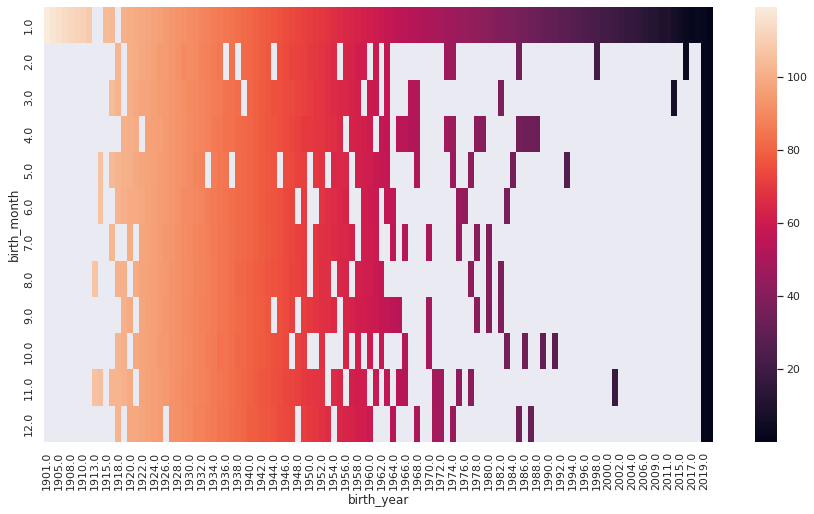

In [13]:
dateframe = wash_obits[wash_obits["birthday"].notnull() | wash_obits["age"].notnull()]
dateframe["birth_month"] = dateframe["birthday"].dt.month
dateframe["birth_year"] = dateframe["birthday"].dt.year
calc_ages = (dateframe["deathday"] - dateframe["birthday"]).dt.total_seconds()/3600/24/365
calc_ages.fillna(dateframe["age"])
dateframe["age"] = calc_ages#dateframe["age"].fillna((dateframe["deathday"] - dateframe["birthday"]).dt.total_seconds()/3600/24/365)
youngs = dateframe[dateframe["age"] < 30]
# display(youngs)
# display(youngs["para"])
dateframe = dateframe.groupby(["birth_month", "birth_year"])["age"].max()
dateframe = pd.DataFrame(dateframe)
date_pivot = dateframe.pivot_table(index="birth_month", columns="birth_year", values="age")
#dateframe
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(date_pivot)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


75.57671232876712

age
birth_month birth_year            
1.0         1901.0      119.147945
            1904.0      116.854795
            1905.0      115.558904
            1907.0      113.597260
            1908.0      112.816438
...                            ...
12.0        1974.0       46.000000
            1985.0       34.172603
            1987.0       32.065753
            2019.0        1.027397
            2020.0        0.041096

[646 rows x 1 columns]

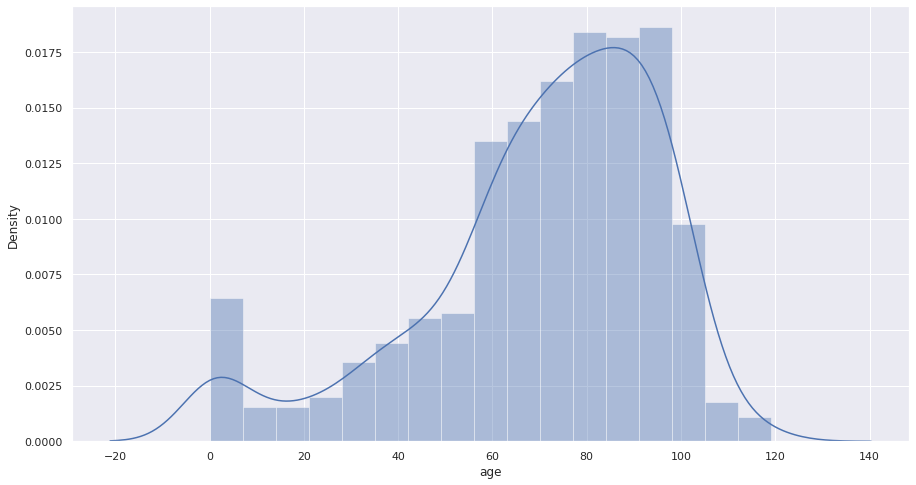

In [14]:
sns.distplot(dateframe["age"])
display(dateframe["age"].median())
display(dateframe)